# Notebook Description

This project aims to analyze and explore the data found in the vgsales.csv dataset downloaded from https://www.kaggle.com/gregorut/videogamesales. As a (very) casual video game player, the prospect of looking into historical sales trends, as well as the best-selling games and genres of various years, was quite appealing, and that's the reason I chose to work with this dataset. Further, I was excited about the prospect of looking at microslices of the data: for example, what were the average sales of Nintendo DS adventure-type games by year, or total XBOX game sales broken down by genre for the year 2012? Lastly, in the spirit of "you can only work with the data you have," I explored whether it was possible to predict a video game's genre using only its sales figures and the year of its release. The latter project contained in a separate file; this one explores historical sales trends and various microslices of the data.

Many of the functions defined below were written to be fairly general, so even though my calls to them were limited to only a couple of choices of input parameters, many more are possible. The dataset itself is quite rich and allows for a large amount of exploration of microslices. For personal reasons, I focused my attention mostly on the PlayStation4 (PS4) and Nintendo Entertainment System (NES) consoles, but you could use the functions I wrote to learn about games released for different consoles fairly easily. Even with just the analysis approaches I chose, there are many more projects which could be completed using this dataset than the three I ultimately chose.

# Import Needed Packages

In [1]:
# Import analysis and read/write packages:
import pandas as pd
import numpy as np
import csv 

In [2]:
# Import plotting packages:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Import data scaling class from Scikit-Learn:
from sklearn.preprocessing import StandardScaler

# Import training/test set splitting class from Scikit-Learn:
from sklearn.model_selection import train_test_split

# Import classification classes from Scikit-Learn:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Read in the Data, Investigate It, Clean It, and Sort It

In [4]:
# Read video game sales file from Kaggle to a Pandas DataFrame:
vg_sales_data = pd.read_csv('vgsales.csv')

In [5]:
# Print out the header of the resulting DataFrame:
print(vg_sales_data.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [ ]:
# The file description from Kaggle indicates that sales figures are in "millions."
# I will assume that "millions" means millions of U.S. dollars.

In [6]:
# Some games lack either genre or year of release information, or both. 
# I will remove these games from the DataFrame:
vg_sales_data = vg_sales_data.dropna(subset=['Genre','Year'])

In [7]:
# A check to see how many unique video game genres exist in the DataFrame:
print(vg_sales_data.Genre.unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [8]:
# For convenience in plotting later on, create 2 new data frames.
# One sorts the data by genre, in alphabetical order; the other sorts the data by platform, in alphabetical order:
vg_sales_data_sbg = vg_sales_data.sort_values(by = 'Genre')
vg_sales_data_sbpl = vg_sales_data.sort_values(by = 'Platform')

# Bar Plots of Total and Average Sales by Genre

In [9]:
# Since I plan to make a bunch of different bar graphs which all follow the same format, define a function
# which takes in a data frame, the axes to be plotted, a name for the region whose data is being plotted, 
# and the desired Seaborn color palette:

def plot_a_barplot(df, xaxis, yaxis, estimator, region, palette):
    fig1a = sns.barplot(data = df, x = xaxis, y = yaxis, estimator = estimator, ci = None, palette = palette)
    fig1a.set_xticklabels(fig1a.get_xticklabels(), rotation=90, horizontalalignment='center')
    plt.ylabel(region + ' Sales [millions of U.S. dollars]')

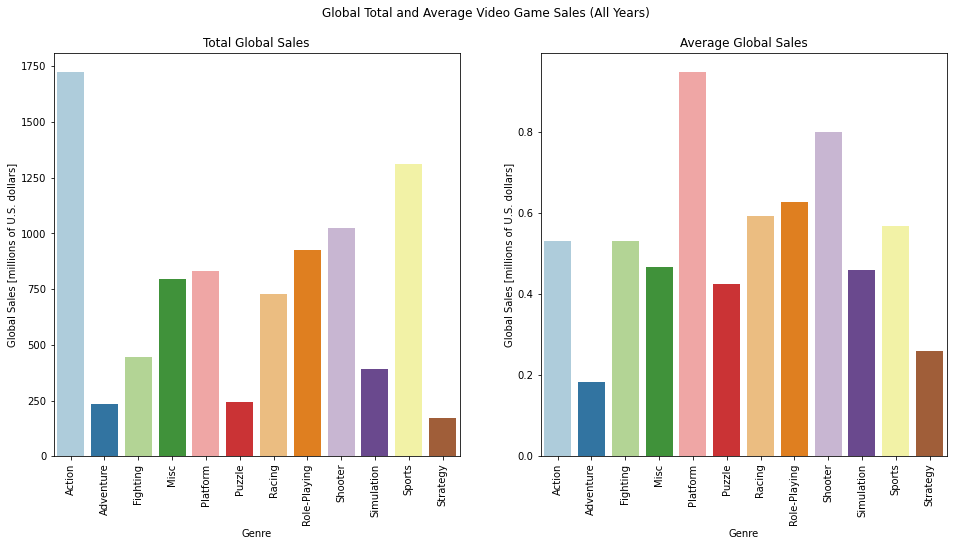

In [10]:
# Begin by plotting global sales data for each genre. A bar graph of total global sales by genre over the time period 
# 1980--2017 is plotted on the left-hand side of the plot; a bar graph of average global sales by genre over the same 
# time period is plotted on the right-hand side.

plt.figure(figsize = (16,8))
# bar graph of total global sales by genre:
plt.subplot(1,2,1)
plot_a_barplot(vg_sales_data_sbg, 'Genre', 'Global_Sales', np.sum, 'Global', 'Paired')
plt.title('Total Global Sales')
# bar graph of average global sales by genre:
plt.subplot(1,2,2)
plot_a_barplot(vg_sales_data_sbg, 'Genre', 'Global_Sales', np.mean, 'Global', 'Paired')
plt.title('Average Global Sales')
# title for the full plot:
plt.suptitle('Global Total and Average Video Game Sales (All Years)', x = 0.5, y = 0.98)
plt.subplots_adjust(top=0.9, bottom=0.2)
# print the plot to file:
plt.savefig('total_avg_global_sales_genre_all_years.png')

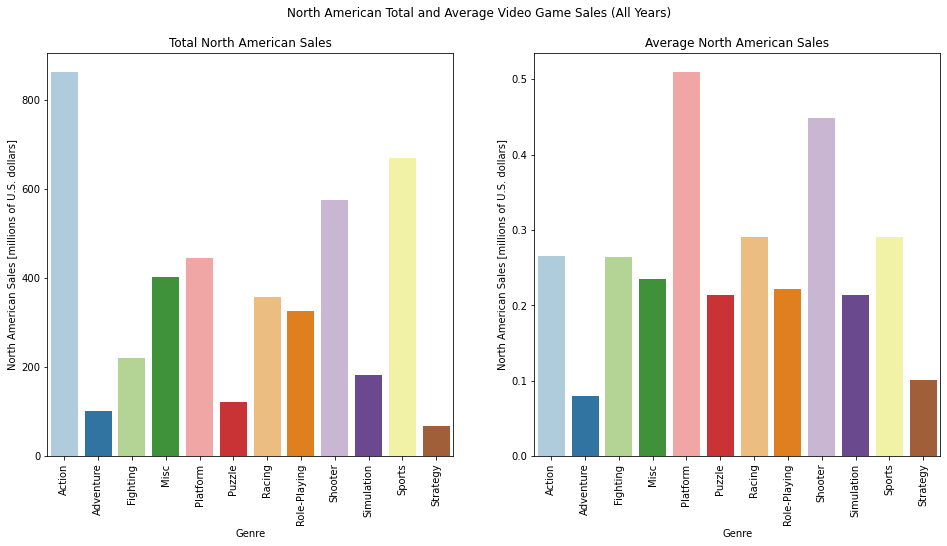

In [11]:
# Repeat the above plot, but focus on the North American region:

plt.figure(figsize = (16,8))
# bar graph of total global sales by genre:
plt.subplot(1,2,1)
plot_a_barplot(vg_sales_data_sbg, 'Genre', 'NA_Sales', np.sum, 'North American', 'Paired')
plt.title('Total North American Sales')
# bar graph of average global sales by genre:
plt.subplot(1,2,2)
plot_a_barplot(vg_sales_data_sbg, 'Genre', 'NA_Sales', np.mean, 'North American', 'Paired')
plt.title('Average North American Sales')
# title for the full plot:
plt.suptitle('North American Total and Average Video Game Sales (All Years)', x = 0.5, y = 0.98)
plt.subplots_adjust(top=0.9, bottom=0.2)
# print the plot to file:
plt.savefig('total_avg_NA_sales_genre_all_years.png')

In [12]:
# Calculate and print to screen the total of all global video game sales over the time period 1980--2017;
# also, print out the average global video game sales over the same time period. 

global_total_all_years = np.sum(vg_sales_data.Global_Sales)
global_avg_all_years = np.mean(vg_sales_data.Global_Sales)
print('Total Global Sales Over All Years: $' + str(round(global_total_all_years,0)) + ' million')
print('Average Global Sales Over All Years: $' + str(round(global_avg_all_years,4)) + ' million')

Total Global Sales Over All Years: $8820.0 million
Average Global Sales Over All Years: $0.5402 million


In [13]:
# Calculate and print to screen the total of global video game sales over the time period 1980--2017, by
# genre. Basically, these are the raw numbers which appear in visual form as the left-hand side of the
# plot made above.

# group data by genre and calculate the total sales for each genre:
global_total_all_years_by_genre = vg_sales_data.groupby('Genre').\
                                  Global_Sales.apply(lambda x: np.sum(x)).reset_index().\
                                  sort_values(by = 'Global_Sales', ascending = False)
# rename columns for ease of interpretation:
global_total_all_years_by_genre.rename(columns = {'Genre': 'Game Genre', \
                                                  'Global_Sales': 'Total Global Sales'}, inplace = True)
# print to screen:
print(global_total_all_years_by_genre)

      Game Genre  Total Global Sales
0         Action             1722.88
10        Sports             1309.24
8        Shooter             1026.20
7   Role-Playing              923.84
4       Platform              829.15
3           Misc              797.62
6         Racing              726.77
2       Fighting              444.05
9     Simulation              390.16
5         Puzzle              242.22
1      Adventure              234.80
11      Strategy              173.43


In [14]:
# Calculate and print to screen the average global video game sales over the time period 1980--2017, by 
# genre. Basically, these are the raw numbers which appear in visual form as the right-hand side of the
# plot made above.

# group data by genre and calculate the total sales for each genre:
global_avg_all_years_by_genre = vg_sales_data.groupby('Genre').\
                                  Global_Sales.apply(lambda x: np.mean(x)).reset_index().\
                                  sort_values(by = 'Global_Sales', ascending = False)
# rename columns for ease of interpretation:
global_avg_all_years_by_genre.rename(columns = {'Genre': 'Game Genre', \
                                                  'Global_Sales': 'Avg Global Sales'}, inplace = True)
# print to screen:
print(global_avg_all_years_by_genre)

      Game Genre  Avg Global Sales
4       Platform          0.946518
8        Shooter          0.800468
7   Role-Playing          0.628035
6         Racing          0.592798
10        Sports          0.568247
2       Fighting          0.531160
0         Action          0.529628
3           Misc          0.466444
9     Simulation          0.458472
5         Puzzle          0.424203
11      Strategy          0.258465
1      Adventure          0.184013


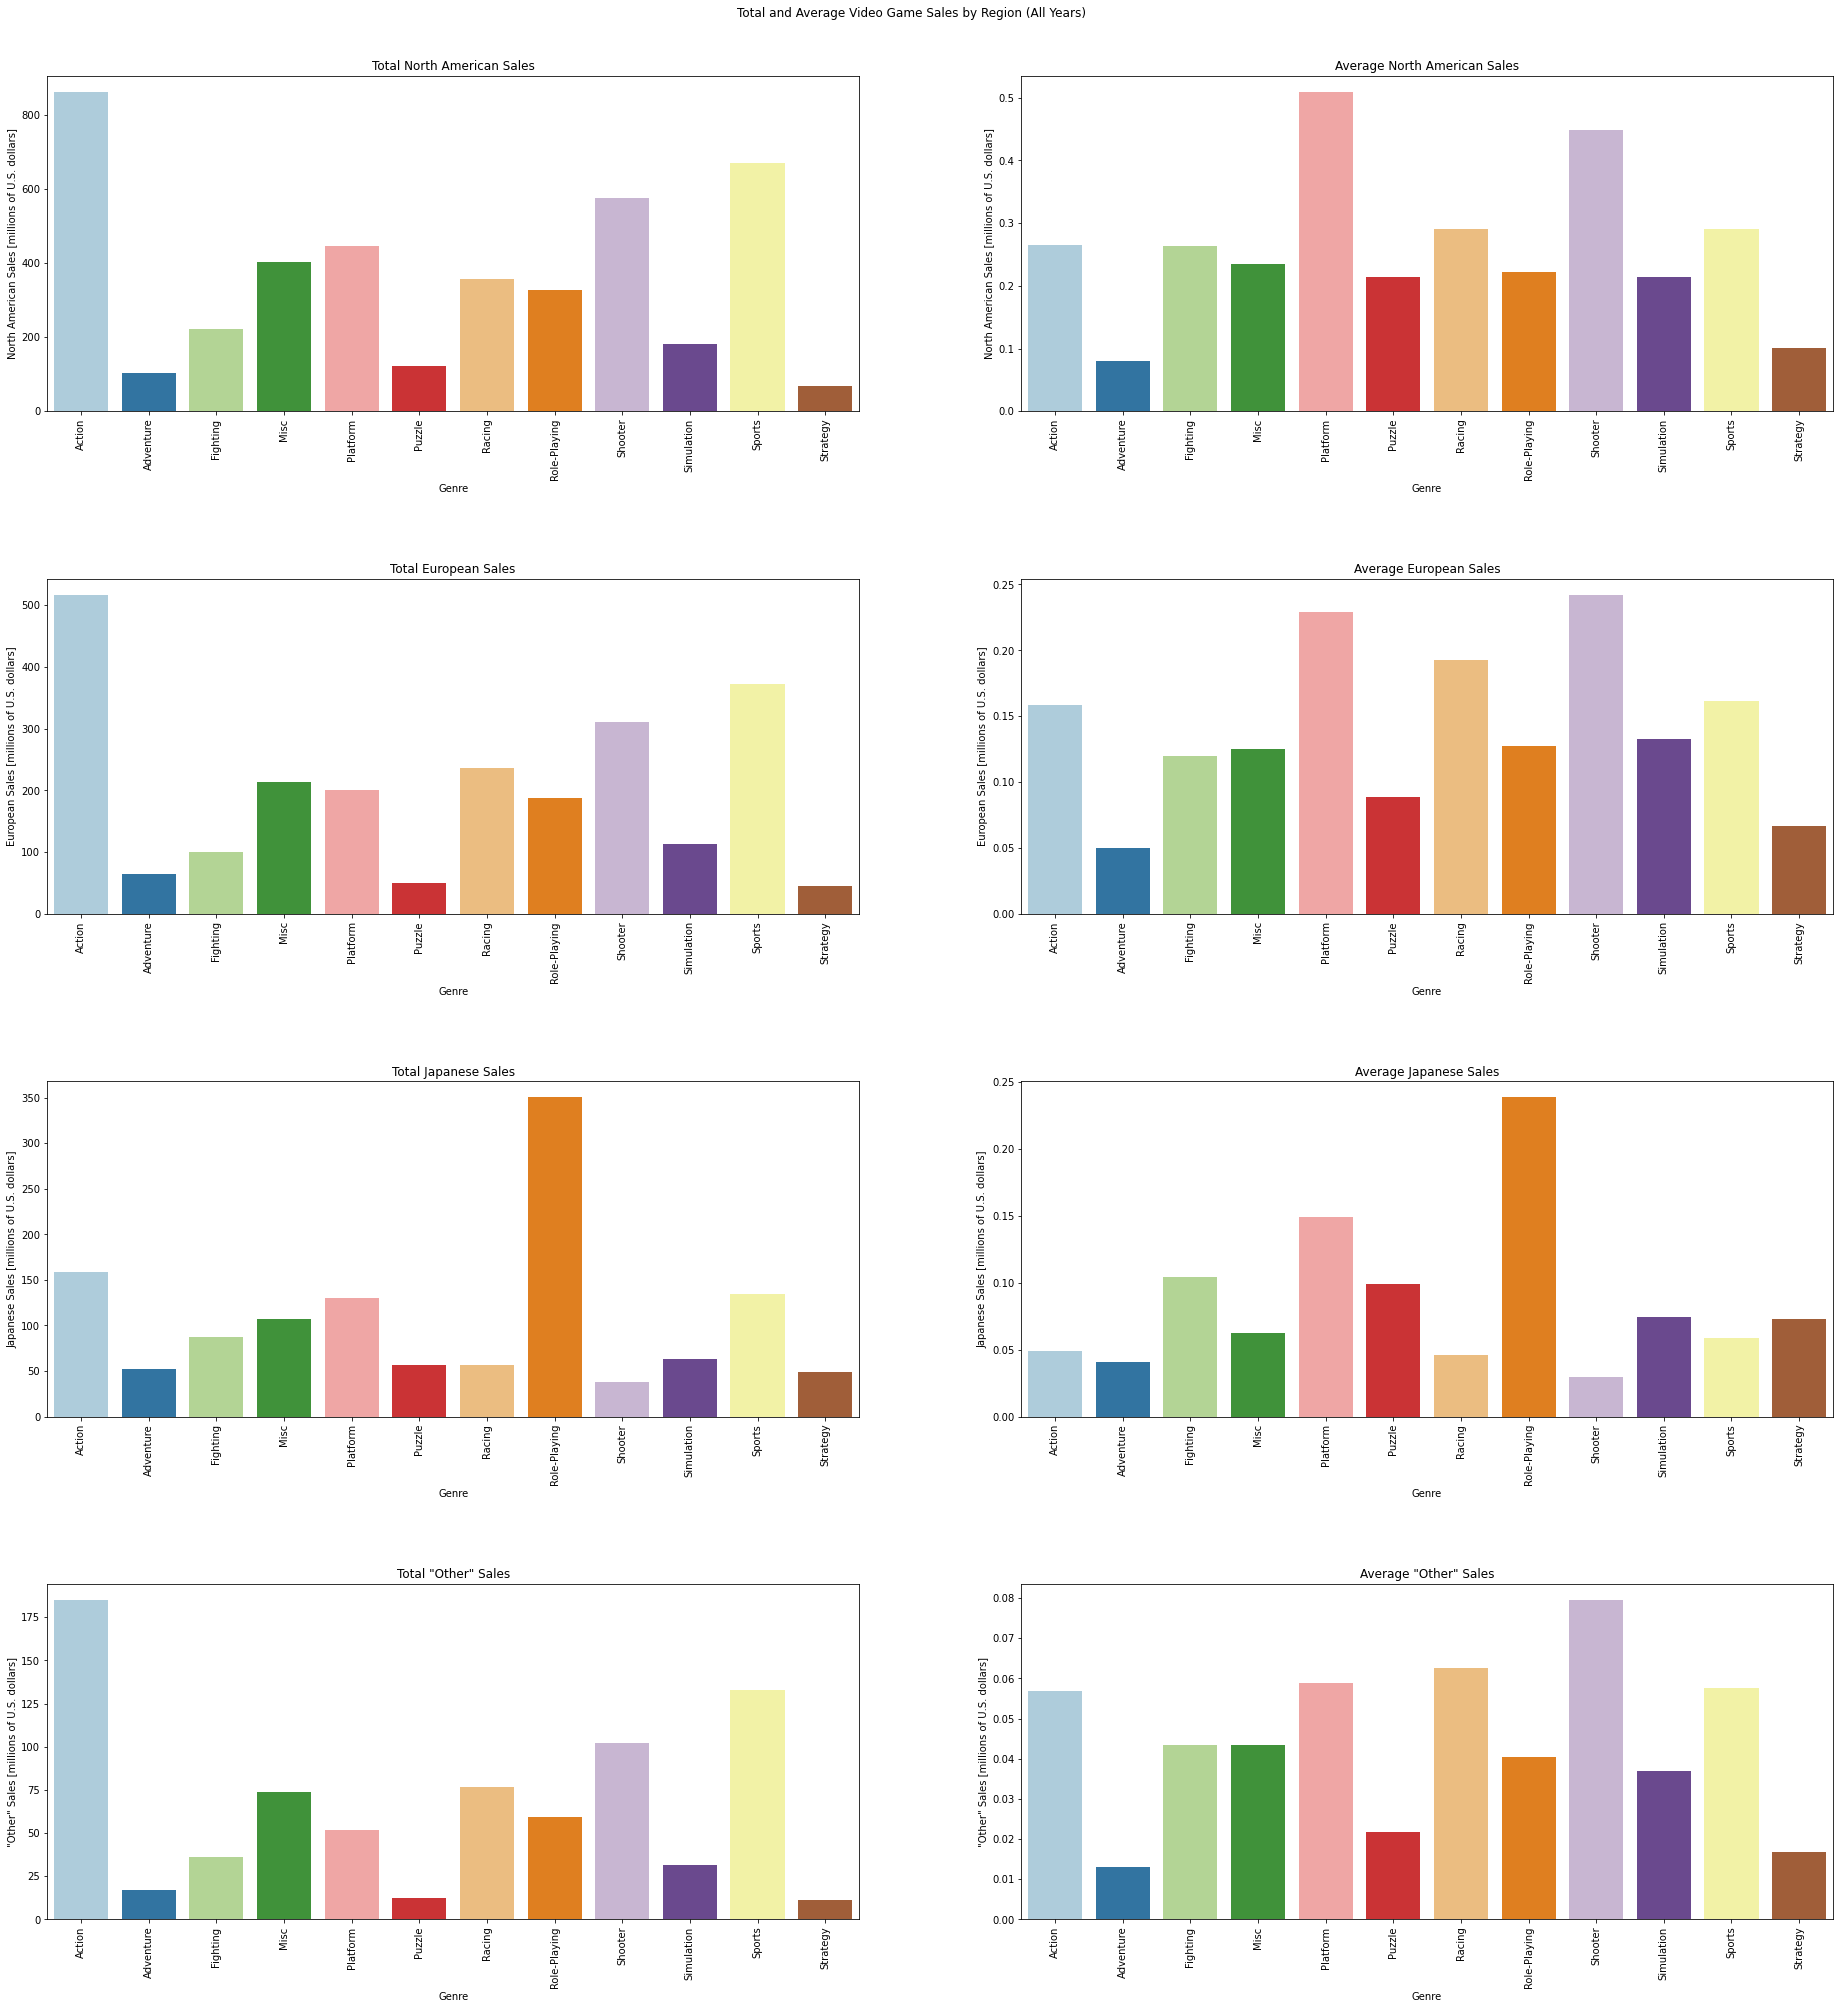

In [15]:
# To investigate regional trends, make bar graphs of total regional sales and average regional sales by genre 
# over the time period 1980--2017. First, look at North America; then look at Europe; next look at Japan; and
# finally aggregate data from regions not previously named. Total sales for a region are plotted on the left; 
# average sales are plotted on the right. Each row in the below plot corresponds to one region.

plt.figure(figsize = (32,32))

# this row of plots is for the North American region
# plot total sales by genre on the left-hand side:
plt.subplot(4,2,1)
plot_a_barplot(vg_sales_data_sbg, 'Genre', 'NA_Sales', np.sum, 'North American', 'Paired')
plt.title('Total North American Sales')
# plot average sales by genre on the right-hand side:
plt.subplot(4,2,2)
plot_a_barplot(vg_sales_data_sbg, 'Genre', 'NA_Sales', np.mean, 'North American', 'Paired')
plt.title('Average North American Sales')

# this row is for the European region
# plot total sales by genre on the left-hand side:
plt.subplot(4,2,3)
plot_a_barplot(vg_sales_data_sbg, 'Genre', 'EU_Sales', np.sum, 'European', 'Paired')
plt.title('Total European Sales')
# plot average sales by genre on the right-hand side:
plt.subplot(4,2,4)
plot_a_barplot(vg_sales_data_sbg, 'Genre', 'EU_Sales', np.mean, 'European', 'Paired')
plt.title('Average European Sales')

# this row is for the Japanese region
# plot total sales by genre on the left-hand side:
plt.subplot(4,2,5)
plot_a_barplot(vg_sales_data_sbg, 'Genre', 'JP_Sales', np.sum, 'Japanese', 'Paired')
plt.title('Total Japanese Sales')
# plot average sales by genre on the right-hand side:
plt.subplot(4,2,6)
plot_a_barplot(vg_sales_data_sbg, 'Genre', 'JP_Sales', np.mean, 'Japanese', 'Paired')
plt.title('Average Japanese Sales')

# this row is for the "Other" region
# plot total sales by genre on the left-hand side:
plt.subplot(4,2,7)
plot_a_barplot(vg_sales_data_sbg, 'Genre', 'Other_Sales', np.sum, '"Other"', 'Paired')
plt.title('Total "Other" Sales')
# plot average sales by genre on the right-hand side:
plt.subplot(4,2,8)
plot_a_barplot(vg_sales_data_sbg, 'Genre', 'Other_Sales', np.mean, '"Other"', 'Paired')
plt.title('Average "Other" Sales')

# give the full plot a title, and make sure there is appropriate space between subplots:
plt.suptitle('Total and Average Video Game Sales by Region (All Years)', x = 0.5, y = 0.93)
plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.5)
# print the plot to file:
plt.savefig('total_avg_sales_genre_all_subregions_all_years.png')

# Bar Plots of Total and Average Sales by Game Platform

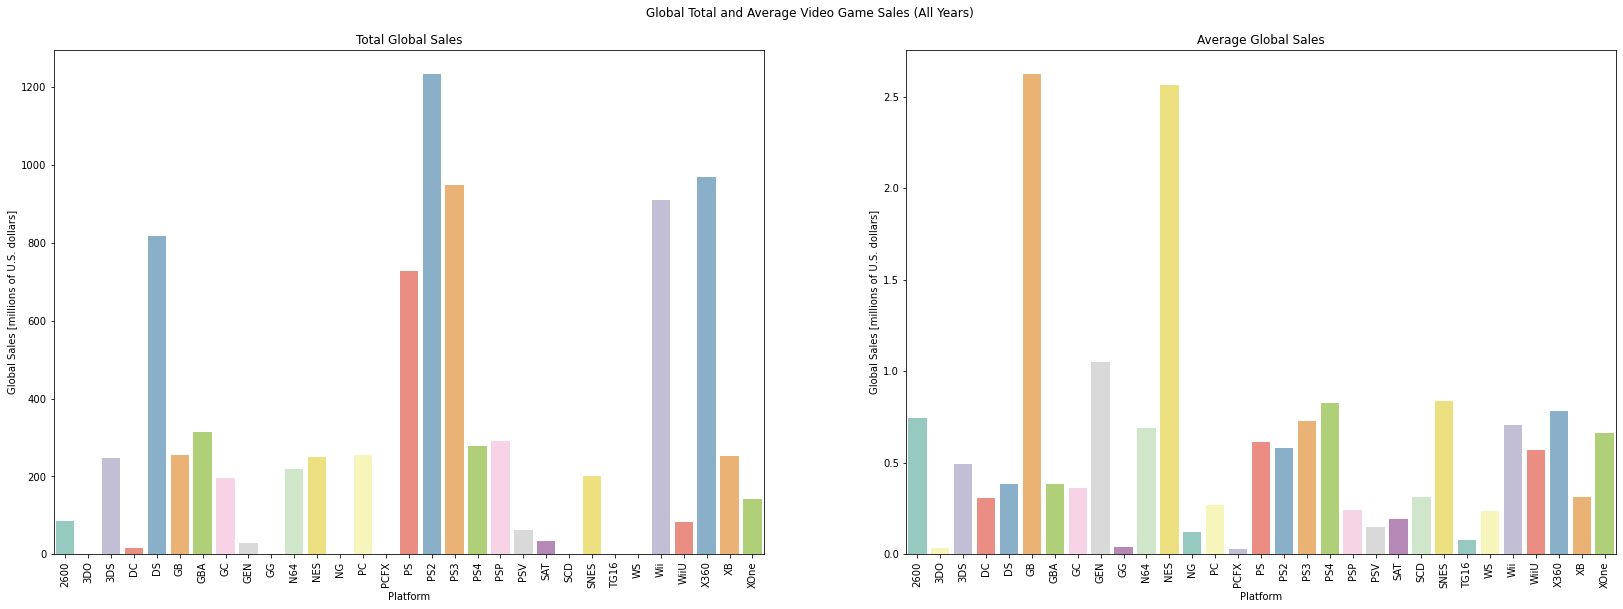

In [16]:
# Now plot global sales data for each video game platform. A bar graph of total global sales by platform over the 
# time period 1980--2017 is plotted on the left-hand side of the plot; a bar graph of average global sales by 
# platform over the same time period is plotted on the right-hand side.

plt.figure(figsize = (28,10))
# bar graph of total global sales by genre: 
plt.subplot(1,2,1)
plot_a_barplot(vg_sales_data_sbpl, 'Platform', 'Global_Sales', np.sum, 'Global', 'Set3')
plt.title('Total Global Sales')
# bar graph of average global sales by genre:
plt.subplot(1,2,2)
plot_a_barplot(vg_sales_data_sbpl, 'Platform', 'Global_Sales', np.mean, 'Global', 'Set3')
plt.title('Average Global Sales')
# title for the full plot:
plt.suptitle('Global Total and Average Video Game Sales (All Years)', x = 0.5, y = 0.96)
plt.subplots_adjust(top=0.9, bottom=0.2)
# print to file:
plt.savefig('total_avg_global_sales_platform_all_years.png')

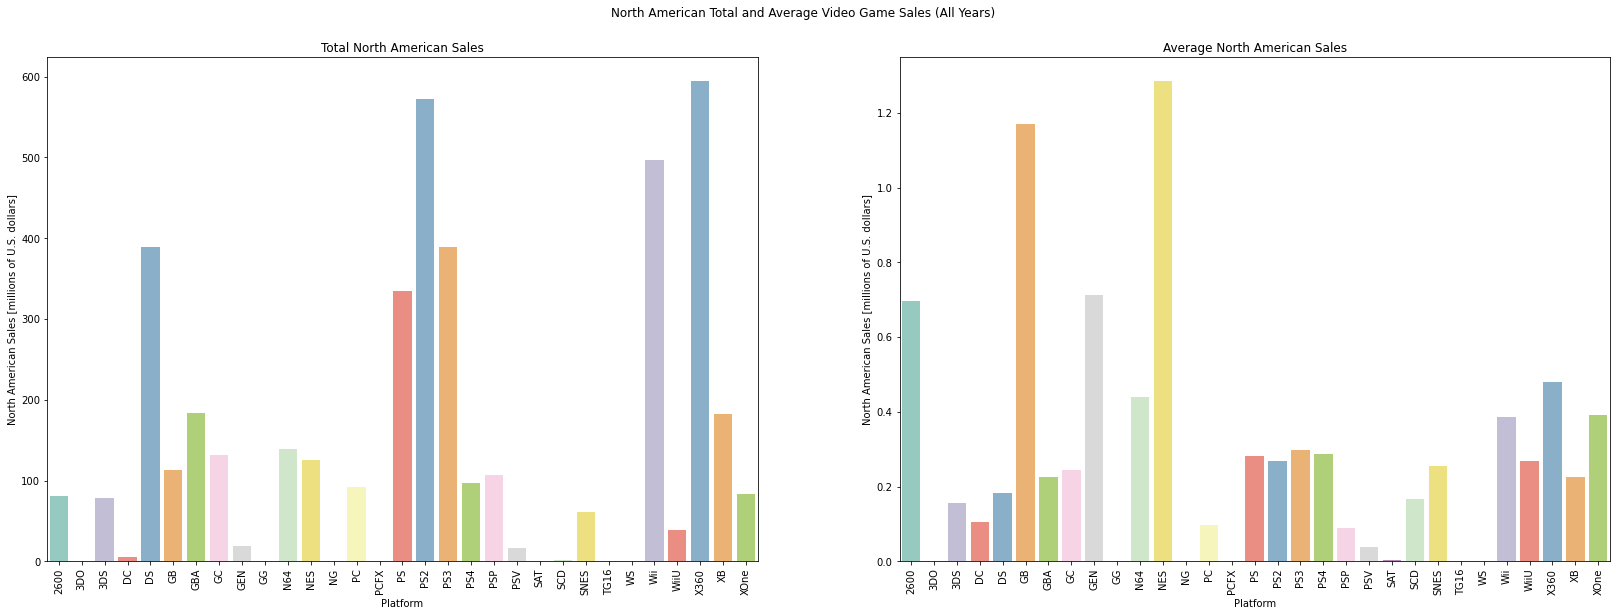

In [17]:
# Repeat the above, but focus on the North American region:

plt.figure(figsize = (28,10))
# bar graph of total global sales by genre: 
plt.subplot(1,2,1)
plot_a_barplot(vg_sales_data_sbpl, 'Platform', 'NA_Sales', np.sum, 'North American', 'Set3')
plt.title('Total North American Sales')
# bar graph of average global sales by genre:
plt.subplot(1,2,2)
plot_a_barplot(vg_sales_data_sbpl, 'Platform', 'NA_Sales', np.mean, 'North American', 'Set3')
plt.title('Average North American Sales')
# title for the full plot:
plt.suptitle('North American Total and Average Video Game Sales (All Years)', x = 0.5, y = 0.97)
plt.subplots_adjust(top=0.9, bottom=0.2)
# print to file:
plt.savefig('total_avg_NA_sales_platform_all_years.png')

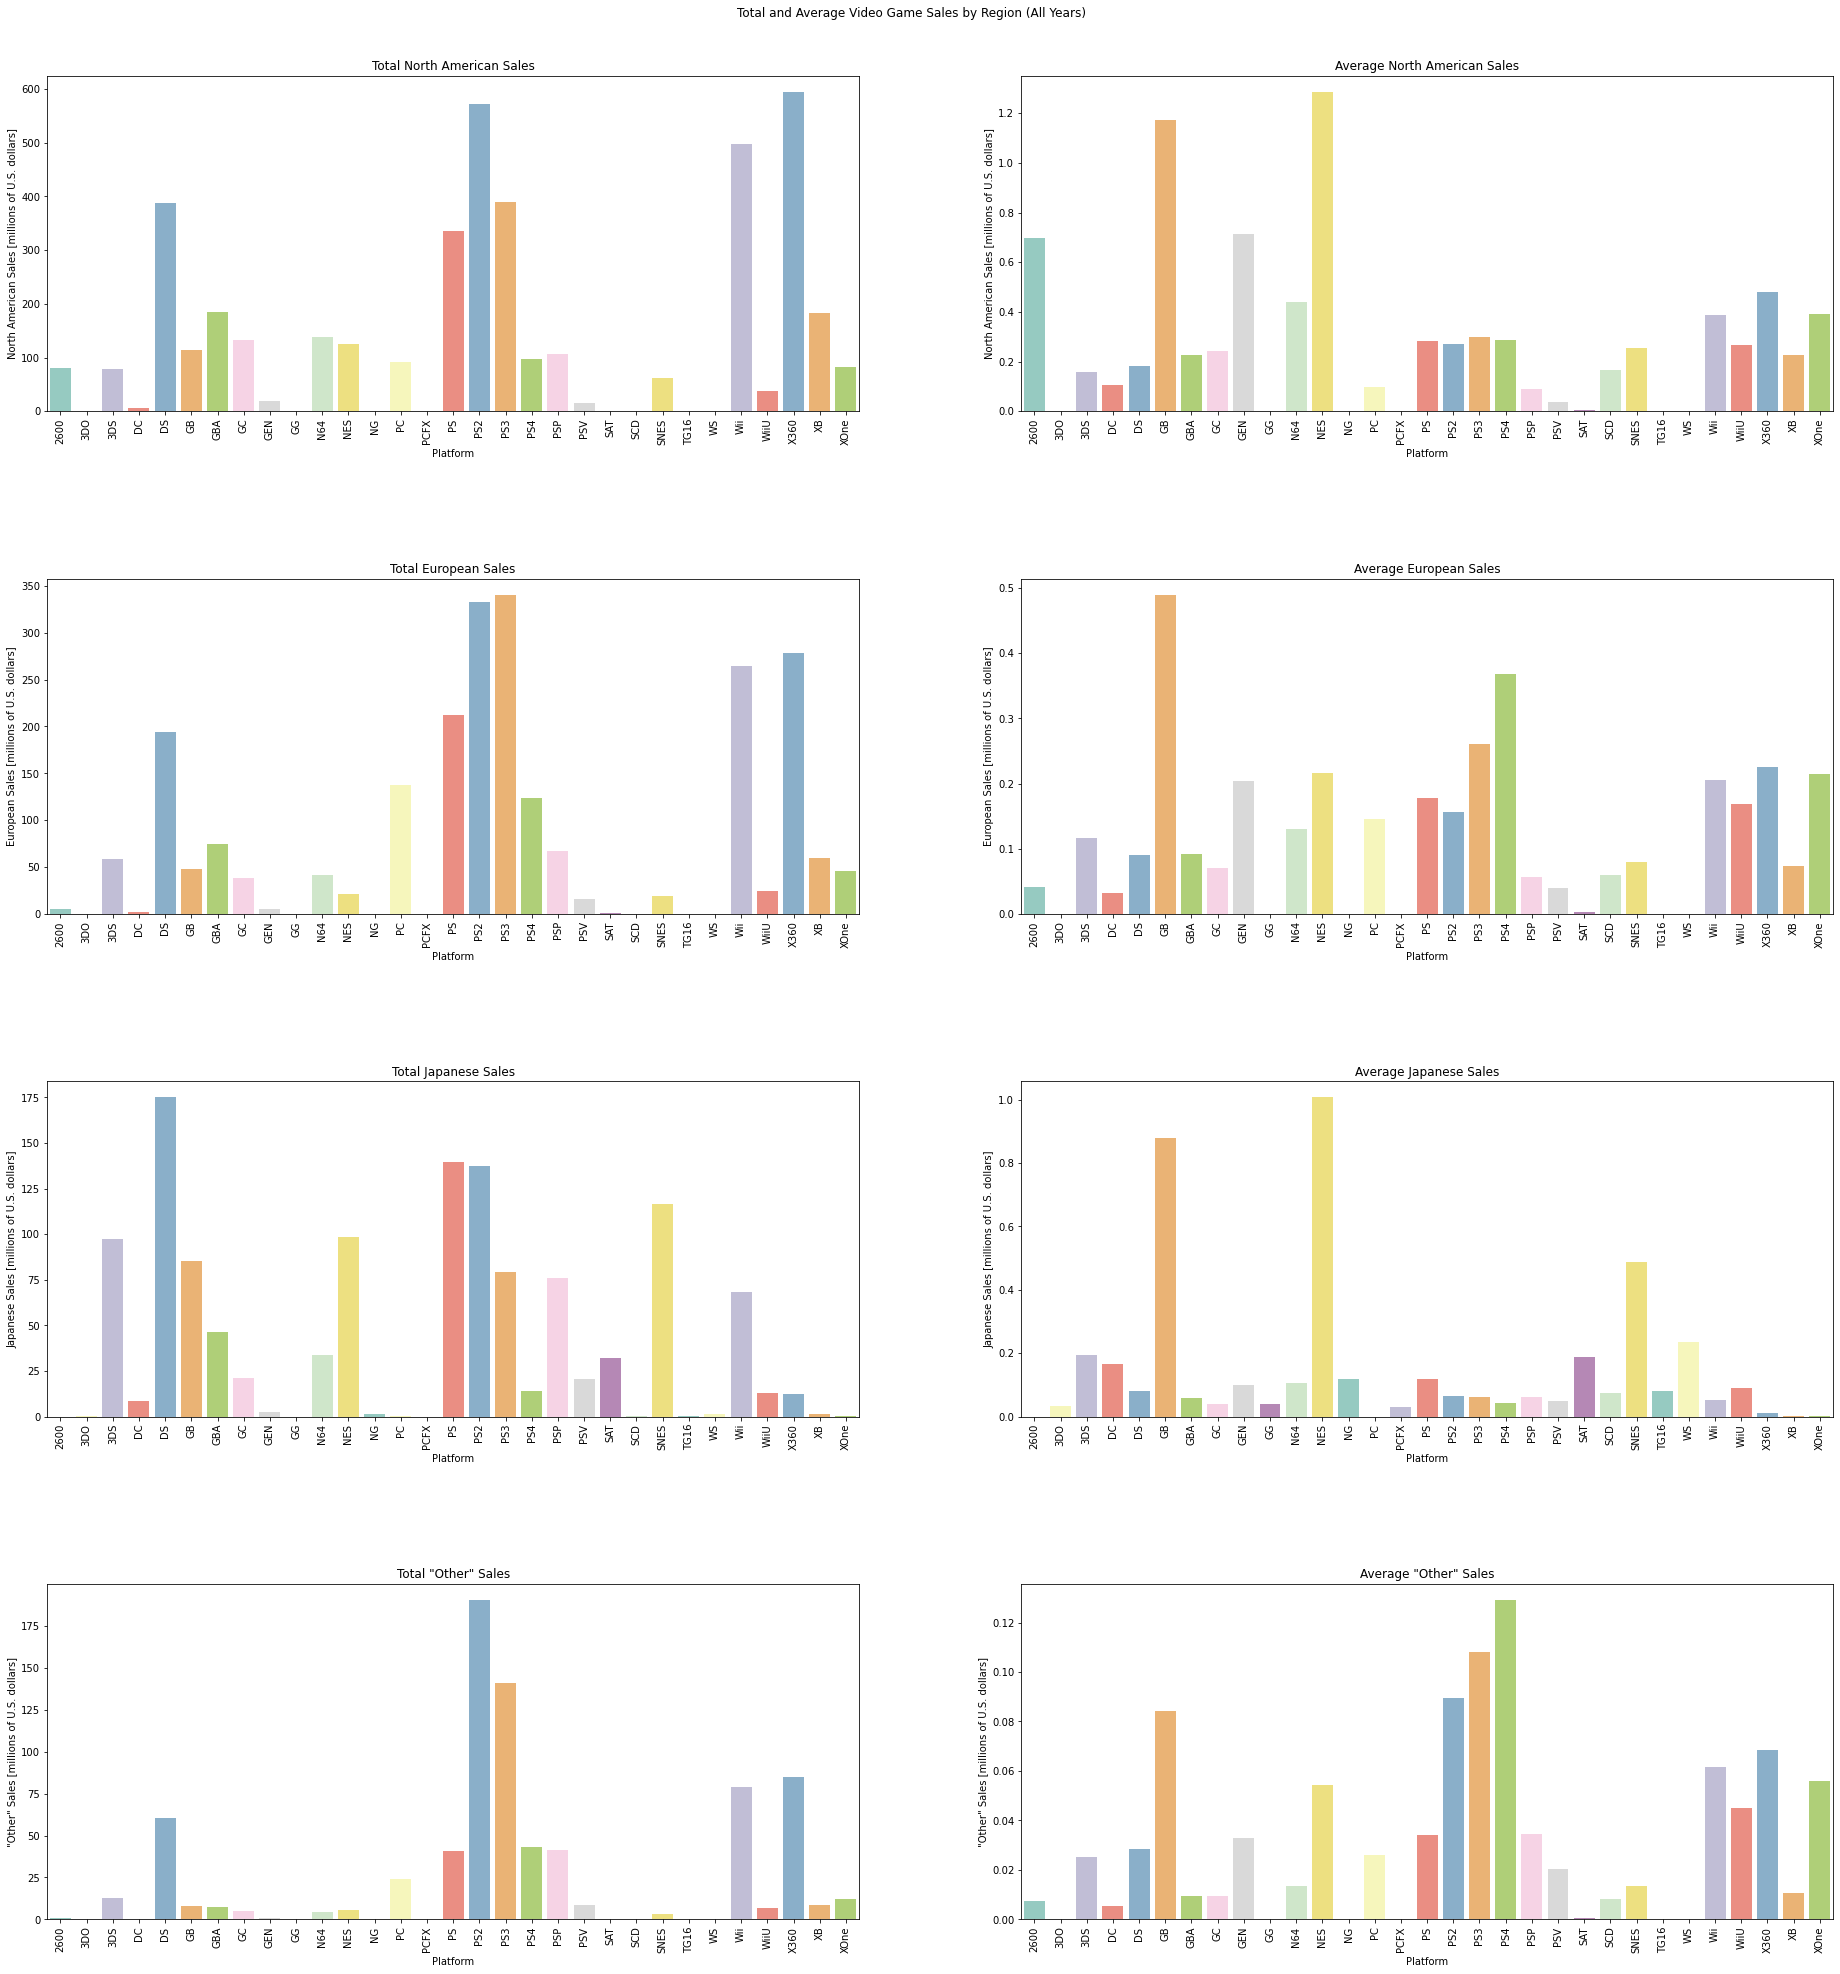

In [18]:
# To investigate regional trends, make bar graphs of total regional sales and average regional sales by genre 
# over the time period 1980--2017. First, look at North America; then look at Europe; next look at Japan; and
# finally aggregate data from regions not previously named. Total sales for a region are plotted on the left; 
# average sales are plotted on the right. Each row in the below plot corresponds to one region.

plt.figure(figsize = (32,32))

# this row of plots is for the North American region
# plot total sales by platform on the left-hand side:
plt.subplot(4,2,1)
plot_a_barplot(vg_sales_data_sbpl, 'Platform', 'NA_Sales', np.sum, 'North American', 'Set3')
plt.title('Total North American Sales')
# plot average sales by platform on the right-hand side:
plt.subplot(4,2,2)
plot_a_barplot(vg_sales_data_sbpl, 'Platform', 'NA_Sales', np.mean, 'North American', 'Set3')
plt.title('Average North American Sales')

# this row of plots is for the European region
# plot total sales by platform on the left-hand side:
plt.subplot(4,2,3)
plot_a_barplot(vg_sales_data_sbpl, 'Platform', 'EU_Sales', np.sum, 'European', 'Set3')
plt.title('Total European Sales')
# plot average sales by platform on the right-hand side:
plt.subplot(4,2,4)
plot_a_barplot(vg_sales_data_sbpl, 'Platform', 'EU_Sales', np.mean, 'European', 'Set3')
plt.title('Average European Sales')

# this row of plots is for the Japanese region
# plot total sales by platform on the left-hand side:
plt.subplot(4,2,5)
plot_a_barplot(vg_sales_data_sbpl, 'Platform', 'JP_Sales', np.sum, 'Japanese', 'Set3')
plt.title('Total Japanese Sales')
# plot average sales by platform on the right-hand side:
plt.subplot(4,2,6)
plot_a_barplot(vg_sales_data_sbpl, 'Platform', 'JP_Sales', np.mean, 'Japanese', 'Set3')
plt.title('Average Japanese Sales')

# this row of plots is for the "other" region
# plot total sales by platform on the left-hand side:
plt.subplot(4,2,7)
plot_a_barplot(vg_sales_data_sbpl, 'Platform', 'Other_Sales', np.sum, '"Other"', 'Set3')
plt.title('Total "Other" Sales')
# plot average sales by platform on the right-hand side:
plt.subplot(4,2,8)
plot_a_barplot(vg_sales_data_sbpl, 'Platform', 'Other_Sales', np.mean, '"Other"', 'Set3')
plt.title('Average "Other" Sales')

# give the full plot a title, and make sure there is appropriate space between subplots:
plt.suptitle('Total and Average Video Game Sales by Region (All Years)', x = 0.5, y = 0.93)
plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.5)
plt.savefig('total_avg_sales_platform_all_subregions_all_years.png')

In [19]:
# Calculate and print to screen the total of global video game sales over the time period 1980--2017, by
# platform. Basically, these are the raw numbers which appear in visual form as the left-hand side of the
# total global sales plot made above.

# group data by platform and calculate the total sales for each platform:
global_total_all_years_by_platform = vg_sales_data_sbpl.groupby('Platform').\
                                     Global_Sales.apply(lambda x: np.sum(x)).reset_index().\
                                     sort_values(by = 'Global_Sales', ascending = False)
# rename columns for ease of interpretation:
global_total_all_years_by_platform.rename(columns = {'Platform': 'Game Platform', \
                                                     'Global_Sales': 'Total Global Sales'}, inplace = True)
# print to screen:
print(global_total_all_years_by_platform)

   Game Platform  Total Global Sales
16           PS2             1233.46
28          X360              969.61
17           PS3              949.35
26           Wii              909.81
4             DS              818.96
15            PS              727.39
6            GBA              313.56
19           PSP              291.71
18           PS4              278.10
13            PC              255.05
5             GB              254.42
29            XB              252.09
11           NES              251.07
2            3DS              246.28
10           N64              218.21
23          SNES              200.05
7             GC              197.14
30          XOne              141.06
0           2600               86.57
27          WiiU               81.86
20           PSV               61.63
21           SAT               33.59
8            GEN               28.36
3             DC               15.97
22           SCD                1.87
12            NG                1.44
2

In [20]:
# Calculate and print to screen the average of global video game sales over the time period 1980--2017, by
# platform. Basically, these are the raw numbers which appear in visual form as the right-hand side of the
# total global sales plot made above.

# group data by platform and calculate the average sales for each platform:
global_avg_all_years_by_platform = vg_sales_data_sbpl.groupby('Platform').\
                                     Global_Sales.apply(lambda x: np.mean(x)).reset_index().\
                                     sort_values(by = 'Global_Sales', ascending = False)
# rename columns for ease of interpretation:
global_avg_all_years_by_platform.rename(columns = {'Platform': 'Game Platform', \
                                                  'Global_Sales': 'Average Global Sales'}, inplace = True)
# print to screen:
print(global_avg_all_years_by_platform)

   Game Platform  Average Global Sales
5             GB              2.622887
11           NES              2.561939
8            GEN              1.050370
23          SNES              0.837029
18           PS4              0.827679
28          X360              0.785109
0           2600              0.746293
17           PS3              0.728029
26           Wii              0.705279
10           N64              0.690538
30          XOne              0.662254
15            PS              0.611766
16           PS2              0.579906
27          WiiU              0.572448
2            3DS              0.492560
6            GBA              0.386634
4             DS              0.383947
7             GC              0.363727
29            XB              0.313935
22           SCD              0.311667
3             DC              0.307115
13            PC              0.270467
19           PSP              0.243701
25            WS              0.236667
21           SAT         

# Total and Average Sales by Video Game Publisher

In [21]:
# First, determine the number of unique publishers listed in the DataFrame:
print('Total Number of Game Publishers: ' + str(vg_sales_data.Publisher.nunique()))
print('')

# Now calculate and print to screen the total of global video game sales over the time period 1980--2017, by
# publisher: 
# group data by publisher and calculate the total sales for each publisher:
global_total_all_years_by_publisher = vg_sales_data.groupby('Publisher').\
                                      Global_Sales.apply(lambda x: np.sum(x)).reset_index().\
                                      sort_values(by = 'Global_Sales', ascending = False)
# rename columns for ease of interpretation:
global_total_all_years_by_publisher.rename(columns = {'Genre': 'Game Publisher', \
                                                  'Global_Sales': 'Total Global Sales'}, inplace = True)
# print to screen the total sales of publishers who had at least $50 million in sales:
# ($50 million was arbitrarily chosen as a criterion. Data for all 576 publishers obviously will not all
# fit on the screen at once.)
print(global_total_all_years_by_publisher[global_total_all_years_by_publisher['Total Global Sales'] > 50.0])

Total Number of Game Publishers: 576

                                  Publisher  Total Global Sales
359                                Nintendo             1784.43
138                         Electronic Arts             1093.39
21                               Activision              721.41
455             Sony Computer Entertainment              607.28
524                                 Ubisoft              473.54
493                    Take-Two Interactive              399.30
487                                     THQ              340.44
275            Konami Digital Entertainment              278.56
445                                    Sega              270.70
347                      Namco Bandai Games              253.65
323                  Microsoft Game Studios              245.79
85                                   Capcom              199.95
53                                    Atari              146.77
464                             Square Enix              144.73
54

In [22]:
# Calculate and print to screen the average of global video game sales over the time period 1980--2017, by
# publisher: 
# group data by publisher and calculate the average sales for each publisher:
global_avg_all_years_by_publisher = vg_sales_data.groupby('Publisher').\
                                      Global_Sales.apply(lambda x: np.mean(x)).reset_index().\
                                      sort_values(by = 'Global_Sales', ascending = False)
# rename columns for ease of interpretation:
global_avg_all_years_by_publisher.rename(columns = {'Genre': 'Game Publisher', \
                                                   'Global_Sales': 'Average Global Sales'}, inplace = True)
# print to screen the average sales of publishers who had at least $1 million in sales:
# ($1 million was arbitrarily chosen as a criterion. Data for all 576 publishers obviously will not all
# fit on the screen at once.)
print(global_avg_all_years_by_publisher[global_avg_all_years_by_publisher['Average Global Sales'] > 1.0])

                              Publisher  Average Global Sales
385                              Palcom              4.170000
424                             Red Orb              2.620000
359                            Nintendo              2.563836
40                  Arena Entertainment              2.360000
521                         UEP Systems              2.250000
426                           RedOctane              2.170000
531                               Valve              1.740000
219                         Hello Games              1.600000
457  Sony Computer Entertainment Europe              1.592667
550                    Westwood Studios              1.550000
323              Microsoft Game Studios              1.300476
237                              Imagic              1.205000
71                    Black Label Games              1.200000
66                   Bethesda Softworks              1.181594
308                               Maxis              1.130000
144     

# Total and Average Yearly Sales, Split by Region

In [23]:
# In order to avoid repetitive code as much as possible, define a function to plot yearly total and average
# sales figures for a particular region. Yearly totals and averages are calculated based on the particular
# region chosen, and then line plots of the resulting values are plotted; total sales per year are plotted 
# on the left, whereas average sales per year are plotted on the right. The areas under each of the lines
# are shaded in for ease of viewing.

def plot_sales_by_year_by_region(region):
    # calculate yearly total and average sales for the chosen region:
    if region == 'Global':
        # group data by year and calculate total global sales by year:
        totals_per_year = vg_sales_data.groupby('Year').Global_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        totals_per_year.rename(columns = {'Global_Sales': 'Sales'}, inplace = True)
        # group data by year and calculate average global sales by year:
        averages_per_year = vg_sales_data.groupby('Year').Global_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        averages_per_year.rename(columns = {'Global_Sales': 'Sales'}, inplace = True)
    elif region == 'North American':
        # group data by year and calculate total North American sales by year:
        totals_per_year = vg_sales_data.groupby('Year').NA_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        totals_per_year.rename(columns = {'NA_Sales': 'Sales'}, inplace = True)
        # group data by year and calculate average North American sales by year:
        averages_per_year = vg_sales_data.groupby('Year').NA_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        averages_per_year.rename(columns = {'NA_Sales': 'Sales'}, inplace = True)
    elif region == 'European':
        # group data by year and calculate total European sales by year:
        totals_per_year = vg_sales_data.groupby('Year').EU_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        totals_per_year.rename(columns = {'EU_Sales': 'Sales'}, inplace = True)
        # group data by year and calculate average European sales by year:
        averages_per_year = vg_sales_data.groupby('Year').EU_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        averages_per_year.rename(columns = {'EU_Sales': 'Sales'}, inplace = True)
    elif region == 'Japanese':
        # group data by year and calculate total Japanese sales by year:
        totals_per_year = vg_sales_data.groupby('Year').JP_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        totals_per_year.rename(columns = {'JP_Sales': 'Sales'}, inplace = True)
        # group data by year and calculate average Japanese sales by year:
        averages_per_year = vg_sales_data.groupby('Year').JP_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        averages_per_year.rename(columns = {'JP_Sales': 'Sales'}, inplace = True)
    elif region == 'Other':
        # group data by year and calculate total "Other" sales by year:
        totals_per_year = vg_sales_data.groupby('Year').Other_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        totals_per_year.rename(columns = {'Other_Sales': 'Sales'}, inplace = True)
        # group data by year and calculate average "Other" sales by year:
        averages_per_year = vg_sales_data.groupby('Year').Other_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        averages_per_year.rename(columns = {'Other_Sales': 'Sales'}, inplace = True)
    
    # Make an array of zeros to help the shading function operate correctly:
    zeroline = [0]*len(totals_per_year)
         
    plt.figure(figsize = (28,10))
    
    ax1 = plt.subplot(1,2,1)
    # plot total sales per year for the chosen region as a line:
    plt.plot(totals_per_year.Year, totals_per_year.Sales, color = 'darkcyan')
    # set the axes to appropriate values:
    plt.axis([min(totals_per_year.Year), max(totals_per_year.Year),0.0,max(totals_per_year.Sales)])
    # shade in the area between the horizontal axis and the line:
    ax1.fill_between(totals_per_year.Year, zeroline, totals_per_year.Sales, color = 'darkcyan')
    # label axes and include a legend to identify the data being plotted:
    plt.xlabel('Year')
    plt.ylabel('Total ' + region + ' Sales [millions of U.S. Dollars]')
    plt.legend(['Total'], loc = 'upper left')
    
    ax2 = plt.subplot(1,2,2)
    # plot average sales per year for the chosen region as a line:
    plt.plot(averages_per_year.Year, averages_per_year.Sales, color = 'olivedrab')
    # set the axes to appropriate values:
    plt.axis([min(averages_per_year.Year), max(averages_per_year.Year),0.0,max(averages_per_year.Sales)])
    # shade in the area between the horizontal axis and the line:
    ax2.fill_between(averages_per_year.Year, zeroline, averages_per_year.Sales, color = 'olivedrab')
    # label axes and include a legend to identify the data being plotted:
    plt.xlabel('Year')
    plt.ylabel('Average ' + region + ' Sales [millions of U.S. Dollars]')
    plt.legend(['Average'], loc = 'upper right')
    
    # add a descriptive title for the full plot:
    plt.suptitle(region + ' Total and Average Video Game Sales (By Year)', x = 0.5, y = 0.93)

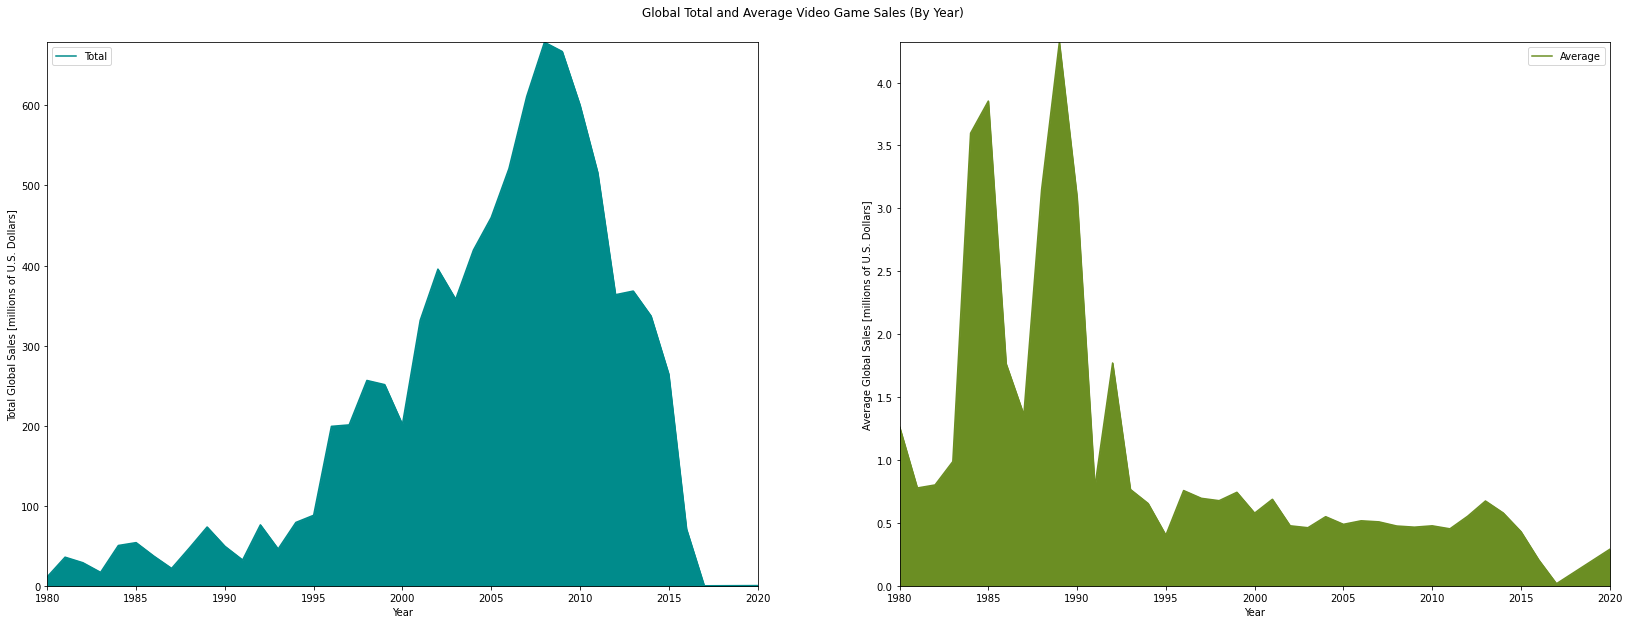

In [24]:
# plot global sales per year:
plot_sales_by_year_by_region('Global')
# print plot to file:
plt.savefig('total_average_global_sales_per_year.png')

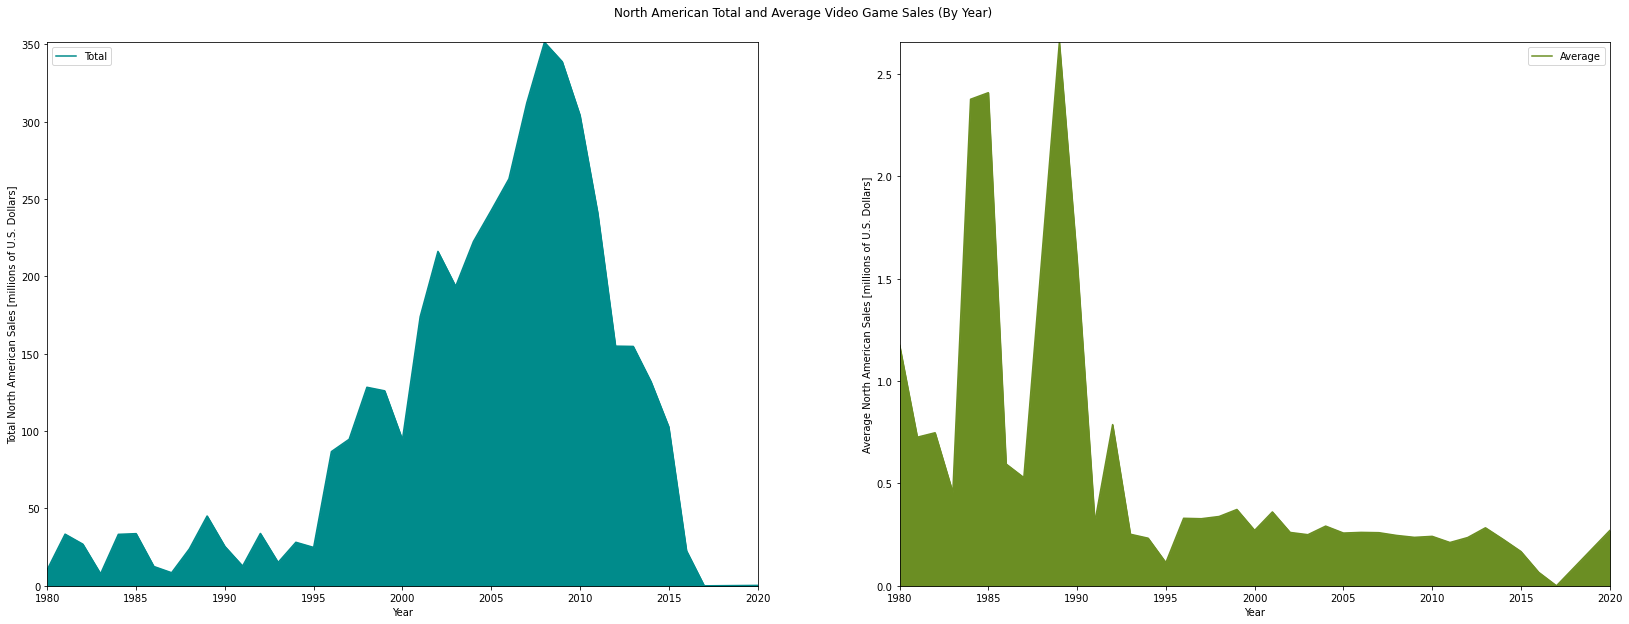

In [25]:
# plot North American sales per year:
plot_sales_by_year_by_region('North American')
# print plot to file:
plt.savefig('total_average_NA_sales_per_year.png')

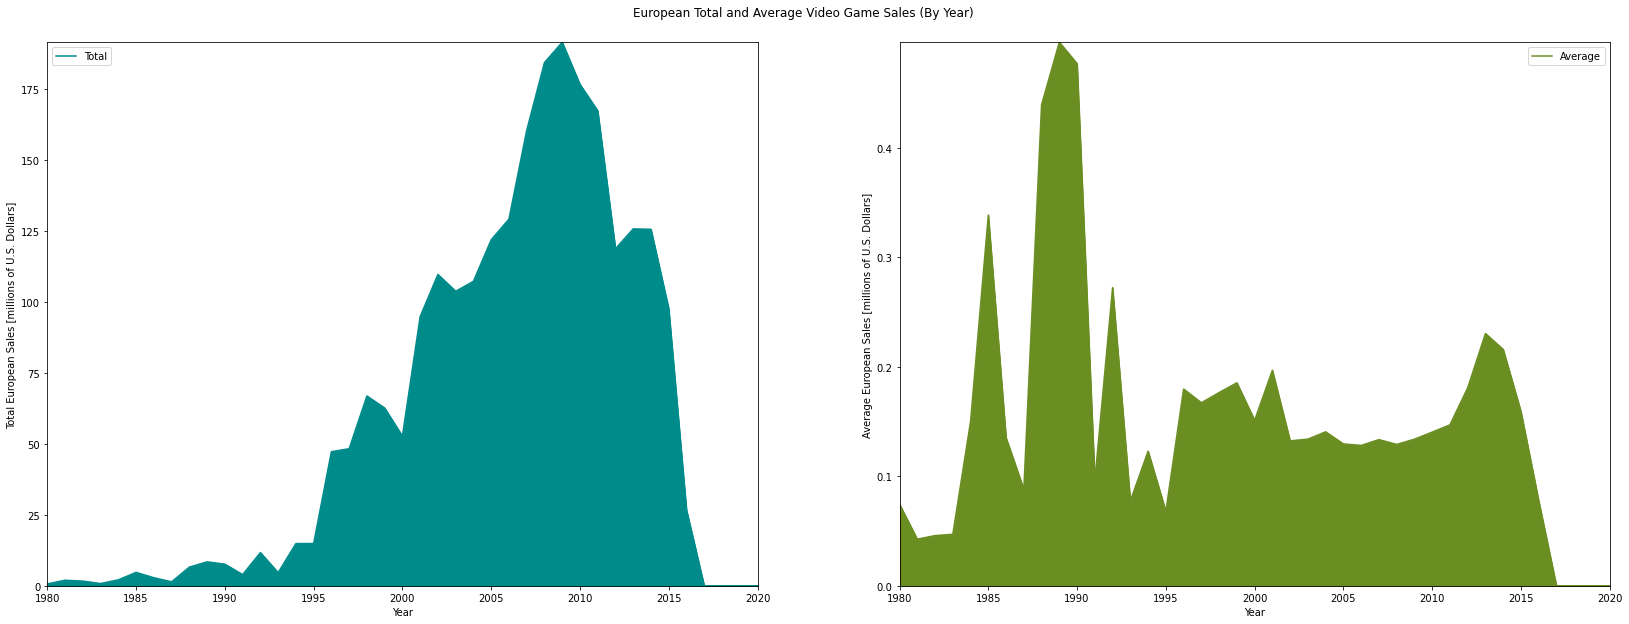

In [26]:
# plot European sales per year:
plot_sales_by_year_by_region('European')
# print plot to file:
plt.savefig('total_average_EU_sales_per_year.png')

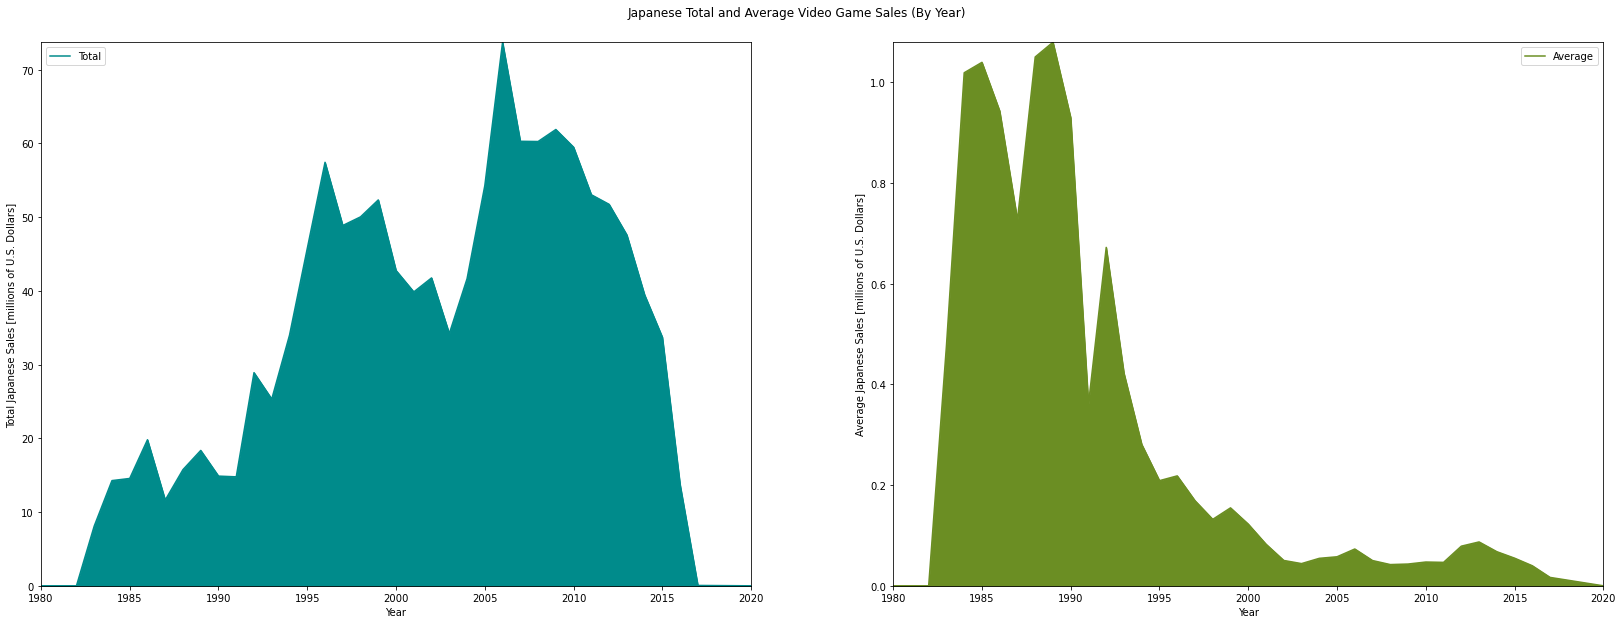

In [27]:
# plot Japanese sales per year:
plot_sales_by_year_by_region('Japanese')
# print plot to file:
plt.savefig('total_average_JP_sales_per_year.png')

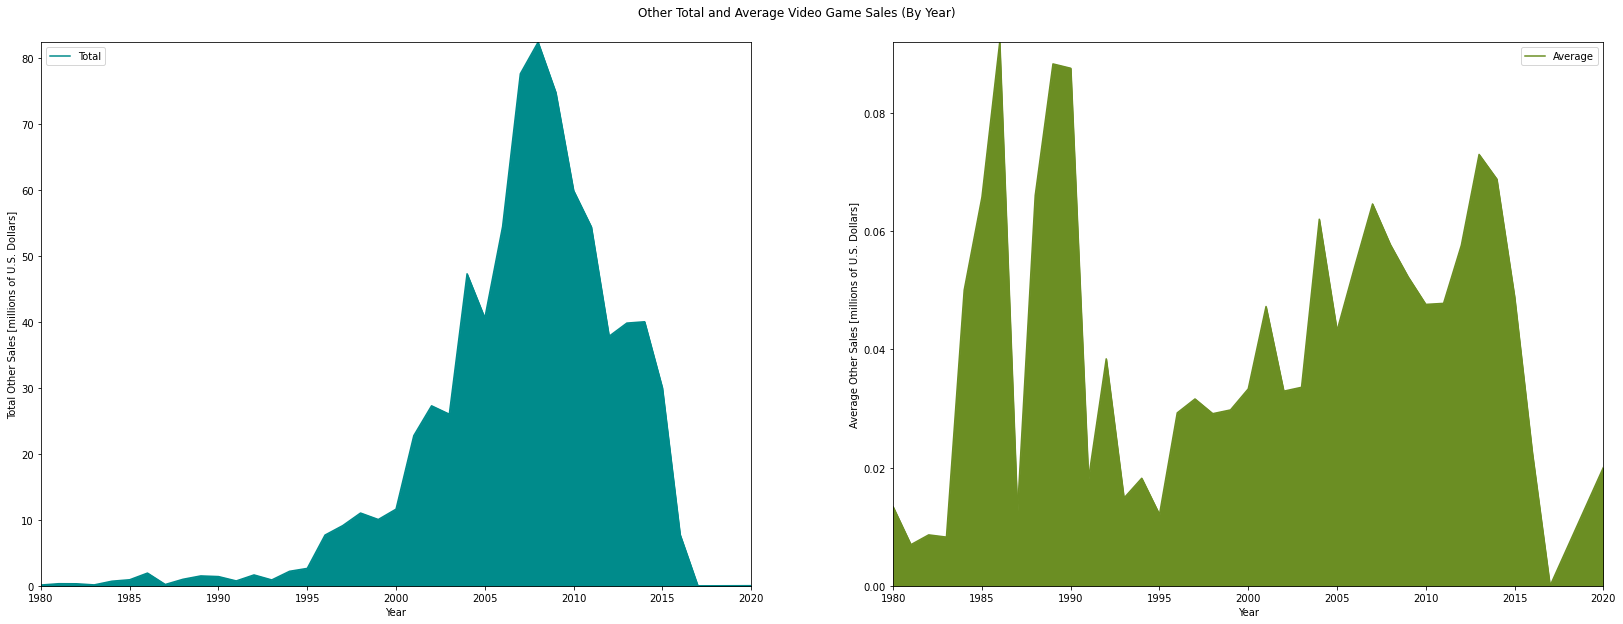

In [28]:
# plot "Other" sales per year:
plot_sales_by_year_by_region('Other')
# print plot to file:
plt.savefig('total_average_Other_sales_per_year.png')

# Total and Average Yearly Sales for a Genre, by Region:

In [29]:
# In order to avoid repetitive code as much as possible, define a function to plot either yearly total or
# yearly average sales figures for particular genre and a particular region. Once the desired genre is chosen,
# yearly totals and averages are calculated based on the particular region chosen, and then a line plot of the 
# desired calculated values is plotted. The area under resulting the line is shaded in for ease of viewing.

def plot_genre_sales_by_year_by_region(genre, region, thetype):
    
    # pluck off sales data for the desired genre:    
    sales_data = vg_sales_data[vg_sales_data.Genre == genre]

    # calculate total and average yearly sales figures for the desired region:
    if region == 'Global':
        # group data by year and calculate total global sales by year:
        total_sales_by_year = sales_data.groupby('Year').Global_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_by_year.rename(columns = {'Global_Sales': 'Sales'}, inplace = True)
        # group data by year and calculate average global sales by year:
        avg_sales_by_year = sales_data.groupby('Year').Global_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_by_year.rename(columns = {'Global_Sales': 'Sales'}, inplace = True)
    elif region == 'North American':
        # group data by year and calculate total North American sales by year:
        total_sales_by_year = sales_data.groupby('Year').NA_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_by_year.rename(columns = {'NA_Sales': 'Sales'}, inplace = True)
        # group data by year and calculate average North American sales by year:
        avg_sales_by_year = sales_data.groupby('Year').NA_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_by_year.rename(columns = {'NA_Sales': 'Sales'}, inplace = True)
    elif region == 'European':
        # group data by year and calculate total European sales by year:
        total_sales_by_year = sales_data.groupby('Year').EU_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_by_year.rename(columns = {'EU_Sales': 'Sales'}, inplace = True)
        # group data by year and calculate average European sales by year:
        avg_sales_by_year = sales_data.groupby('Year').EU_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_by_year.rename(columns = {'EU_Sales': 'Sales'}, inplace = True)
    elif region == 'Japanese':
        # group data by year and calculate total Japanese sales by year:
        total_sales_by_year = sales_data.groupby('Year').JP_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_by_year.rename(columns = {'JP_Sales': 'Sales'}, inplace = True)
        # group data by year and calculate average Japanese sales by year:
        avg_sales_by_year = sales_data.groupby('Year').JP_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_by_year.rename(columns = {'JP_Sales': 'Sales'}, inplace = True)
    elif region == 'Other':
        # group data by year and calculate total "Other" sales by year:
        total_sales_by_year = sales_data.groupby('Year').Other_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_by_year.rename(columns = {'Other_Sales': 'Sales'}, inplace = True)
        # group data by year and calculate average "Other" sales by year:
        avg_sales_by_year = sales_data.groupby('Year').Other_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_by_year.rename(columns = {'Other_Sales': 'Sales'}, inplace = True)
    
    # Make an array of zeros to help the shading function operate correctly:
    zeroline = [0]*len(total_sales_by_year)
    
    # Make a plot based on the desired sales figure (i.e., total sales or average sales):
    if thetype == 'Total':
        # plot total sales per year for the chosen region as a line:
        plt.plot(total_sales_by_year.Year, total_sales_by_year.Sales, color = 'darkcyan')
        # set the axes to appropriate values:
        plt.axis([min(total_sales_by_year.Year), max(total_sales_by_year.Year),0.0,max(total_sales_by_year.Sales)])
        # shade in the area between the horizontal axis and the line:
        plt.fill_between(total_sales_by_year.Year, zeroline, total_sales_by_year.Sales, color = 'darkcyan')
        # label axes:
        plt.xlabel('Year')
        plt.ylabel(thetype + ' ' + region + ' Sales [millions of U.S. Dollars]')
    elif thetype == 'Average':
        # plot average sales per year for the chosen region as a line:
        plt.plot(avg_sales_by_year.Year, avg_sales_by_year.Sales, color = 'olivedrab')
        # set the axes to appropriate values:
        plt.axis([min(avg_sales_by_year.Year), max(avg_sales_by_year.Year),0.0,max(avg_sales_by_year.Sales)])
        # shade in the area between the horizontal axis and the line:
        plt.fill_between(avg_sales_by_year.Year, zeroline, avg_sales_by_year.Sales, color = 'olivedrab')
        # label axes:
        plt.xlabel('Year')
        plt.ylabel(thetype + ' ' + region + ' Sales [millions of U.S. Dollars]') 

<h3> Plots of Total Sales per Year by Genre, For Each Region </h3>

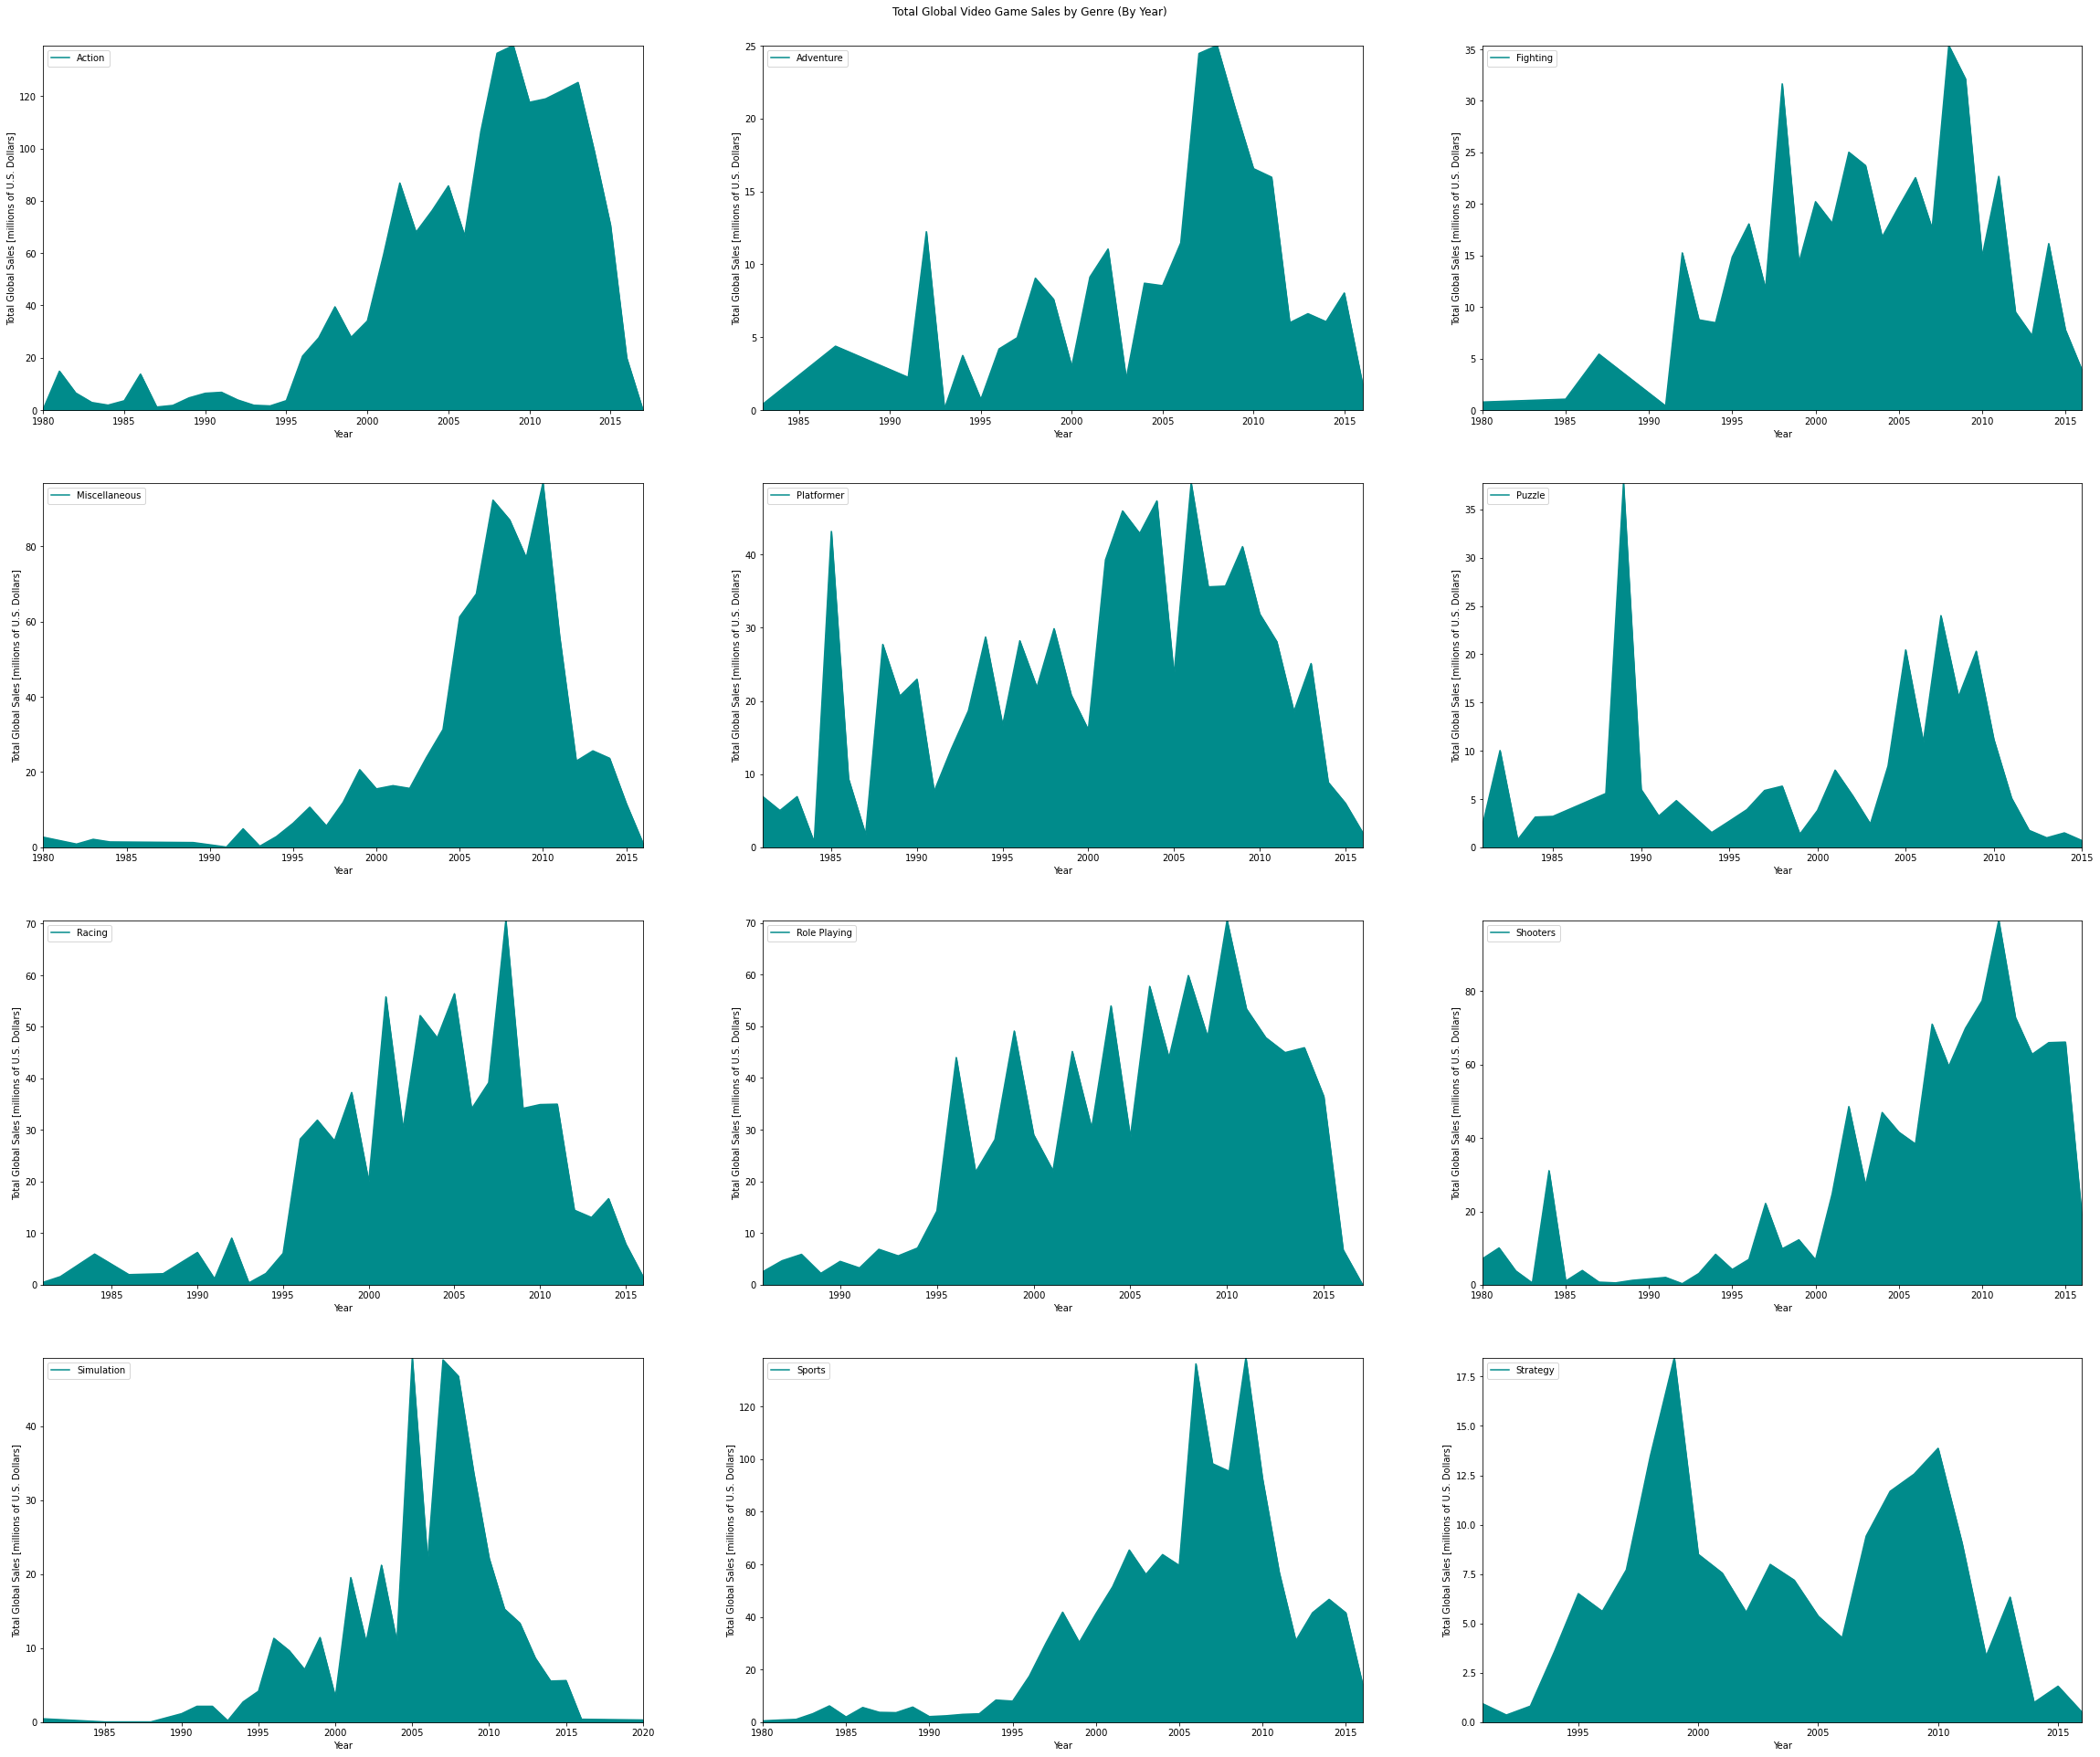

In [30]:
# Use the function plot_genre_sales_by_year_by_region to make a grid of plots of total global sales per year 
# for each genre in the DataFrame.

plt.figure(figsize = (40,30))

# Plot total global sales per year for action games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,1)
plot_genre_sales_by_year_by_region('Action', 'Global', 'Total')
plt.legend(['Action'], loc = 'upper left')

# Plot total global sales per year for adventure games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,2)
plot_genre_sales_by_year_by_region('Adventure', 'Global', 'Total')
plt.legend(['Adventure'], loc = 'upper left')

# Plot total global sales per year for fighting games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,3)
plot_genre_sales_by_year_by_region('Fighting', 'Global', 'Total')
plt.legend(['Fighting'], loc = 'upper left')

# Plot total global sales per year for miscellaneous games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,4)
plot_genre_sales_by_year_by_region('Misc', 'Global', 'Total')
plt.legend(['Miscellaneous'], loc = 'upper left')

# Plot total global sales per year for platformer games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,5)
plot_genre_sales_by_year_by_region('Platform', 'Global', 'Total')
plt.legend(['Platformer'], loc = 'upper left')

# Plot total global sales per year for puzzle games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,6)
plot_genre_sales_by_year_by_region('Puzzle', 'Global', 'Total')
plt.legend(['Puzzle'], loc = 'upper left')

# Plot total global sales per year for racing games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,7)
plot_genre_sales_by_year_by_region('Racing', 'Global', 'Total')
plt.legend(['Racing'], loc = 'upper left')

# Plot total global sales per year for role-laying games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,8)
plot_genre_sales_by_year_by_region('Role-Playing', 'Global', 'Total')
plt.legend(['Role Playing'], loc = 'upper left')

# Plot total global sales per year for first-person shooter games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,9)
plot_genre_sales_by_year_by_region('Shooter', 'Global', 'Total')
plt.legend(['Shooters'], loc = 'upper left')

# Plot total global sales per year for simulation games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,10)
plot_genre_sales_by_year_by_region('Simulation', 'Global', 'Total')
plt.legend(['Simulation'], loc = 'upper left')

# Plot total global sales per year for sports games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,11)
plot_genre_sales_by_year_by_region('Sports', 'Global', 'Total')
plt.legend(['Sports'], loc = 'upper left')

# Plot total global sales per year for strategy games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,12)
plot_genre_sales_by_year_by_region('Strategy', 'Global', 'Total')
plt.legend(['Strategy'], loc = 'upper left')

# add an appropriate title, and make sure there's an appropriate amount of space between subplots:
plt.suptitle('Total Global Video Game Sales by Genre (By Year)', x = 0.5, y = 0.92)
plt.subplots_adjust(top = 0.9, bottom = 0.05)
# print plot to file:
plt.savefig('total_global_sales_per_year_all_genres.png')

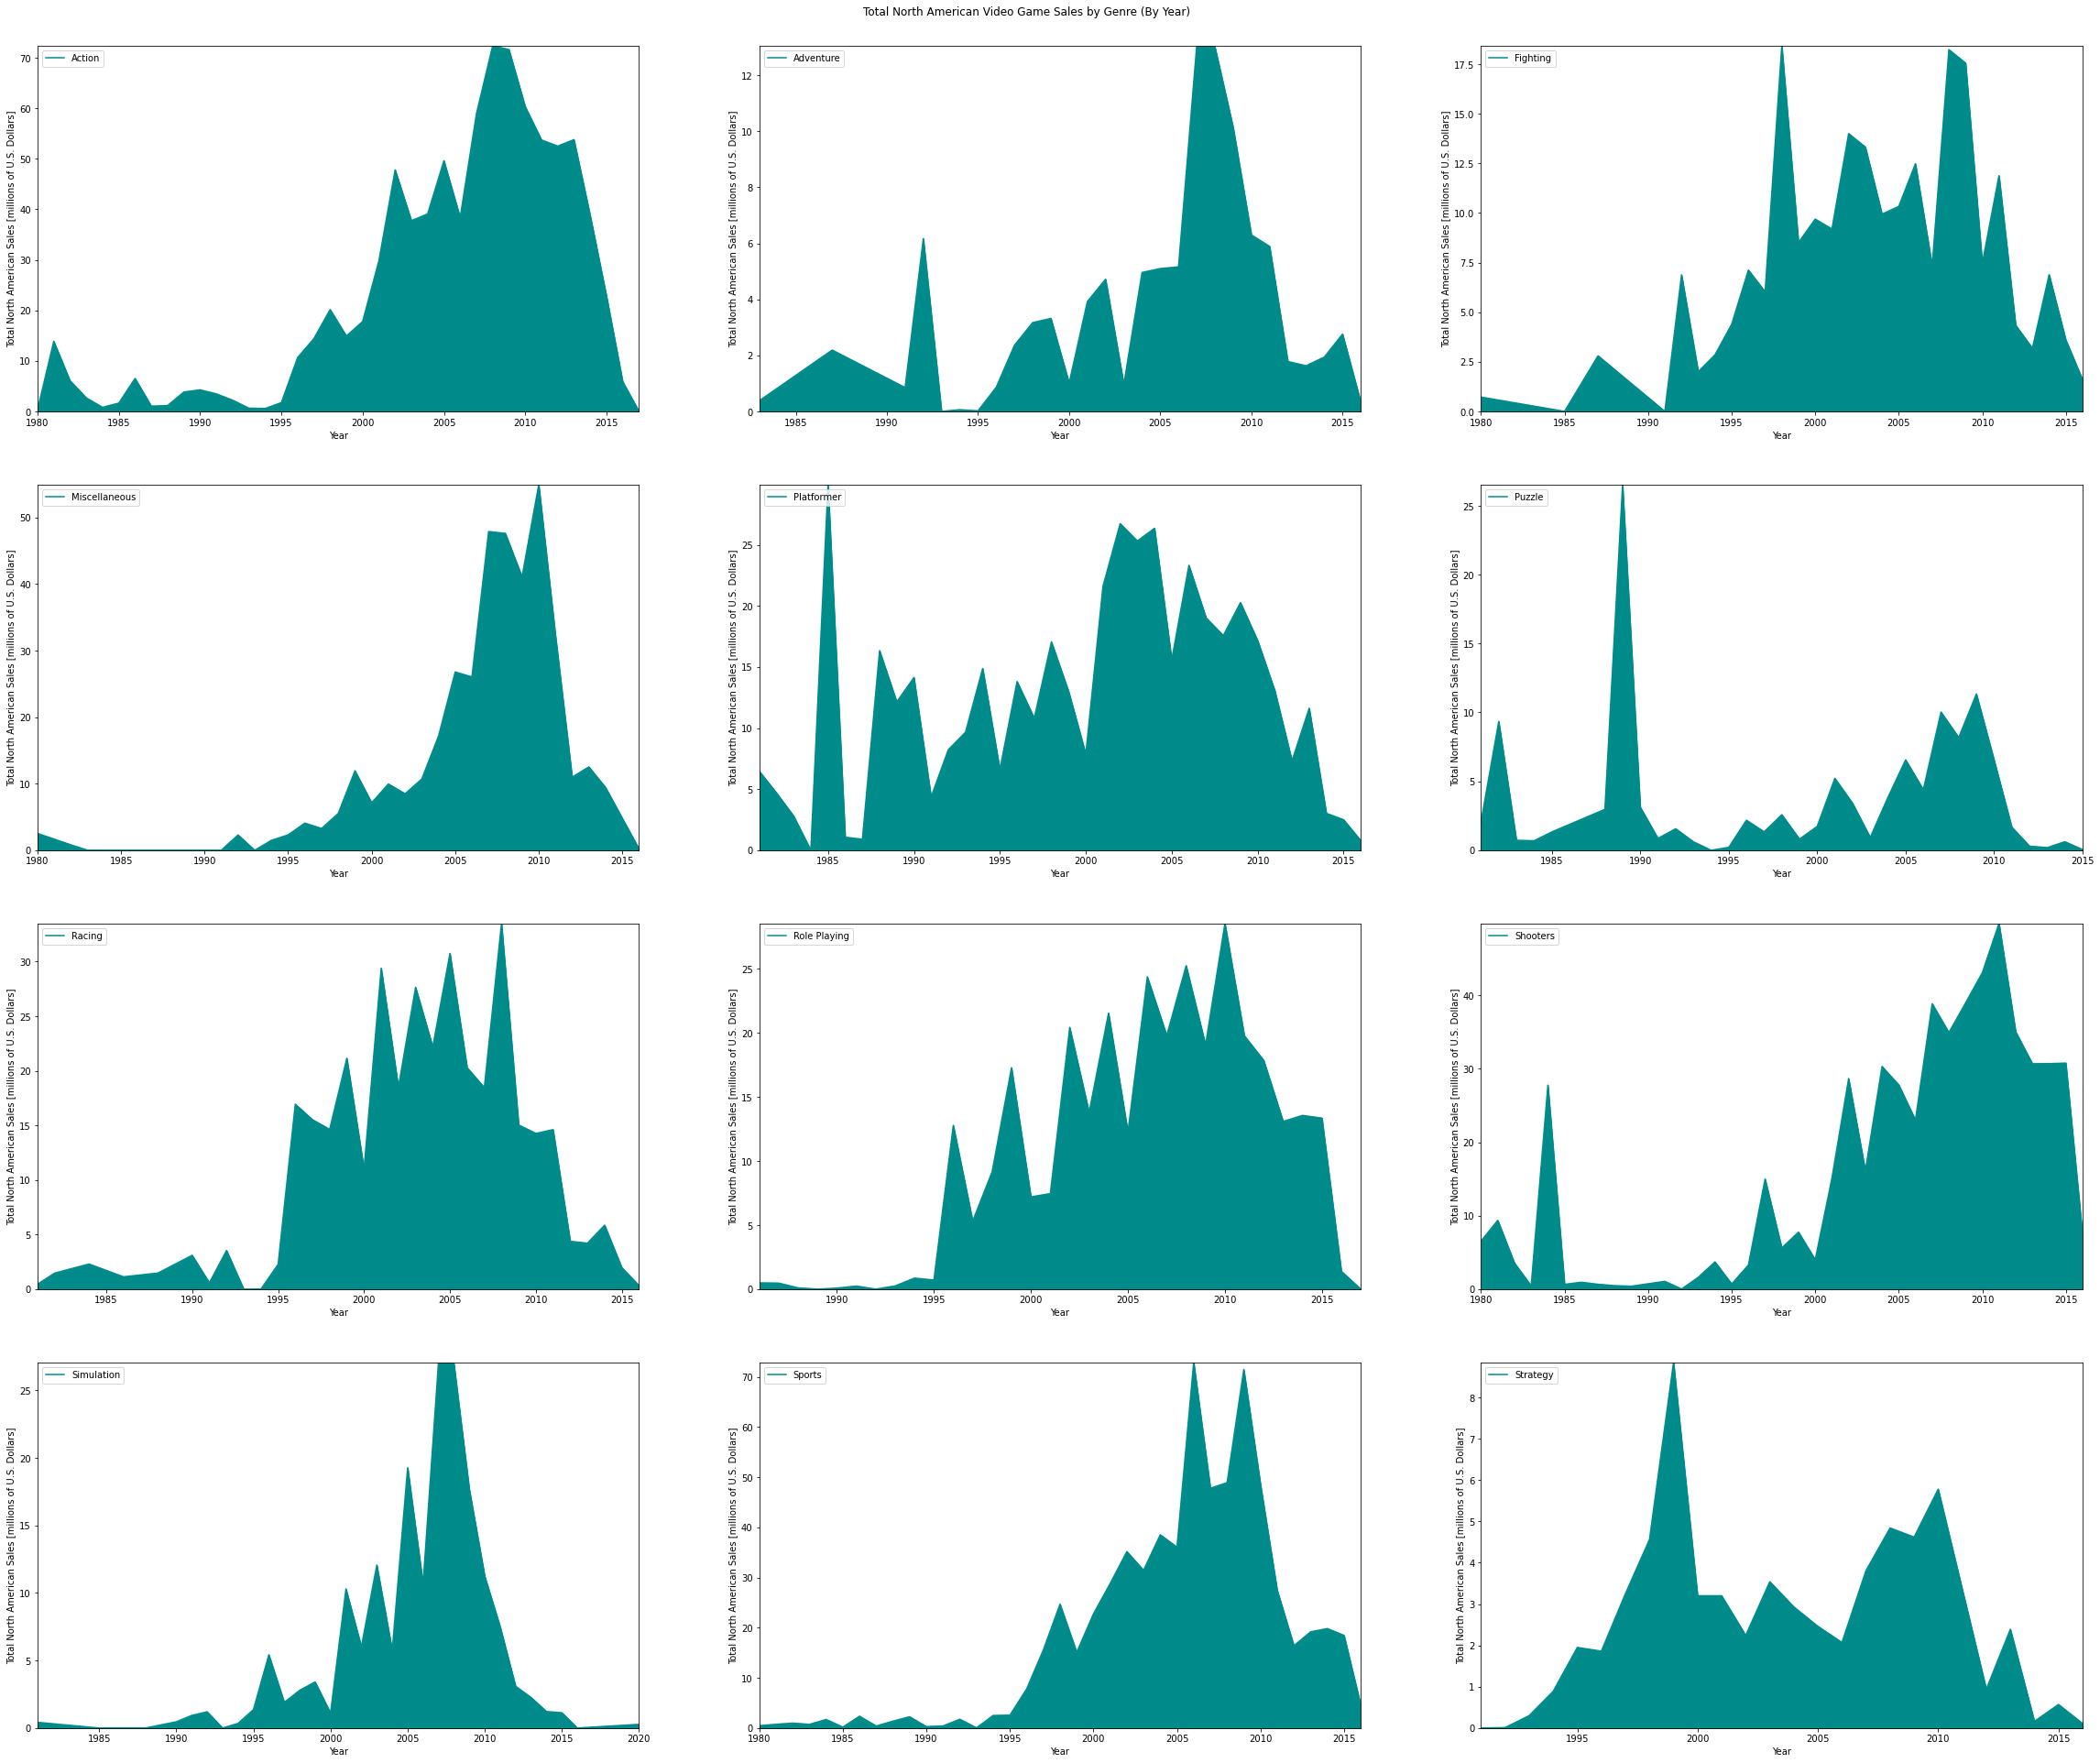

In [31]:
# Use the function plot_genre_sales_by_year_by_region to make a grid of plots of total North American 
# sales per year for each genre in the DataFrame.

plt.figure(figsize = (40,30))

# Plot total North American sales per year for action games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,1)
plot_genre_sales_by_year_by_region('Action', 'North American', 'Total')
plt.legend(['Action'], loc = 'upper left')

# Plot total North American sales per year for adventure games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,2)
plot_genre_sales_by_year_by_region('Adventure', 'North American', 'Total')
plt.legend(['Adventure'], loc = 'upper left')

# Plot total North American sales per year for fighting games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,3)
plot_genre_sales_by_year_by_region('Fighting', 'North American', 'Total')
plt.legend(['Fighting'], loc = 'upper left')

# Plot total North American sales per year for miscellaneous games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,4)
plot_genre_sales_by_year_by_region('Misc', 'North American', 'Total')
plt.legend(['Miscellaneous'], loc = 'upper left')

# Plot total North American sales per year for platformer games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,5)
plot_genre_sales_by_year_by_region('Platform', 'North American', 'Total')
plt.legend(['Platformer'], loc = 'upper left')

# Plot total North American sales per year for puzzle games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,6)
plot_genre_sales_by_year_by_region('Puzzle', 'North American', 'Total')
plt.legend(['Puzzle'], loc = 'upper left')

# Plot total North American sales per year for racing games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,7)
plot_genre_sales_by_year_by_region('Racing', 'North American', 'Total')
plt.legend(['Racing'], loc = 'upper left')

# Plot total North American sales per year for role-laying games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,8)
plot_genre_sales_by_year_by_region('Role-Playing', 'North American', 'Total')
plt.legend(['Role Playing'], loc = 'upper left')

# Plot total North American sales per year for first-person shooter games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,9)
plot_genre_sales_by_year_by_region('Shooter', 'North American', 'Total')
plt.legend(['Shooters'], loc = 'upper left')

# Plot total North American sales per year for simulation games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,10)
plot_genre_sales_by_year_by_region('Simulation', 'North American', 'Total')
plt.legend(['Simulation'], loc = 'upper left')

# Plot total North American sales per year for sports games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,11)
plot_genre_sales_by_year_by_region('Sports', 'North American', 'Total')
plt.legend(['Sports'], loc = 'upper left')

# Plot total North American sales per year for strategy games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,12)
plot_genre_sales_by_year_by_region('Strategy', 'North American', 'Total')
plt.legend(['Strategy'], loc = 'upper left')

# add an appropriate title, and make sure there's an appropriate amount of space between subplots:
plt.suptitle('Total North American Video Game Sales by Genre (By Year)', x = 0.5, y = 0.92)
plt.subplots_adjust(top = 0.9, bottom = 0.05)
# print plot to file:
plt.savefig('total_NA_sales_per_year_all_genres.png')

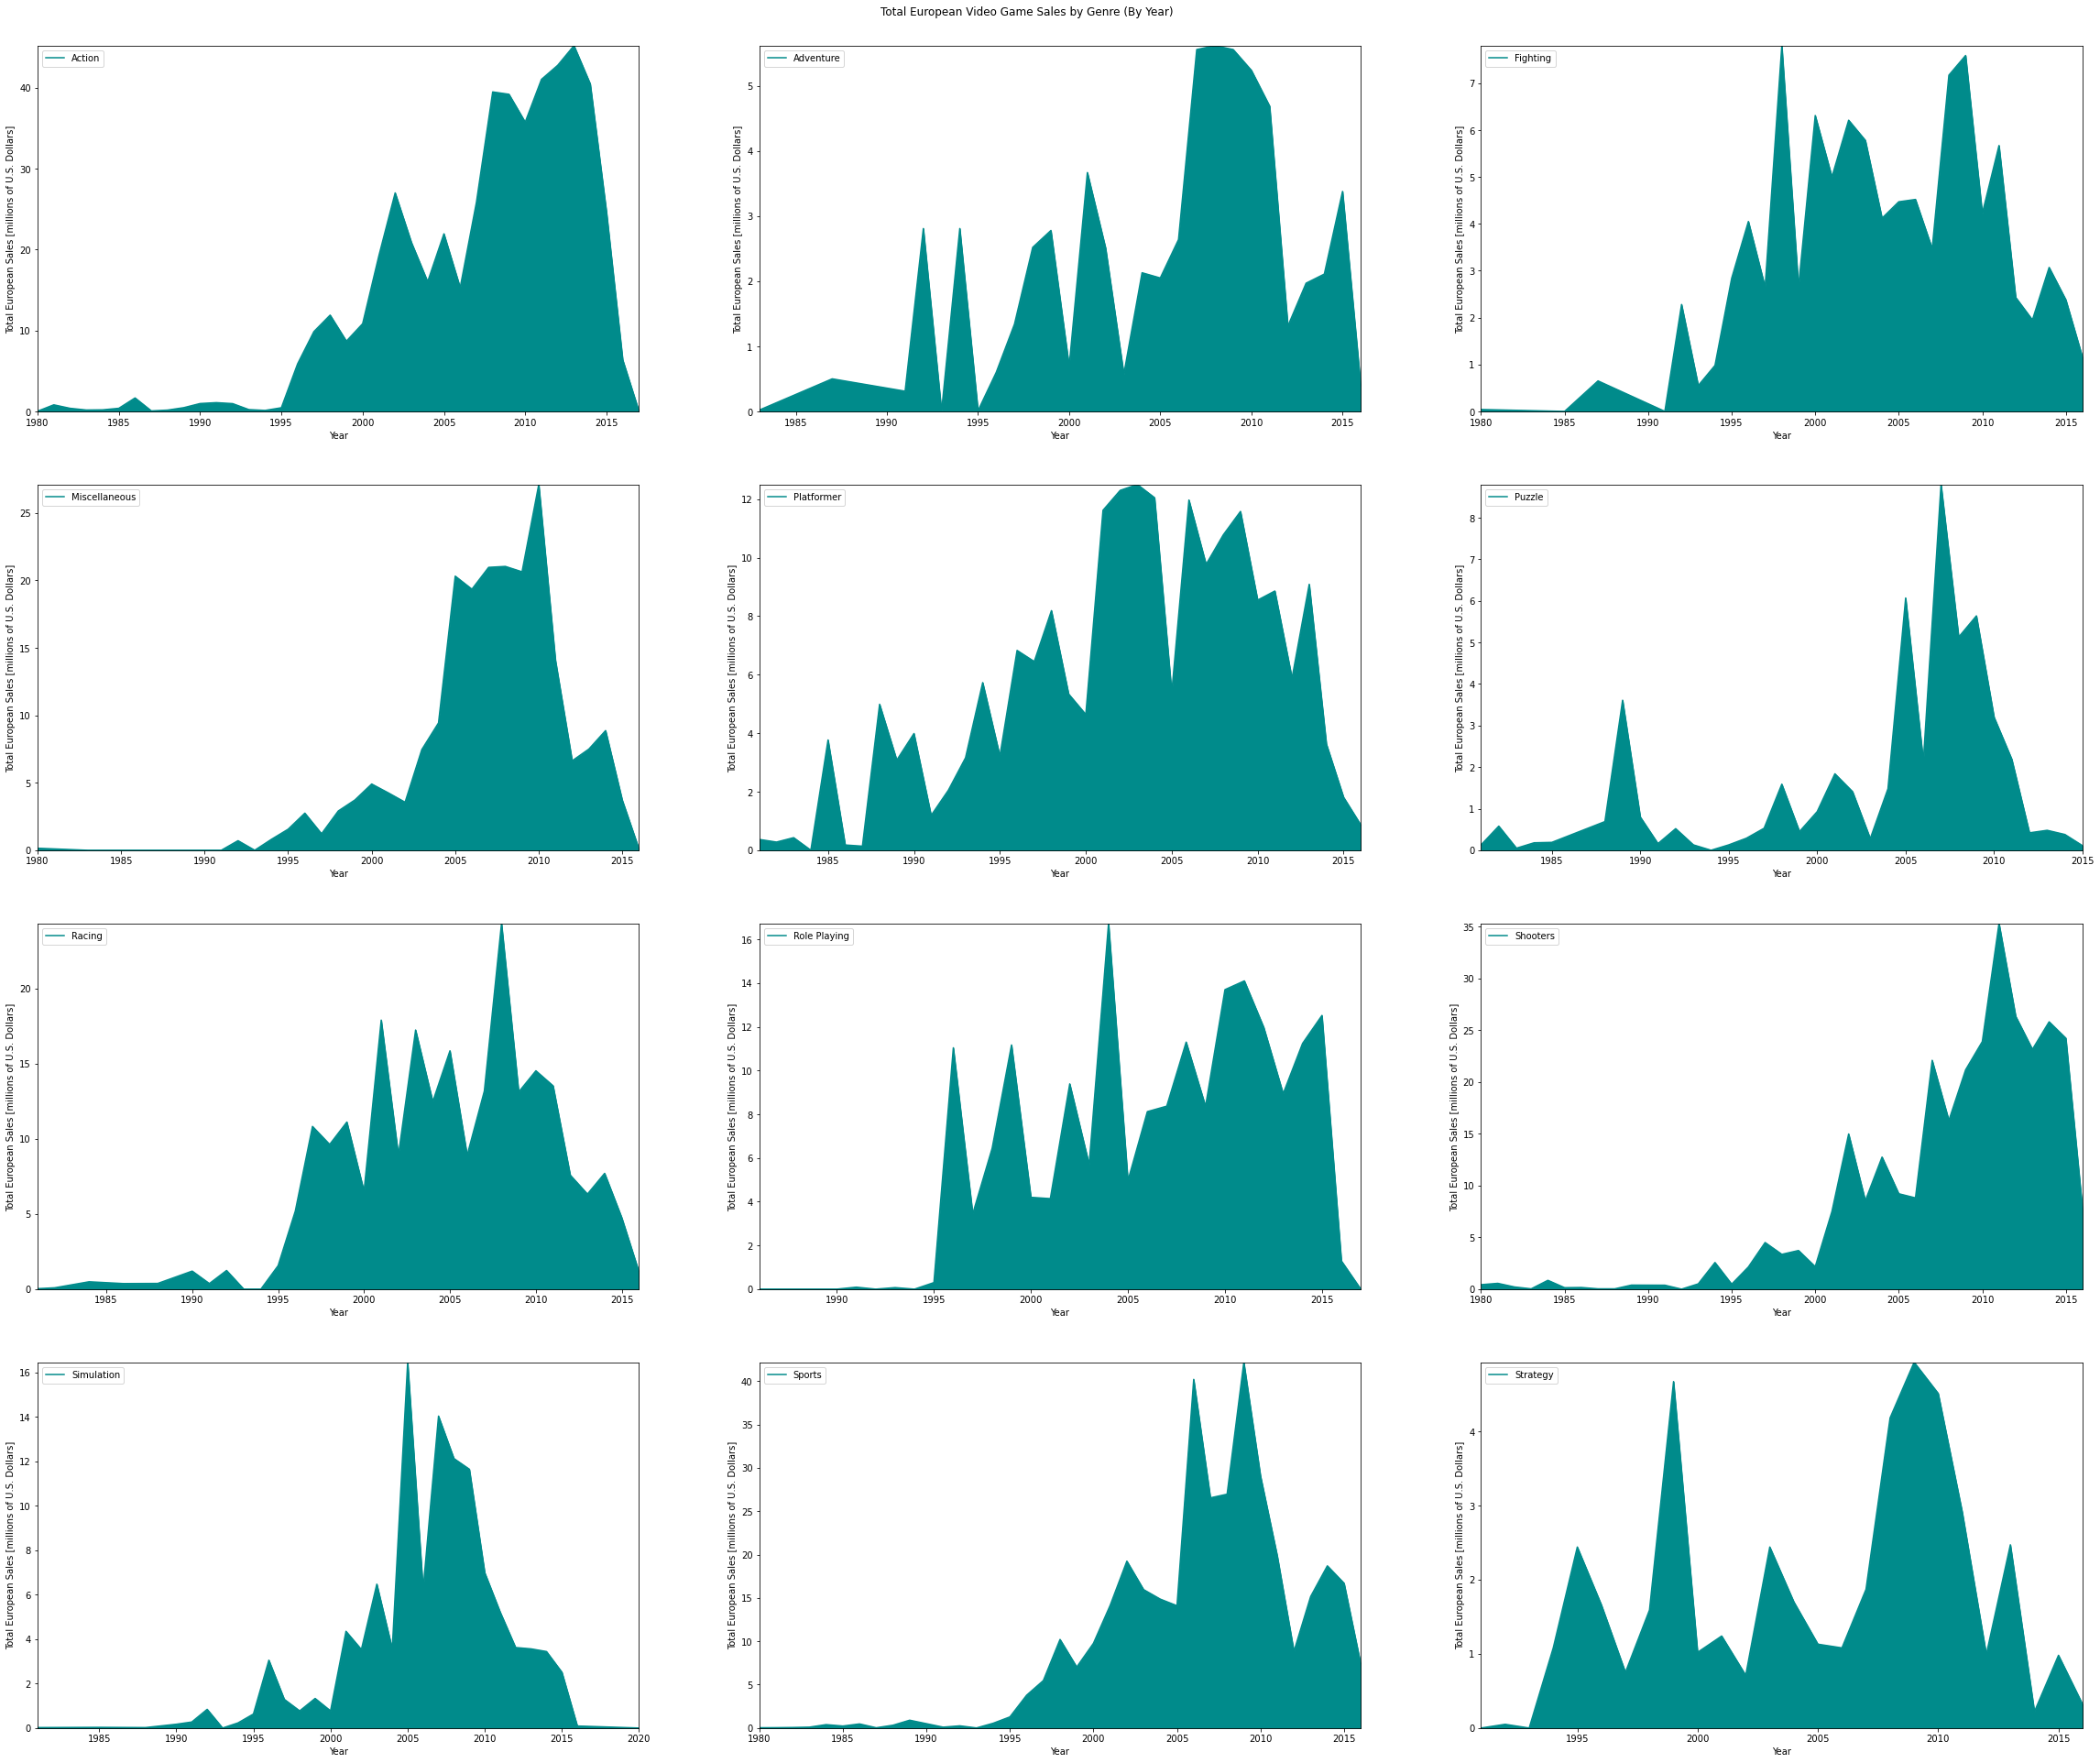

In [32]:
# Use the function plot_genre_sales_by_year_by_region to make a grid of plots of total European 
# sales per year for each genre in the DataFrame.

plt.figure(figsize = (40,30))

# Plot total European sales per year for action games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,1)
plot_genre_sales_by_year_by_region('Action', 'European', 'Total')
plt.legend(['Action'], loc = 'upper left')

# Plot total European sales per year for adventure games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,2)
plot_genre_sales_by_year_by_region('Adventure', 'European', 'Total')
plt.legend(['Adventure'], loc = 'upper left')

# Plot total European sales per year for fighting games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,3)
plot_genre_sales_by_year_by_region('Fighting', 'European', 'Total')
plt.legend(['Fighting'], loc = 'upper left')

# Plot total European sales per year for miscellaneous games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,4)
plot_genre_sales_by_year_by_region('Misc', 'European', 'Total')
plt.legend(['Miscellaneous'], loc = 'upper left')

# Plot total European sales per year for platformer games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,5)
plot_genre_sales_by_year_by_region('Platform', 'European', 'Total')
plt.legend(['Platformer'], loc = 'upper left')

# Plot total European sales per year for puzzle games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,6)
plot_genre_sales_by_year_by_region('Puzzle', 'European', 'Total')
plt.legend(['Puzzle'], loc = 'upper left')

# Plot total European sales per year for racing games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,7)
plot_genre_sales_by_year_by_region('Racing', 'European', 'Total')
plt.legend(['Racing'], loc = 'upper left')

# Plot total European sales per year for role-laying games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,8)
plot_genre_sales_by_year_by_region('Role-Playing', 'European', 'Total')
plt.legend(['Role Playing'], loc = 'upper left')

# Plot total European sales per year for first-person shooter games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,9)
plot_genre_sales_by_year_by_region('Shooter', 'European', 'Total')
plt.legend(['Shooters'], loc = 'upper left')

# Plot total European sales per year for simulation games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,10)
plot_genre_sales_by_year_by_region('Simulation', 'European', 'Total')
plt.legend(['Simulation'], loc = 'upper left')

# Plot total European sales per year for sports games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,11)
plot_genre_sales_by_year_by_region('Sports', 'European', 'Total')
plt.legend(['Sports'], loc = 'upper left')

# Plot total European sales per year for strategy games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,12)
plot_genre_sales_by_year_by_region('Strategy', 'European', 'Total')
plt.legend(['Strategy'], loc = 'upper left')

# add an appropriate title, and make sure there's an appropriate amount of space between subplots:
plt.suptitle('Total European Video Game Sales by Genre (By Year)', x = 0.5, y = 0.92)
plt.subplots_adjust(top = 0.9, bottom = 0.05)
# print plot to file:
plt.savefig('total_EU_sales_per_year_all_genres.png')

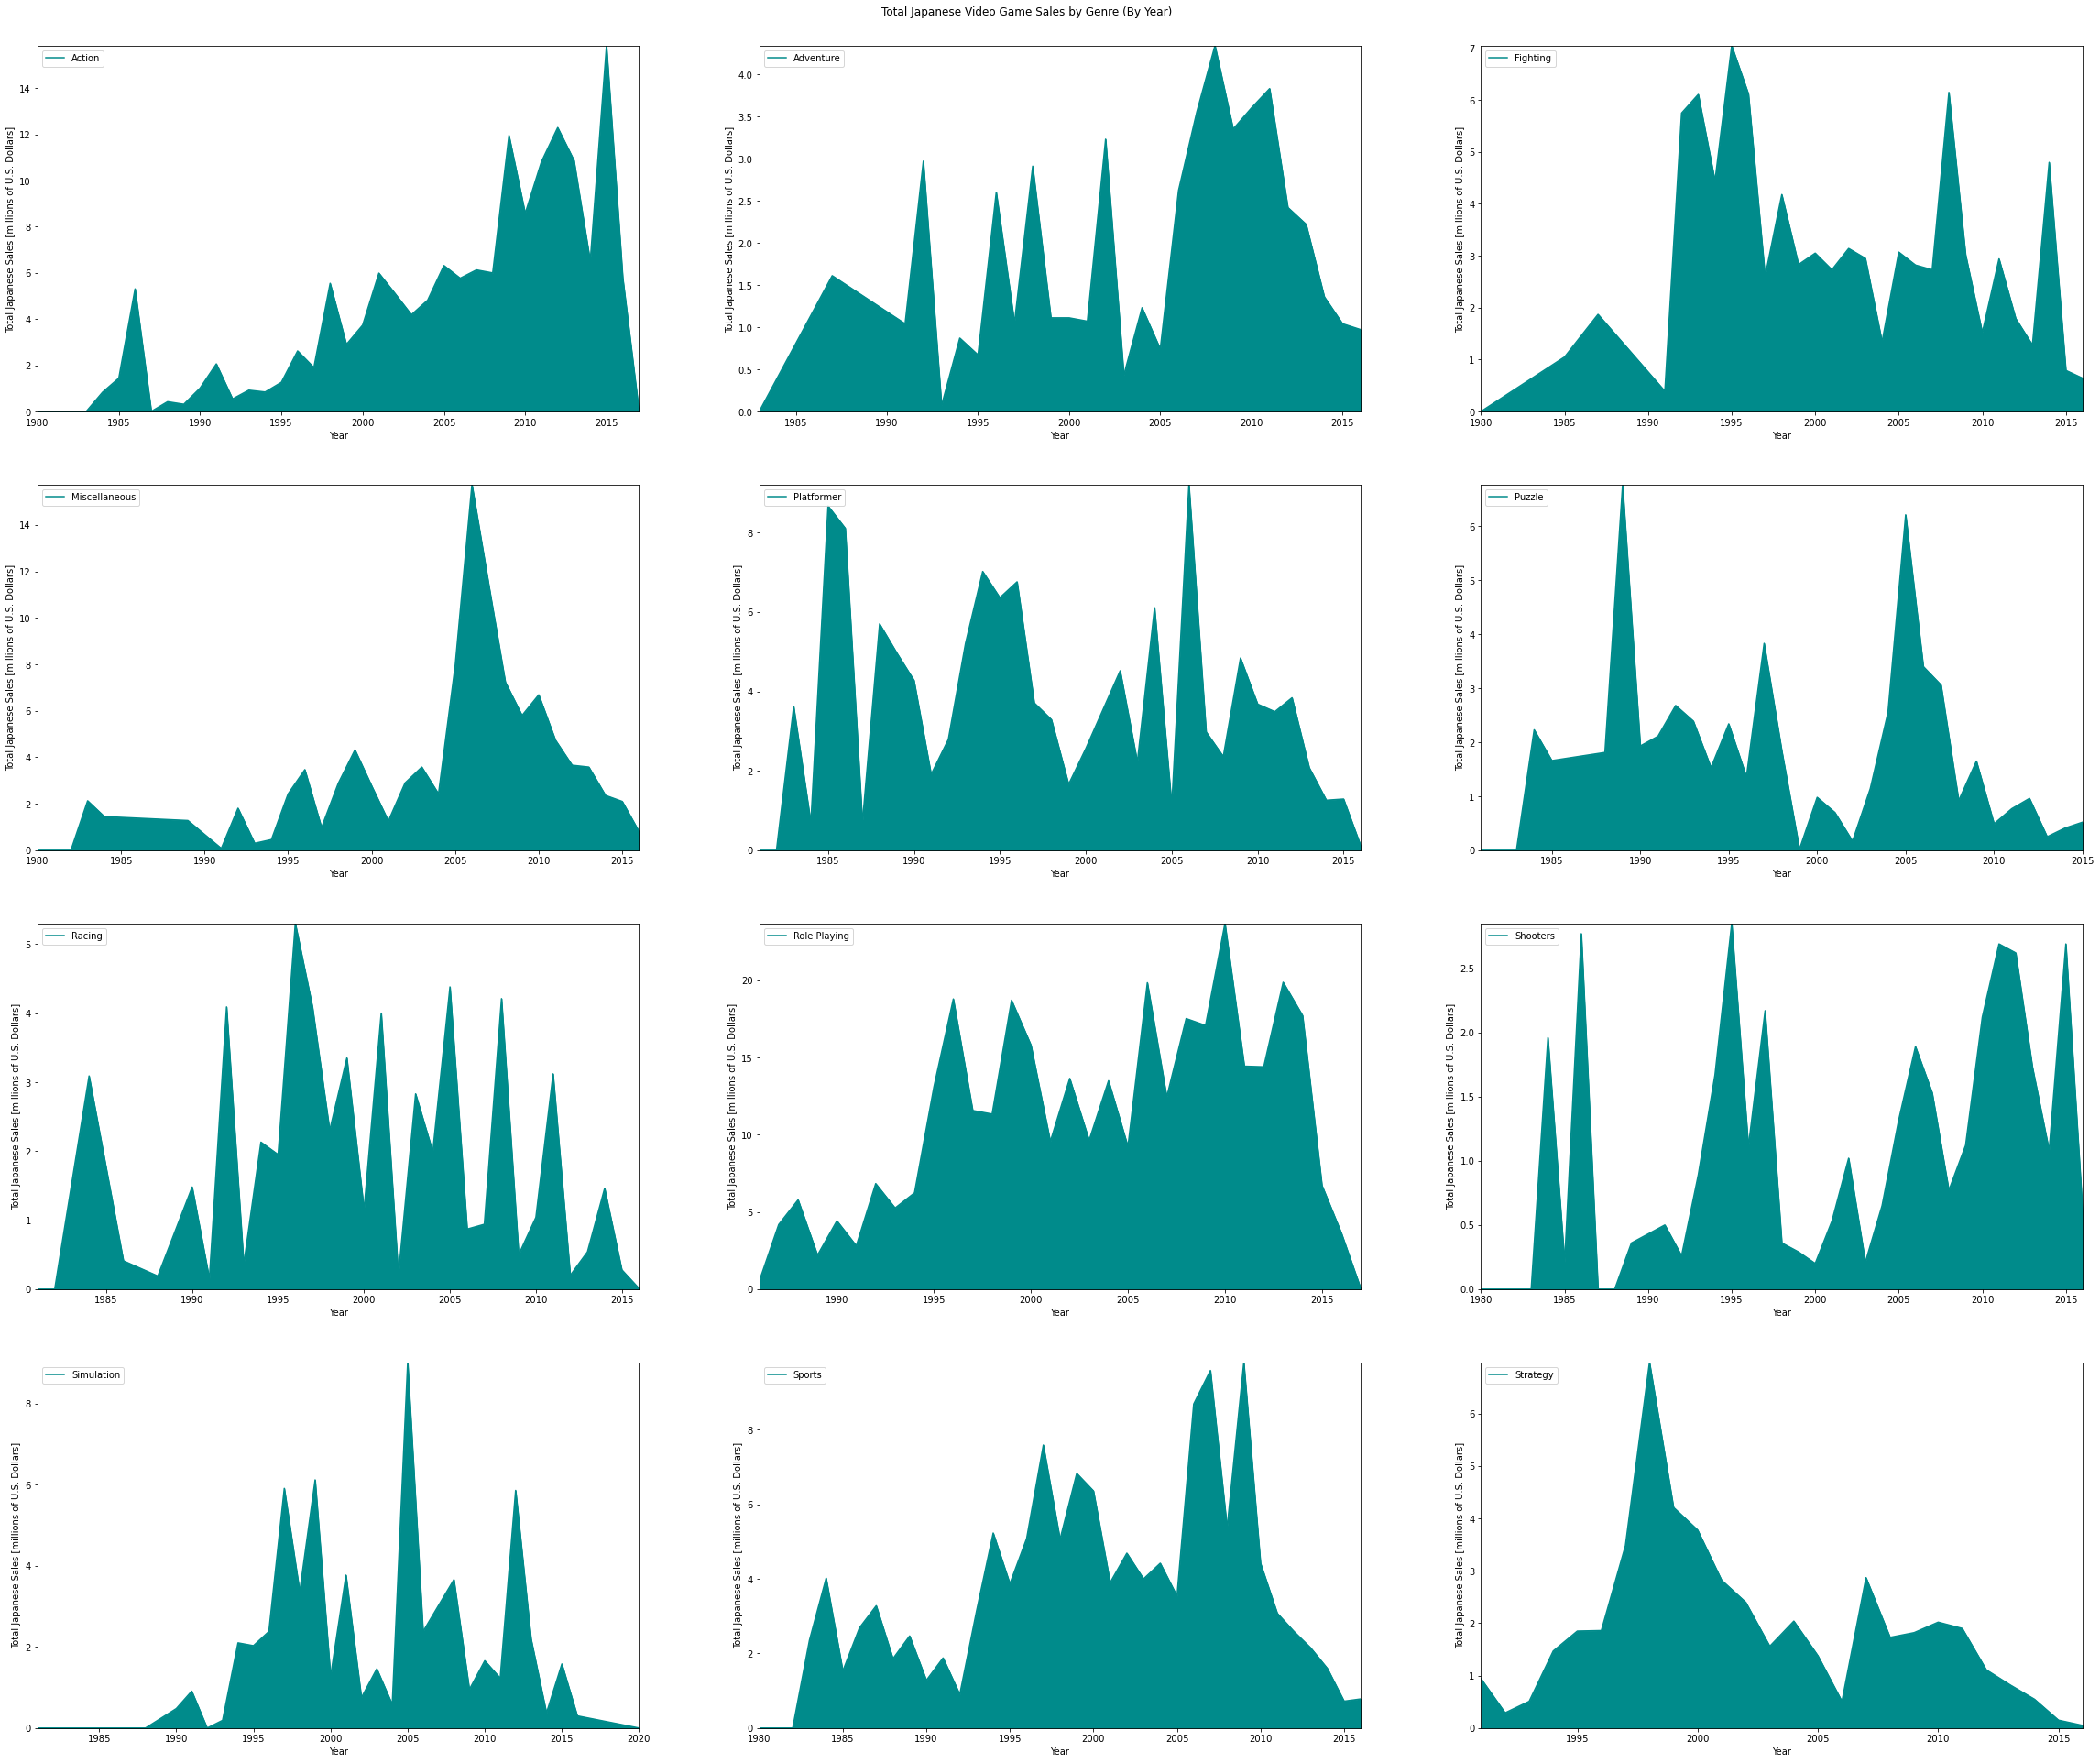

In [33]:
# Use the function plot_genre_sales_by_year_by_region to make a grid of plots of total Japanese 
# sales per year for each genre in the DataFrame.

plt.figure(figsize = (40,30))

# Plot total Japanese sales per year for action games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,1)
plot_genre_sales_by_year_by_region('Action', 'Japanese', 'Total')
plt.legend(['Action'], loc = 'upper left')

# Plot total Japanese sales per year for adventure games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,2)
plot_genre_sales_by_year_by_region('Adventure', 'Japanese', 'Total')
plt.legend(['Adventure'], loc = 'upper left')

# Plot total Japanese sales per year for fighting games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,3)
plot_genre_sales_by_year_by_region('Fighting', 'Japanese', 'Total')
plt.legend(['Fighting'], loc = 'upper left')

# Plot total Japanese sales per year for miscellaneous games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,4)
plot_genre_sales_by_year_by_region('Misc', 'Japanese', 'Total')
plt.legend(['Miscellaneous'], loc = 'upper left')

# Plot total Japanese sales per year for platformer games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,5)
plot_genre_sales_by_year_by_region('Platform', 'Japanese', 'Total')
plt.legend(['Platformer'], loc = 'upper left')

# Plot total Japanese sales per year for puzzle games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,6)
plot_genre_sales_by_year_by_region('Puzzle', 'Japanese', 'Total')
plt.legend(['Puzzle'], loc = 'upper left')

# Plot total Japanese sales per year for racing games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,7)
plot_genre_sales_by_year_by_region('Racing', 'Japanese', 'Total')
plt.legend(['Racing'], loc = 'upper left')

# Plot total Japanese sales per year for role-laying games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,8)
plot_genre_sales_by_year_by_region('Role-Playing', 'Japanese', 'Total')
plt.legend(['Role Playing'], loc = 'upper left')

# Plot total Japanese sales per year for first-person shooter games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,9)
plot_genre_sales_by_year_by_region('Shooter', 'Japanese', 'Total')
plt.legend(['Shooters'], loc = 'upper left')

# Plot total Japanese sales per year for simulation games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,10)
plot_genre_sales_by_year_by_region('Simulation', 'Japanese', 'Total')
plt.legend(['Simulation'], loc = 'upper left')

# Plot total Japanese sales per year for sports games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,11)
plot_genre_sales_by_year_by_region('Sports', 'Japanese', 'Total')
plt.legend(['Sports'], loc = 'upper left')

# Plot total Japanese sales per year for strategy games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,12)
plot_genre_sales_by_year_by_region('Strategy', 'Japanese', 'Total')
plt.legend(['Strategy'], loc = 'upper left')

# add an appropriate title, and make sure there's an appropriate amount of space between subplots:
plt.suptitle('Total Japanese Video Game Sales by Genre (By Year)', x = 0.5, y = 0.92)
plt.subplots_adjust(top = 0.9, bottom = 0.05)
# print plot to file:
plt.savefig('total_JP_sales_per_year_all_genres.png')

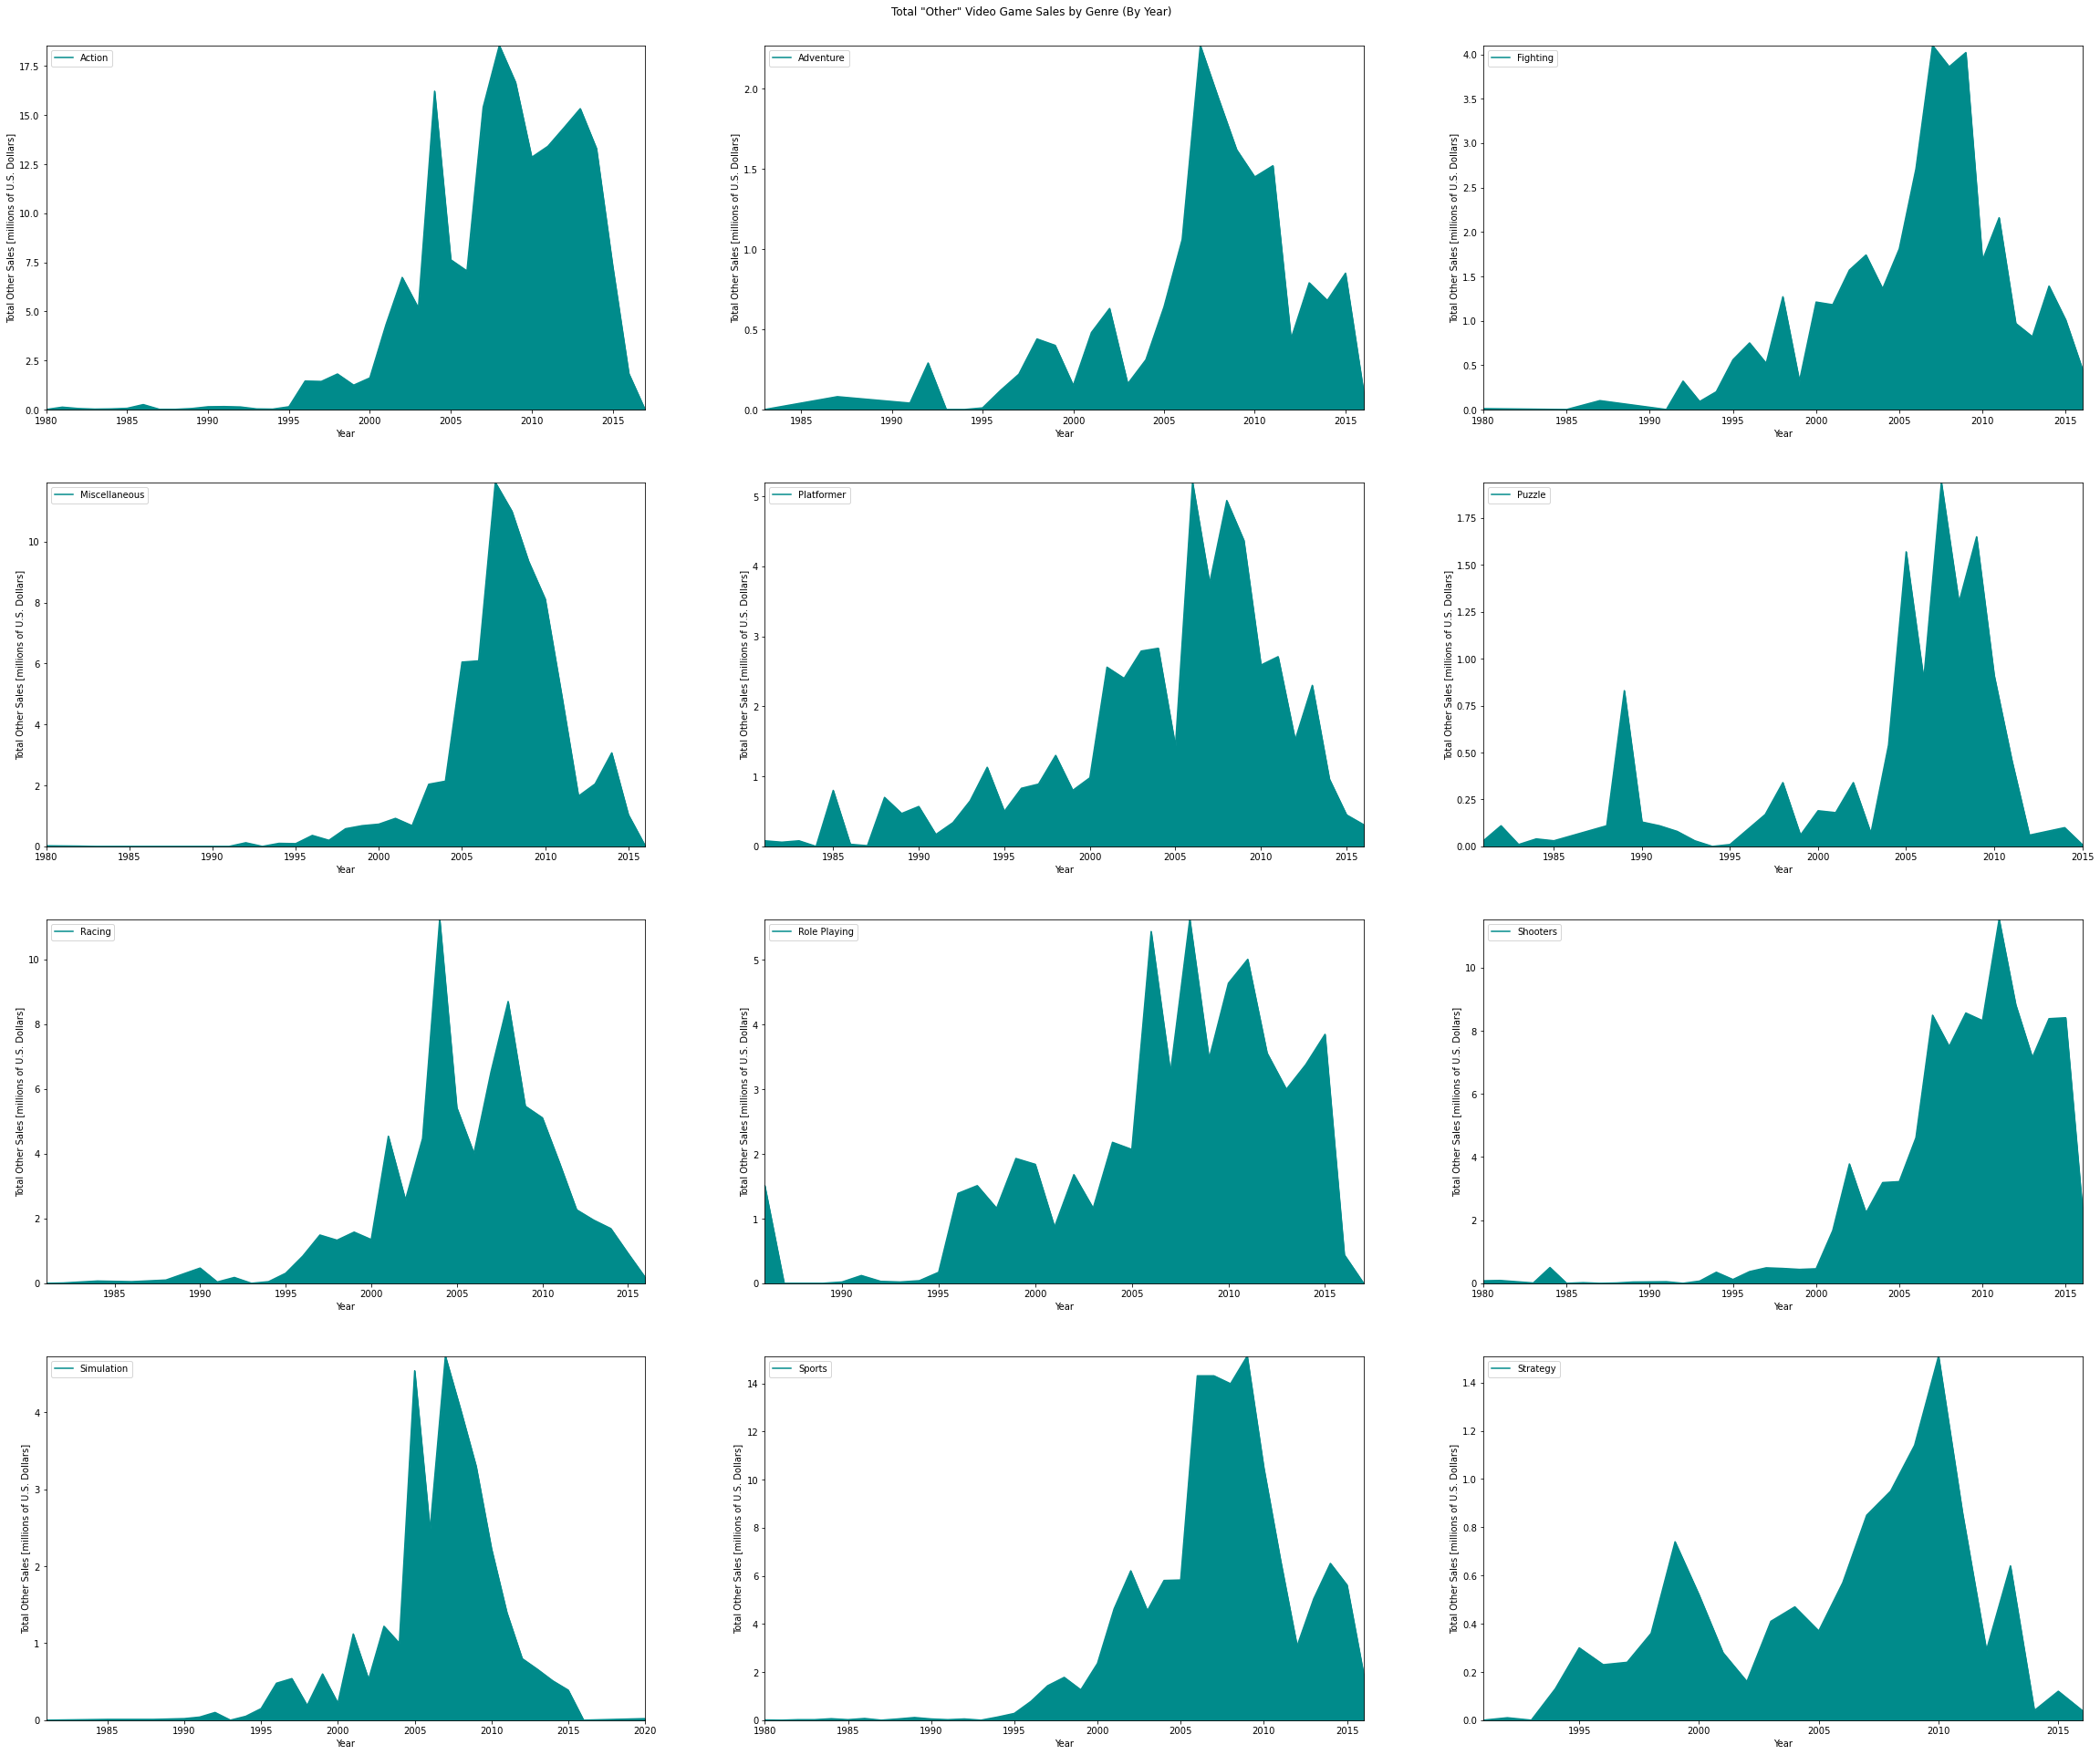

In [34]:
# Use the function plot_genre_sales_by_year_by_region to make a grid of plots of total "Other" 
# sales per year for each genre in the DataFrame.

plt.figure(figsize = (40,30))

# Plot total "Other" sales per year for action games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,1)
plot_genre_sales_by_year_by_region('Action', 'Other', 'Total')
plt.legend(['Action'], loc = 'upper left')

# Plot total "Other" sales per year for adventure games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,2)
plot_genre_sales_by_year_by_region('Adventure', 'Other', 'Total')
plt.legend(['Adventure'], loc = 'upper left')

# Plot total "Other" sales per year for fighting games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,3)
plot_genre_sales_by_year_by_region('Fighting', 'Other', 'Total')
plt.legend(['Fighting'], loc = 'upper left')

# Plot total "Other" sales per year for miscellaneous games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,4)
plot_genre_sales_by_year_by_region('Misc', 'Other', 'Total')
plt.legend(['Miscellaneous'], loc = 'upper left')

# Plot total "Other" sales per year for platformer games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,5)
plot_genre_sales_by_year_by_region('Platform', 'Other', 'Total')
plt.legend(['Platformer'], loc = 'upper left')

# Plot total "Other" sales per year for puzzle games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,6)
plot_genre_sales_by_year_by_region('Puzzle', 'Other', 'Total')
plt.legend(['Puzzle'], loc = 'upper left')

# Plot total "Other" sales per year for racing games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,7)
plot_genre_sales_by_year_by_region('Racing', 'Other', 'Total')
plt.legend(['Racing'], loc = 'upper left')

# Plot total "Other" sales per year for role-laying games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,8)
plot_genre_sales_by_year_by_region('Role-Playing', 'Other', 'Total')
plt.legend(['Role Playing'], loc = 'upper left')

# Plot total "Other" sales per year for first-person shooter games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,9)
plot_genre_sales_by_year_by_region('Shooter', 'Other', 'Total')
plt.legend(['Shooters'], loc = 'upper left')

# Plot total "Other" sales per year for simulation games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,10)
plot_genre_sales_by_year_by_region('Simulation', 'Other', 'Total')
plt.legend(['Simulation'], loc = 'upper left')

# Plot total "Other" sales per year for sports games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,11)
plot_genre_sales_by_year_by_region('Sports', 'Other', 'Total')
plt.legend(['Sports'], loc = 'upper left')

# Plot total "Other" sales per year for strategy games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,12)
plot_genre_sales_by_year_by_region('Strategy', 'Other', 'Total')
plt.legend(['Strategy'], loc = 'upper left')

# add an appropriate title, and make sure there's an appropriate amount of space between subplots:
plt.suptitle('Total "Other" Video Game Sales by Genre (By Year)', x = 0.5, y = 0.92)
plt.subplots_adjust(top = 0.9, bottom = 0.05)
# print plot to file:
plt.savefig('total_Other_sales_per_year_all_genres.png')

<h3> Plots of Average Sales per Year by Genre, For Each Region </h3>

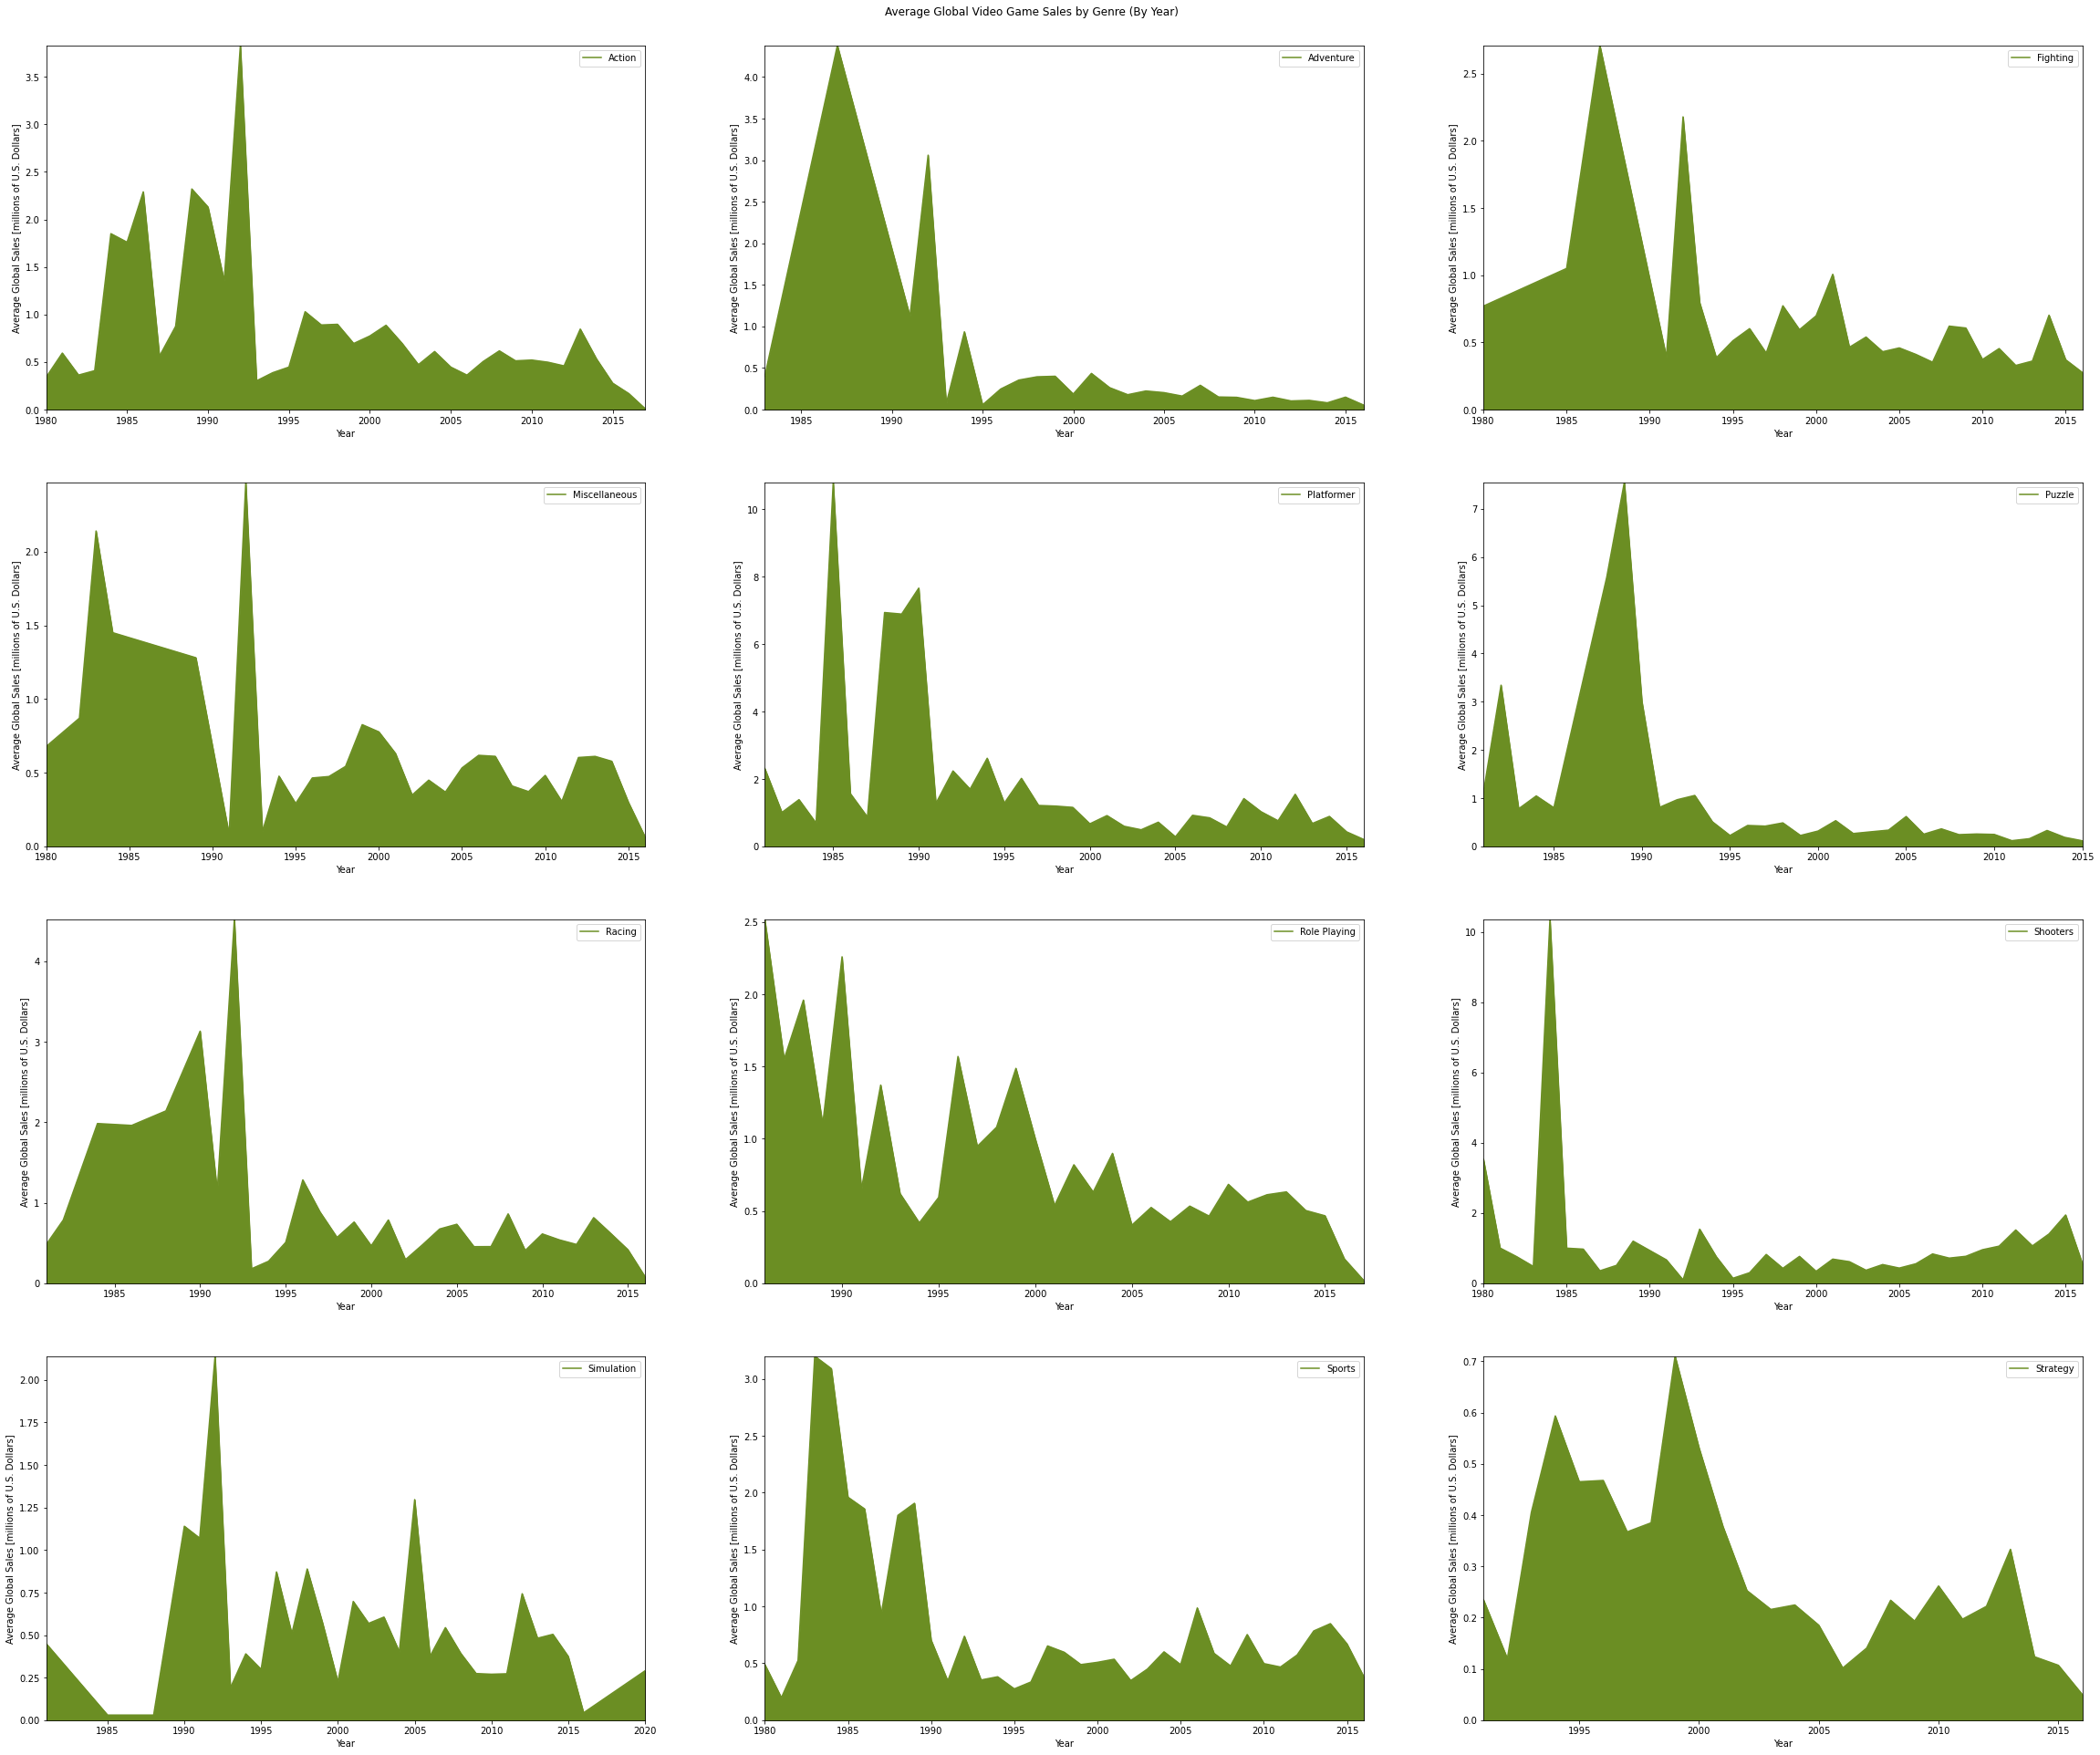

In [35]:
# Use the function plot_genre_sales_by_year_by_region to make a grid of plots of average global sales per year 
# for each genre in the DataFrame.

plt.figure(figsize = (40,30))

# Plot average global sales per year for action games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,1)
plot_genre_sales_by_year_by_region('Action', 'Global', 'Average')
plt.legend(['Action'], loc = 'upper right')

# Plot average global sales per year for adventure games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,2)
plot_genre_sales_by_year_by_region('Adventure', 'Global', 'Average')
plt.legend(['Adventure'], loc = 'upper right')

# Plot average global sales per year for fighting games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,3)
plot_genre_sales_by_year_by_region('Fighting', 'Global', 'Average')
plt.legend(['Fighting'], loc = 'upper right')

# Plot average global sales per year for miscellaneous games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,4)
plot_genre_sales_by_year_by_region('Misc', 'Global', 'Average')
plt.legend(['Miscellaneous'], loc = 'upper right')

# Plot average global sales per year for platformer games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,5)
plot_genre_sales_by_year_by_region('Platform', 'Global', 'Average')
plt.legend(['Platformer'], loc = 'upper right')

# Plot average global sales per year for puzzle games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,6)
plot_genre_sales_by_year_by_region('Puzzle', 'Global', 'Average')
plt.legend(['Puzzle'], loc = 'upper right')

# Plot average global sales per year for racing games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,7)
plot_genre_sales_by_year_by_region('Racing', 'Global', 'Average')
plt.legend(['Racing'], loc = 'upper right')

# Plot average global sales per year for role-playing games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,8)
plot_genre_sales_by_year_by_region('Role-Playing', 'Global', 'Average')
plt.legend(['Role Playing'], loc = 'upper right')

# Plot average global sales per year for firt-person shooter games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,9)
plot_genre_sales_by_year_by_region('Shooter', 'Global', 'Average')
plt.legend(['Shooters'], loc = 'upper right')

# Plot average global sales per year for simulation games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,10)
plot_genre_sales_by_year_by_region('Simulation', 'Global', 'Average')
plt.legend(['Simulation'], loc = 'upper right')

# Plot average global sales per year for sports games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,11)
plot_genre_sales_by_year_by_region('Sports', 'Global', 'Average')
plt.legend(['Sports'], loc = 'upper right')

# Plot average global sales per year for strategy games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,12)
plot_genre_sales_by_year_by_region('Strategy', 'Global', 'Average')
plt.legend(['Strategy'], loc = 'upper right')

# add an appropriate title, and make sure there's an appropriate amount of space between subplots:
plt.suptitle('Average Global Video Game Sales by Genre (By Year)', x = 0.5, y = 0.92)

plt.subplots_adjust(top = 0.9, bottom = 0.05)
# print plot to file:
plt.savefig('average_global_sales_per_year_all_genres.png')

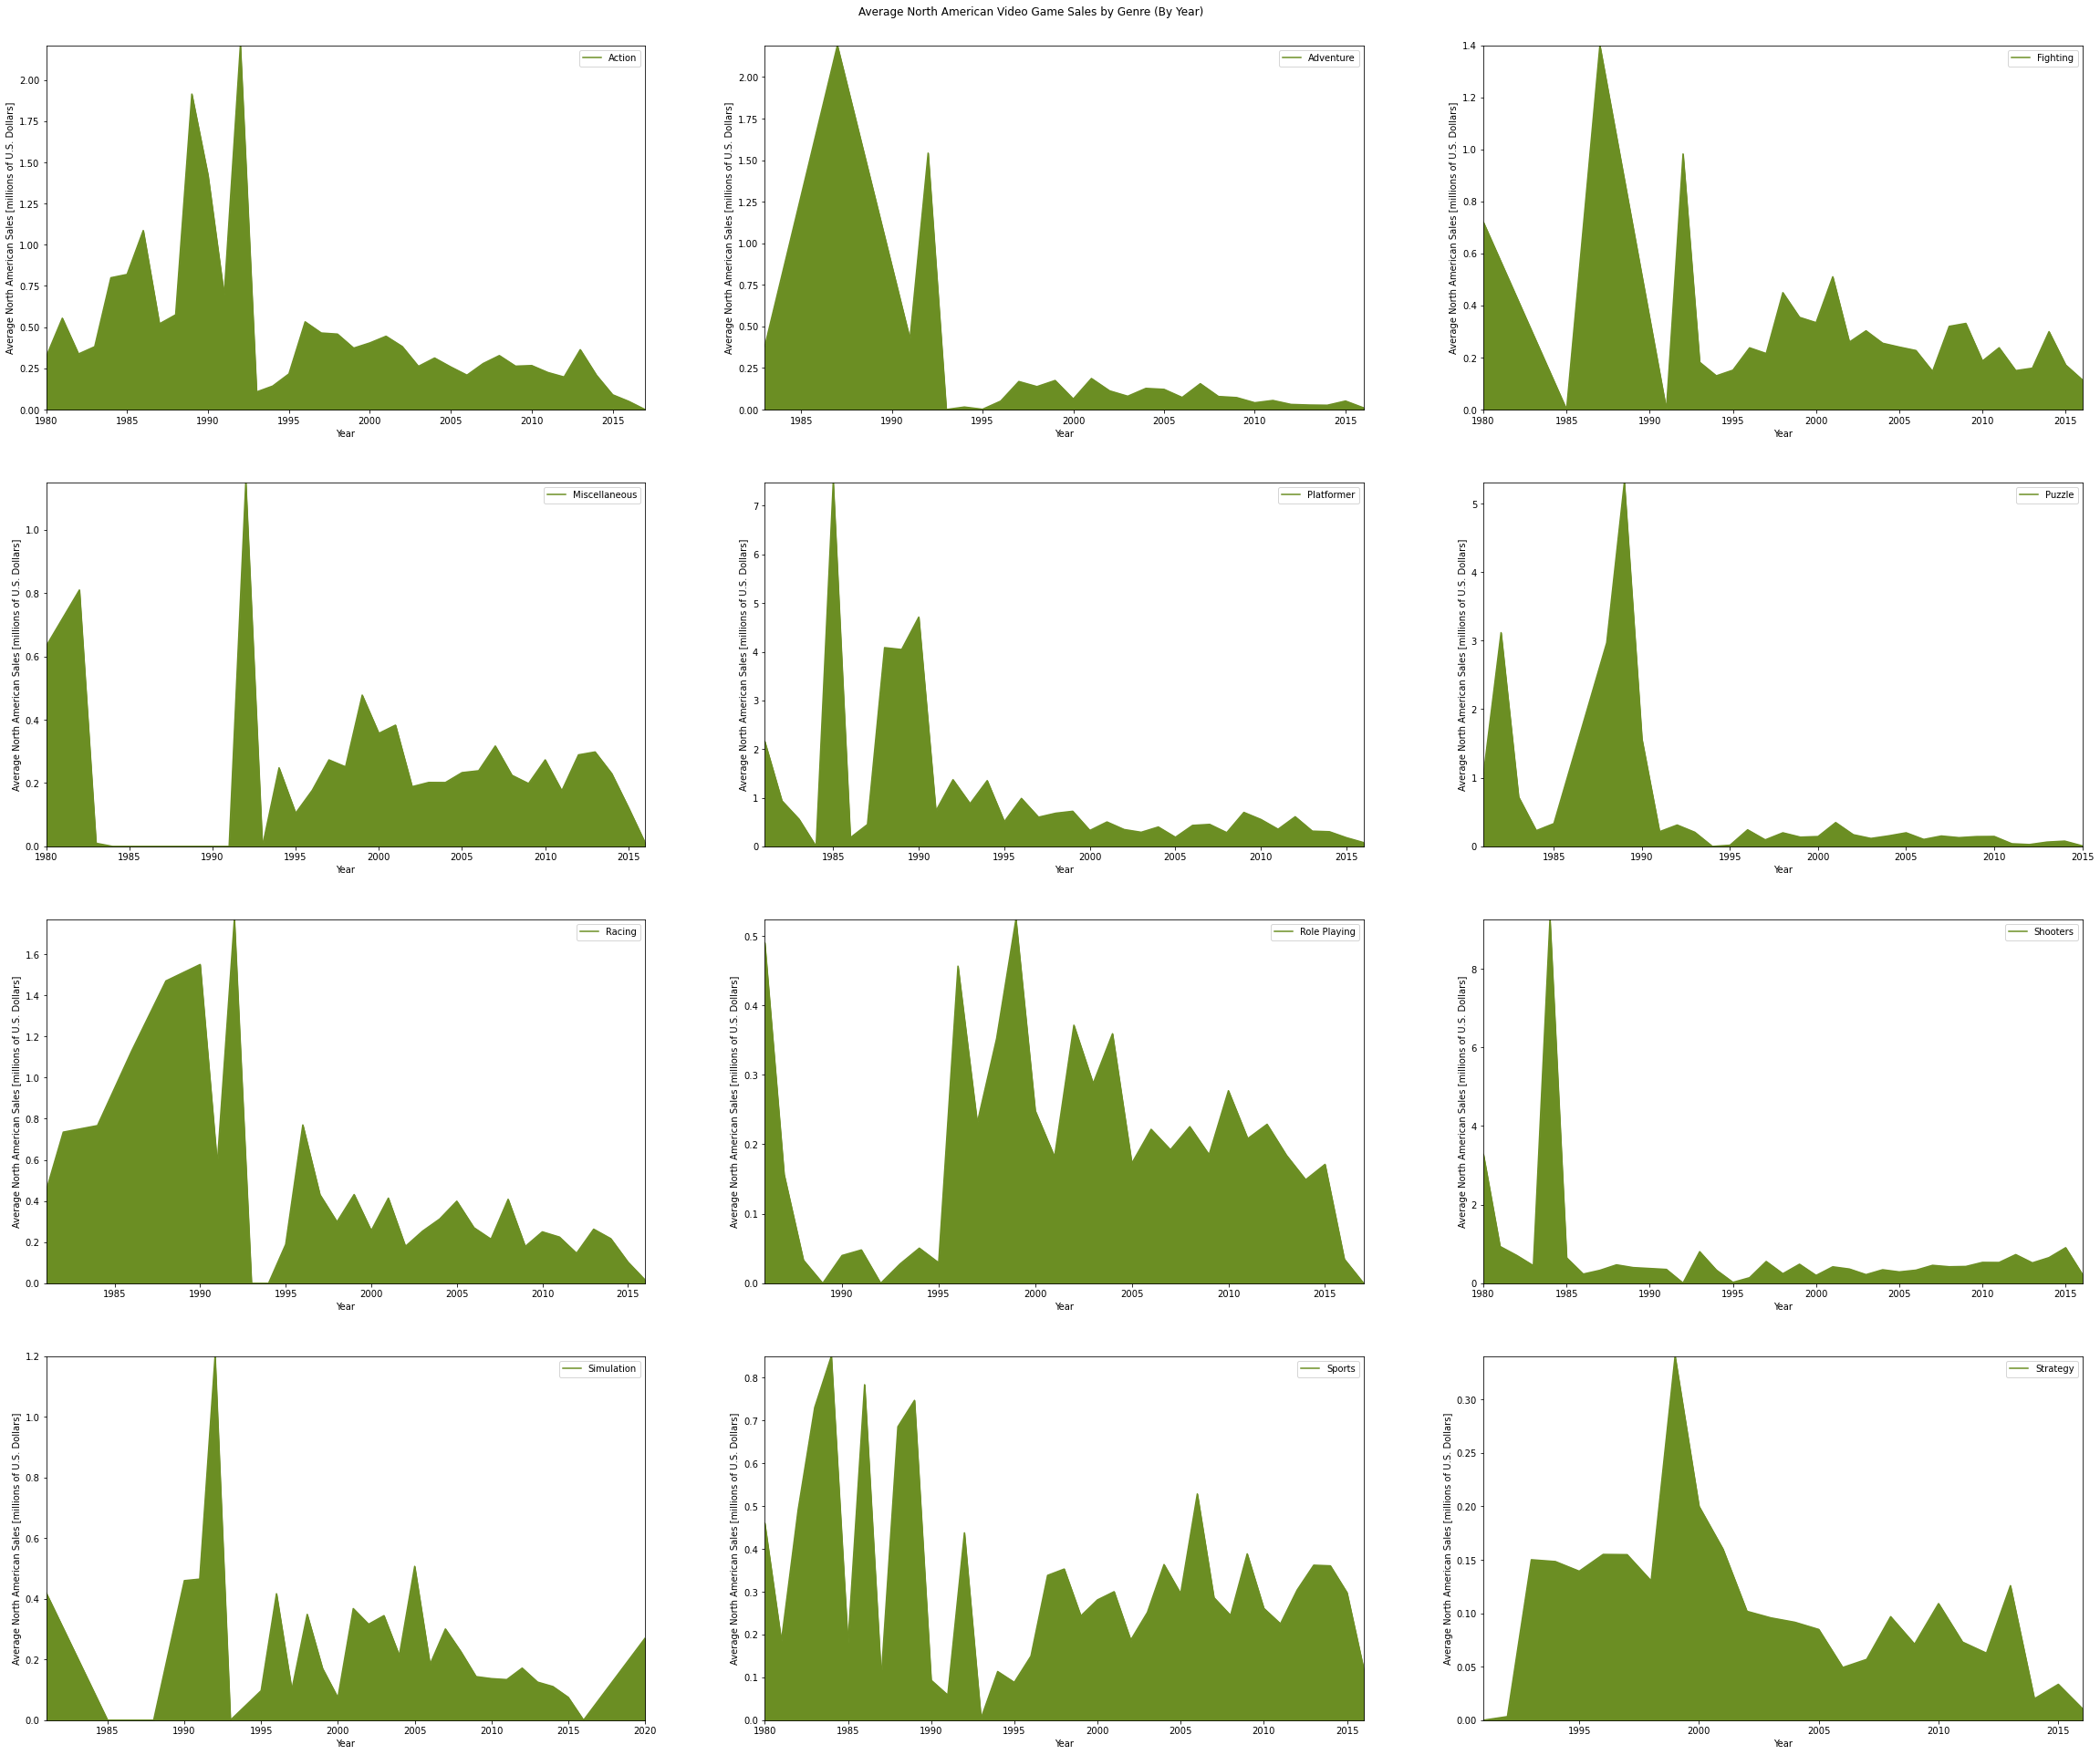

In [36]:
# Use the function plot_genre_sales_by_year_by_region to make a grid of plots of average North American sales per year 
# for each genre in the DataFrame.

plt.figure(figsize = (40,30))

# Plot average North American sales per year for action games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,1)
plot_genre_sales_by_year_by_region('Action', 'North American', 'Average')
plt.legend(['Action'], loc = 'upper right')

# Plot average North American sales per year for adventure games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,2)
plot_genre_sales_by_year_by_region('Adventure', 'North American', 'Average')
plt.legend(['Adventure'], loc = 'upper right')

# Plot average North American sales per year for fighting games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,3)
plot_genre_sales_by_year_by_region('Fighting', 'North American', 'Average')
plt.legend(['Fighting'], loc = 'upper right')

# Plot average North American sales per year for miscellaneous games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,4)
plot_genre_sales_by_year_by_region('Misc', 'North American', 'Average')
plt.legend(['Miscellaneous'], loc = 'upper right')

# Plot average North American sales per year for platformer games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,5)
plot_genre_sales_by_year_by_region('Platform', 'North American', 'Average')
plt.legend(['Platformer'], loc = 'upper right')

# Plot average North American sales per year for puzzle games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,6)
plot_genre_sales_by_year_by_region('Puzzle', 'North American', 'Average')
plt.legend(['Puzzle'], loc = 'upper right')

# Plot average North American sales per year for racing games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,7)
plot_genre_sales_by_year_by_region('Racing', 'North American', 'Average')
plt.legend(['Racing'], loc = 'upper right')

# Plot average North American sales per year for role-playing games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,8)
plot_genre_sales_by_year_by_region('Role-Playing', 'North American', 'Average')
plt.legend(['Role Playing'], loc = 'upper right')

# Plot average North American sales per year for firt-person shooter games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,9)
plot_genre_sales_by_year_by_region('Shooter', 'North American', 'Average')
plt.legend(['Shooters'], loc = 'upper right')

# Plot average North American sales per year for simulation games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,10)
plot_genre_sales_by_year_by_region('Simulation', 'North American', 'Average')
plt.legend(['Simulation'], loc = 'upper right')

# Plot average North American sales per year for sports games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,11)
plot_genre_sales_by_year_by_region('Sports', 'North American', 'Average')
plt.legend(['Sports'], loc = 'upper right')

# Plot average North American sales per year for strategy games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,12)
plot_genre_sales_by_year_by_region('Strategy', 'North American', 'Average')
plt.legend(['Strategy'], loc = 'upper right')

# add an appropriate title, and make sure there's an appropriate amount of space between subplots:
plt.suptitle('Average North American Video Game Sales by Genre (By Year)', x = 0.5, y = 0.92)
plt.subplots_adjust(top = 0.9, bottom = 0.05)
# print plot to file:
plt.savefig('average_NA_sales_per_year_all_genres.png')

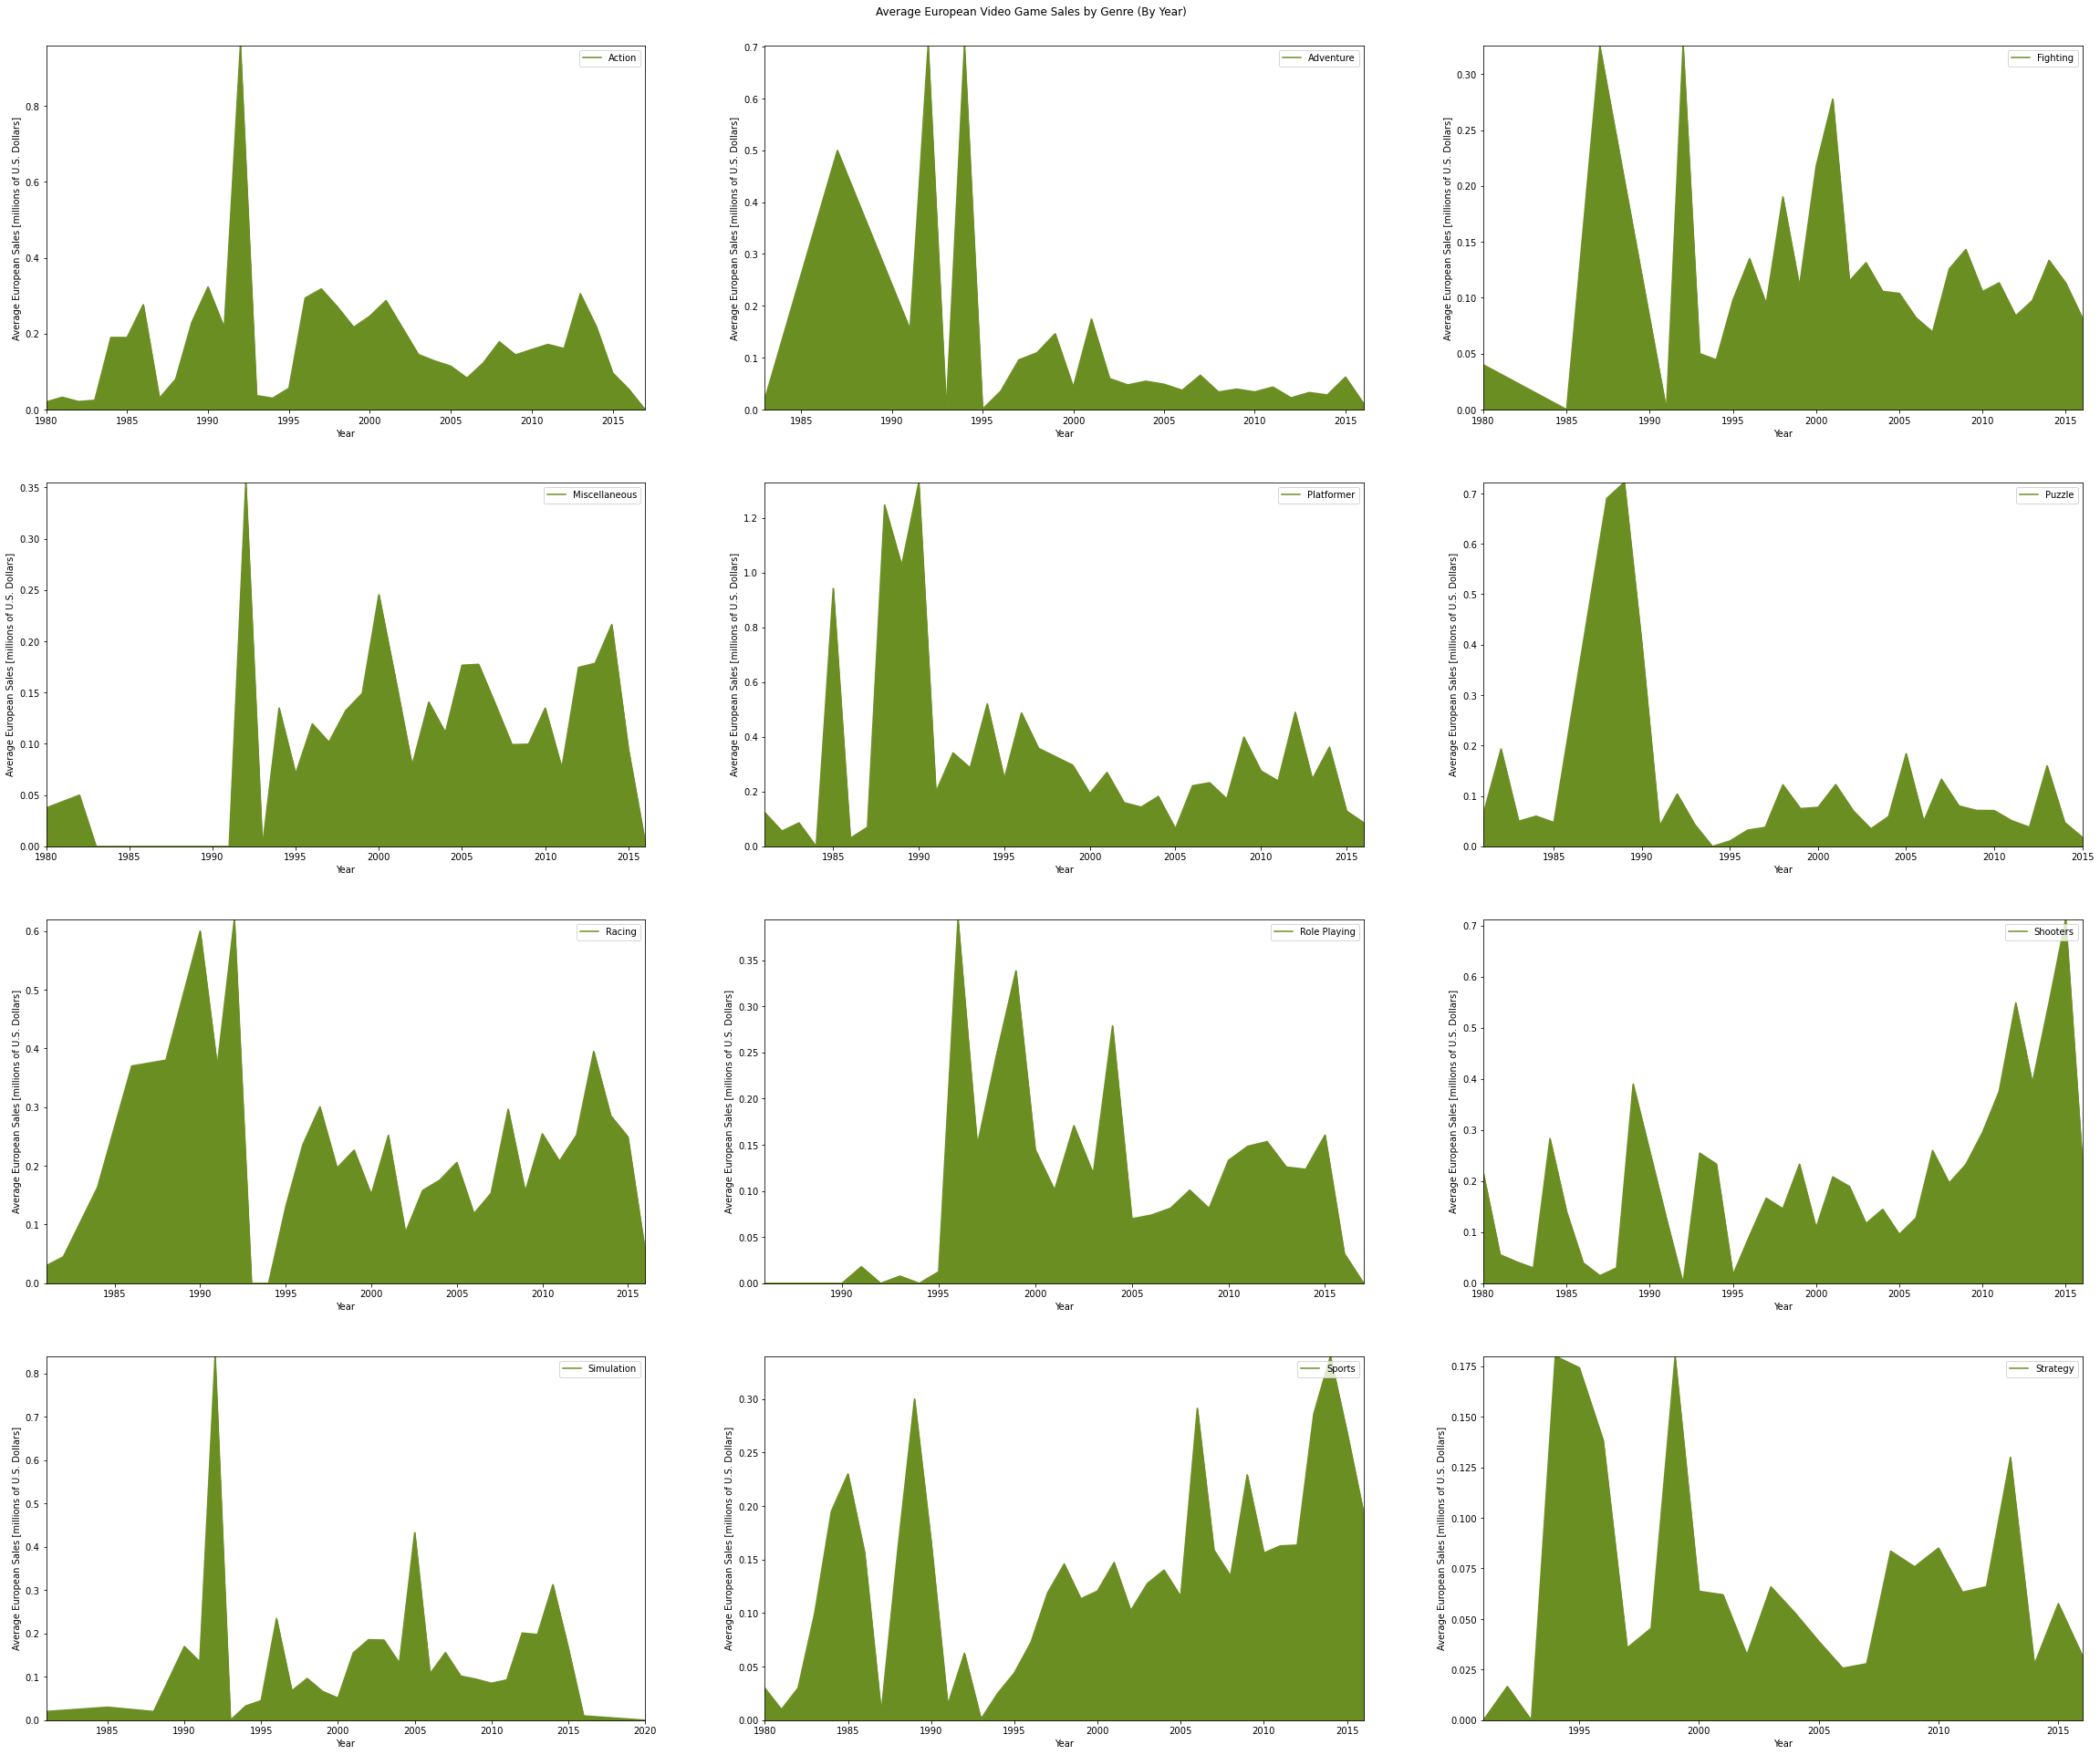

In [37]:
# Use the function plot_genre_sales_by_year_by_region to make a grid of plots of average European sales per year 
# for each genre in the DataFrame.

plt.figure(figsize = (40,30))

# Plot average European sales per year for action games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,1)
plot_genre_sales_by_year_by_region('Action', 'European', 'Average')
plt.legend(['Action'], loc = 'upper right')

# Plot average European sales per year for adventure games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,2)
plot_genre_sales_by_year_by_region('Adventure', 'European', 'Average')
plt.legend(['Adventure'], loc = 'upper right')

# Plot average European sales per year for fighting games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,3)
plot_genre_sales_by_year_by_region('Fighting', 'European', 'Average')
plt.legend(['Fighting'], loc = 'upper right')

# Plot average European sales per year for miscellaneous games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,4)
plot_genre_sales_by_year_by_region('Misc', 'European', 'Average')
plt.legend(['Miscellaneous'], loc = 'upper right')

# Plot average European sales per year for platformer games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,5)
plot_genre_sales_by_year_by_region('Platform', 'European', 'Average')
plt.legend(['Platformer'], loc = 'upper right')

# Plot average European sales per year for puzzle games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,6)
plot_genre_sales_by_year_by_region('Puzzle', 'European', 'Average')
plt.legend(['Puzzle'], loc = 'upper right')

# Plot average European sales per year for racing games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,7)
plot_genre_sales_by_year_by_region('Racing', 'European', 'Average')
plt.legend(['Racing'], loc = 'upper right')

# Plot average European sales per year for role-playing games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,8)
plot_genre_sales_by_year_by_region('Role-Playing', 'European', 'Average')
plt.legend(['Role Playing'], loc = 'upper right')

# Plot average European sales per year for firt-person shooter games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,9)
plot_genre_sales_by_year_by_region('Shooter', 'European', 'Average')
plt.legend(['Shooters'], loc = 'upper right')

# Plot average European sales per year for simulation games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,10)
plot_genre_sales_by_year_by_region('Simulation', 'European', 'Average')
plt.legend(['Simulation'], loc = 'upper right')

# Plot average European sales per year for sports games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,11)
plot_genre_sales_by_year_by_region('Sports', 'European', 'Average')
plt.legend(['Sports'], loc = 'upper right')

# Plot average European sales per year for strategy games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,12)
plot_genre_sales_by_year_by_region('Strategy', 'European', 'Average')
plt.legend(['Strategy'], loc = 'upper right')

# add an appropriate title, and make sure there's an appropriate amount of space between subplots:
plt.suptitle('Average European Video Game Sales by Genre (By Year)', x = 0.5, y = 0.92)
plt.subplots_adjust(top = 0.9, bottom = 0.05)
# print plot to file:
plt.savefig('average_EU_sales_per_year_all_genres.png')

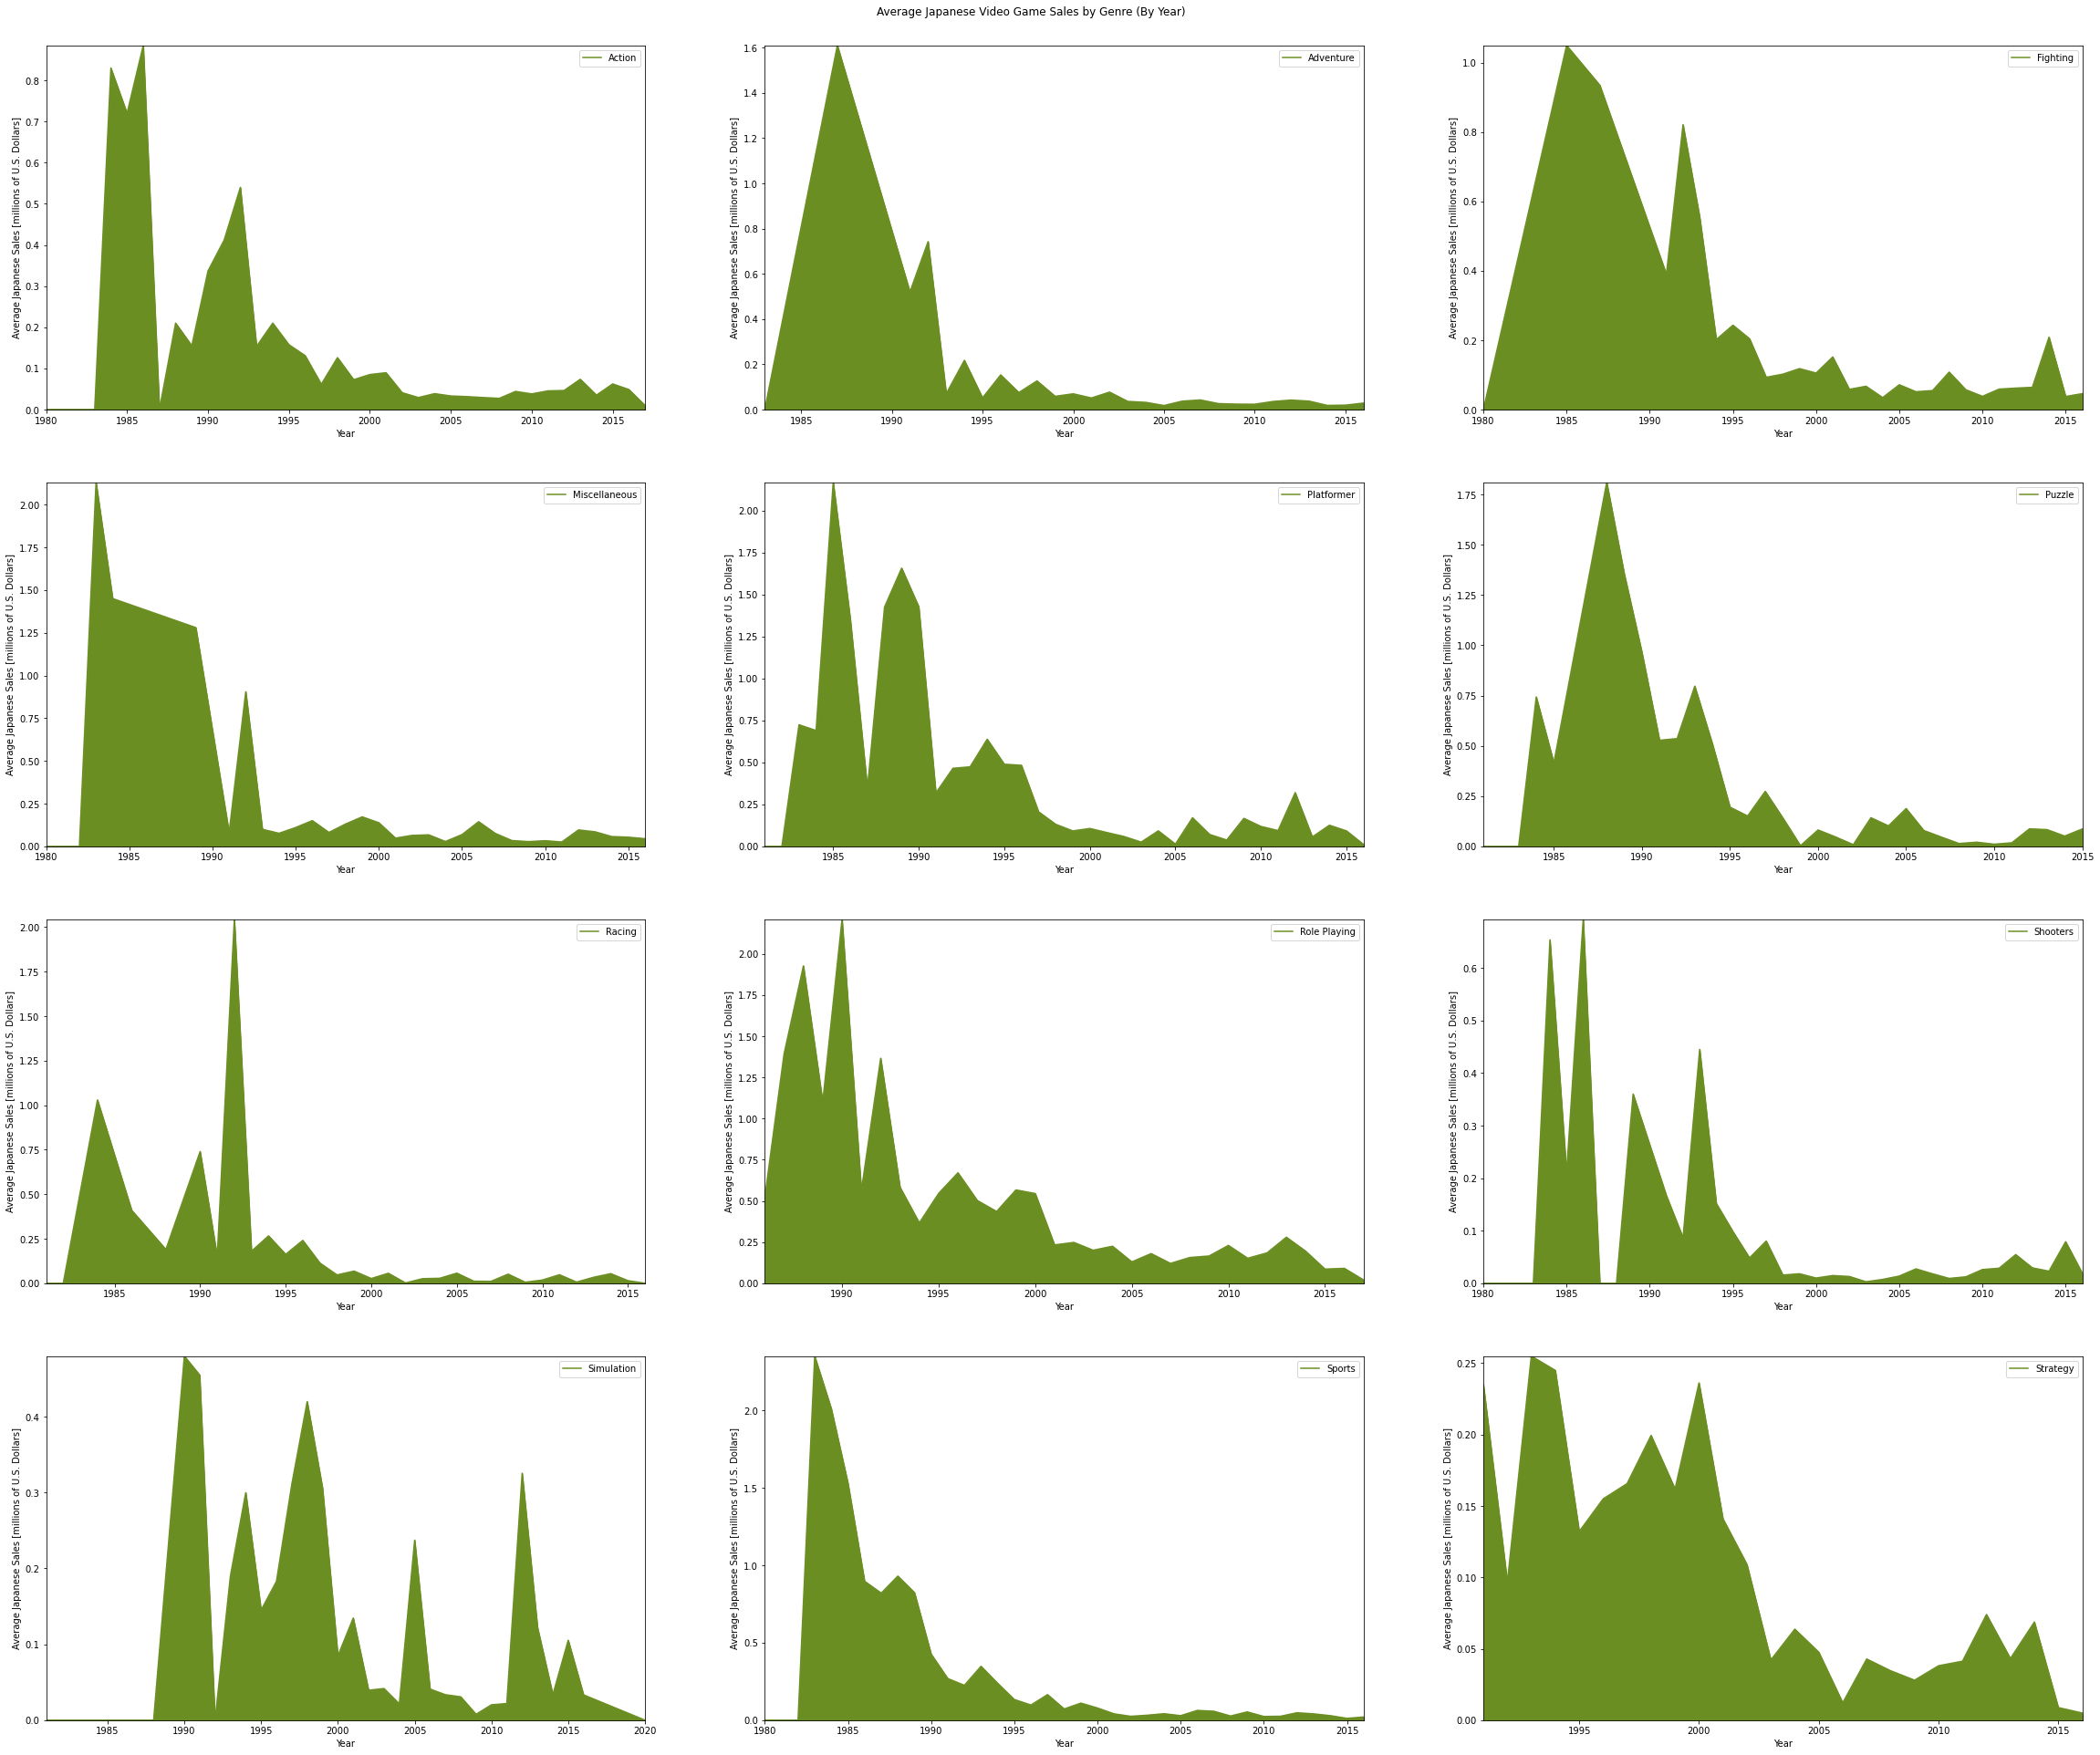

In [38]:
# Use the function plot_genre_sales_by_year_by_region to make a grid of plots of average Japanese sales per year 
# for each genre in the DataFrame.

plt.figure(figsize = (40,30))

# Plot average Japanese sales per year for action games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,1)
plot_genre_sales_by_year_by_region('Action', 'Japanese', 'Average')
plt.legend(['Action'], loc = 'upper right')

# Plot average Japanese sales per year for adventure games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,2)
plot_genre_sales_by_year_by_region('Adventure', 'Japanese', 'Average')
plt.legend(['Adventure'], loc = 'upper right')

# Plot average Japanese sales per year for fighting games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,3)
plot_genre_sales_by_year_by_region('Fighting', 'Japanese', 'Average')
plt.legend(['Fighting'], loc = 'upper right')

# Plot average Japanese sales per year for miscellaneous games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,4)
plot_genre_sales_by_year_by_region('Misc', 'Japanese', 'Average')
plt.legend(['Miscellaneous'], loc = 'upper right')

# Plot average Japanese sales per year for platformer games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,5)
plot_genre_sales_by_year_by_region('Platform', 'Japanese', 'Average')
plt.legend(['Platformer'], loc = 'upper right')

# Plot average Japanese sales per year for puzzle games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,6)
plot_genre_sales_by_year_by_region('Puzzle', 'Japanese', 'Average')
plt.legend(['Puzzle'], loc = 'upper right')

# Plot average Japanese sales per year for racing games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,7)
plot_genre_sales_by_year_by_region('Racing', 'Japanese', 'Average')
plt.legend(['Racing'], loc = 'upper right')

# Plot average Japanese sales per year for role-playing games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,8)
plot_genre_sales_by_year_by_region('Role-Playing', 'Japanese', 'Average')
plt.legend(['Role Playing'], loc = 'upper right')

# Plot average Japanese sales per year for firt-person shooter games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,9)
plot_genre_sales_by_year_by_region('Shooter', 'Japanese', 'Average')
plt.legend(['Shooters'], loc = 'upper right')

# Plot average Japanese sales per year for simulation games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,10)
plot_genre_sales_by_year_by_region('Simulation', 'Japanese', 'Average')
plt.legend(['Simulation'], loc = 'upper right')

# Plot average Japanese sales per year for sports games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,11)
plot_genre_sales_by_year_by_region('Sports', 'Japanese', 'Average')
plt.legend(['Sports'], loc = 'upper right')

# Plot average Japanese sales per year for strategy games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,12)
plot_genre_sales_by_year_by_region('Strategy', 'Japanese', 'Average')
plt.legend(['Strategy'], loc = 'upper right')

# add an appropriate title, and make sure there's an appropriate amount of space between subplots:
plt.suptitle('Average Japanese Video Game Sales by Genre (By Year)', x = 0.5, y = 0.92)

plt.subplots_adjust(top = 0.9, bottom = 0.05)
# print plot to file:
plt.savefig('average_JP_sales_per_year_all_genres.png')

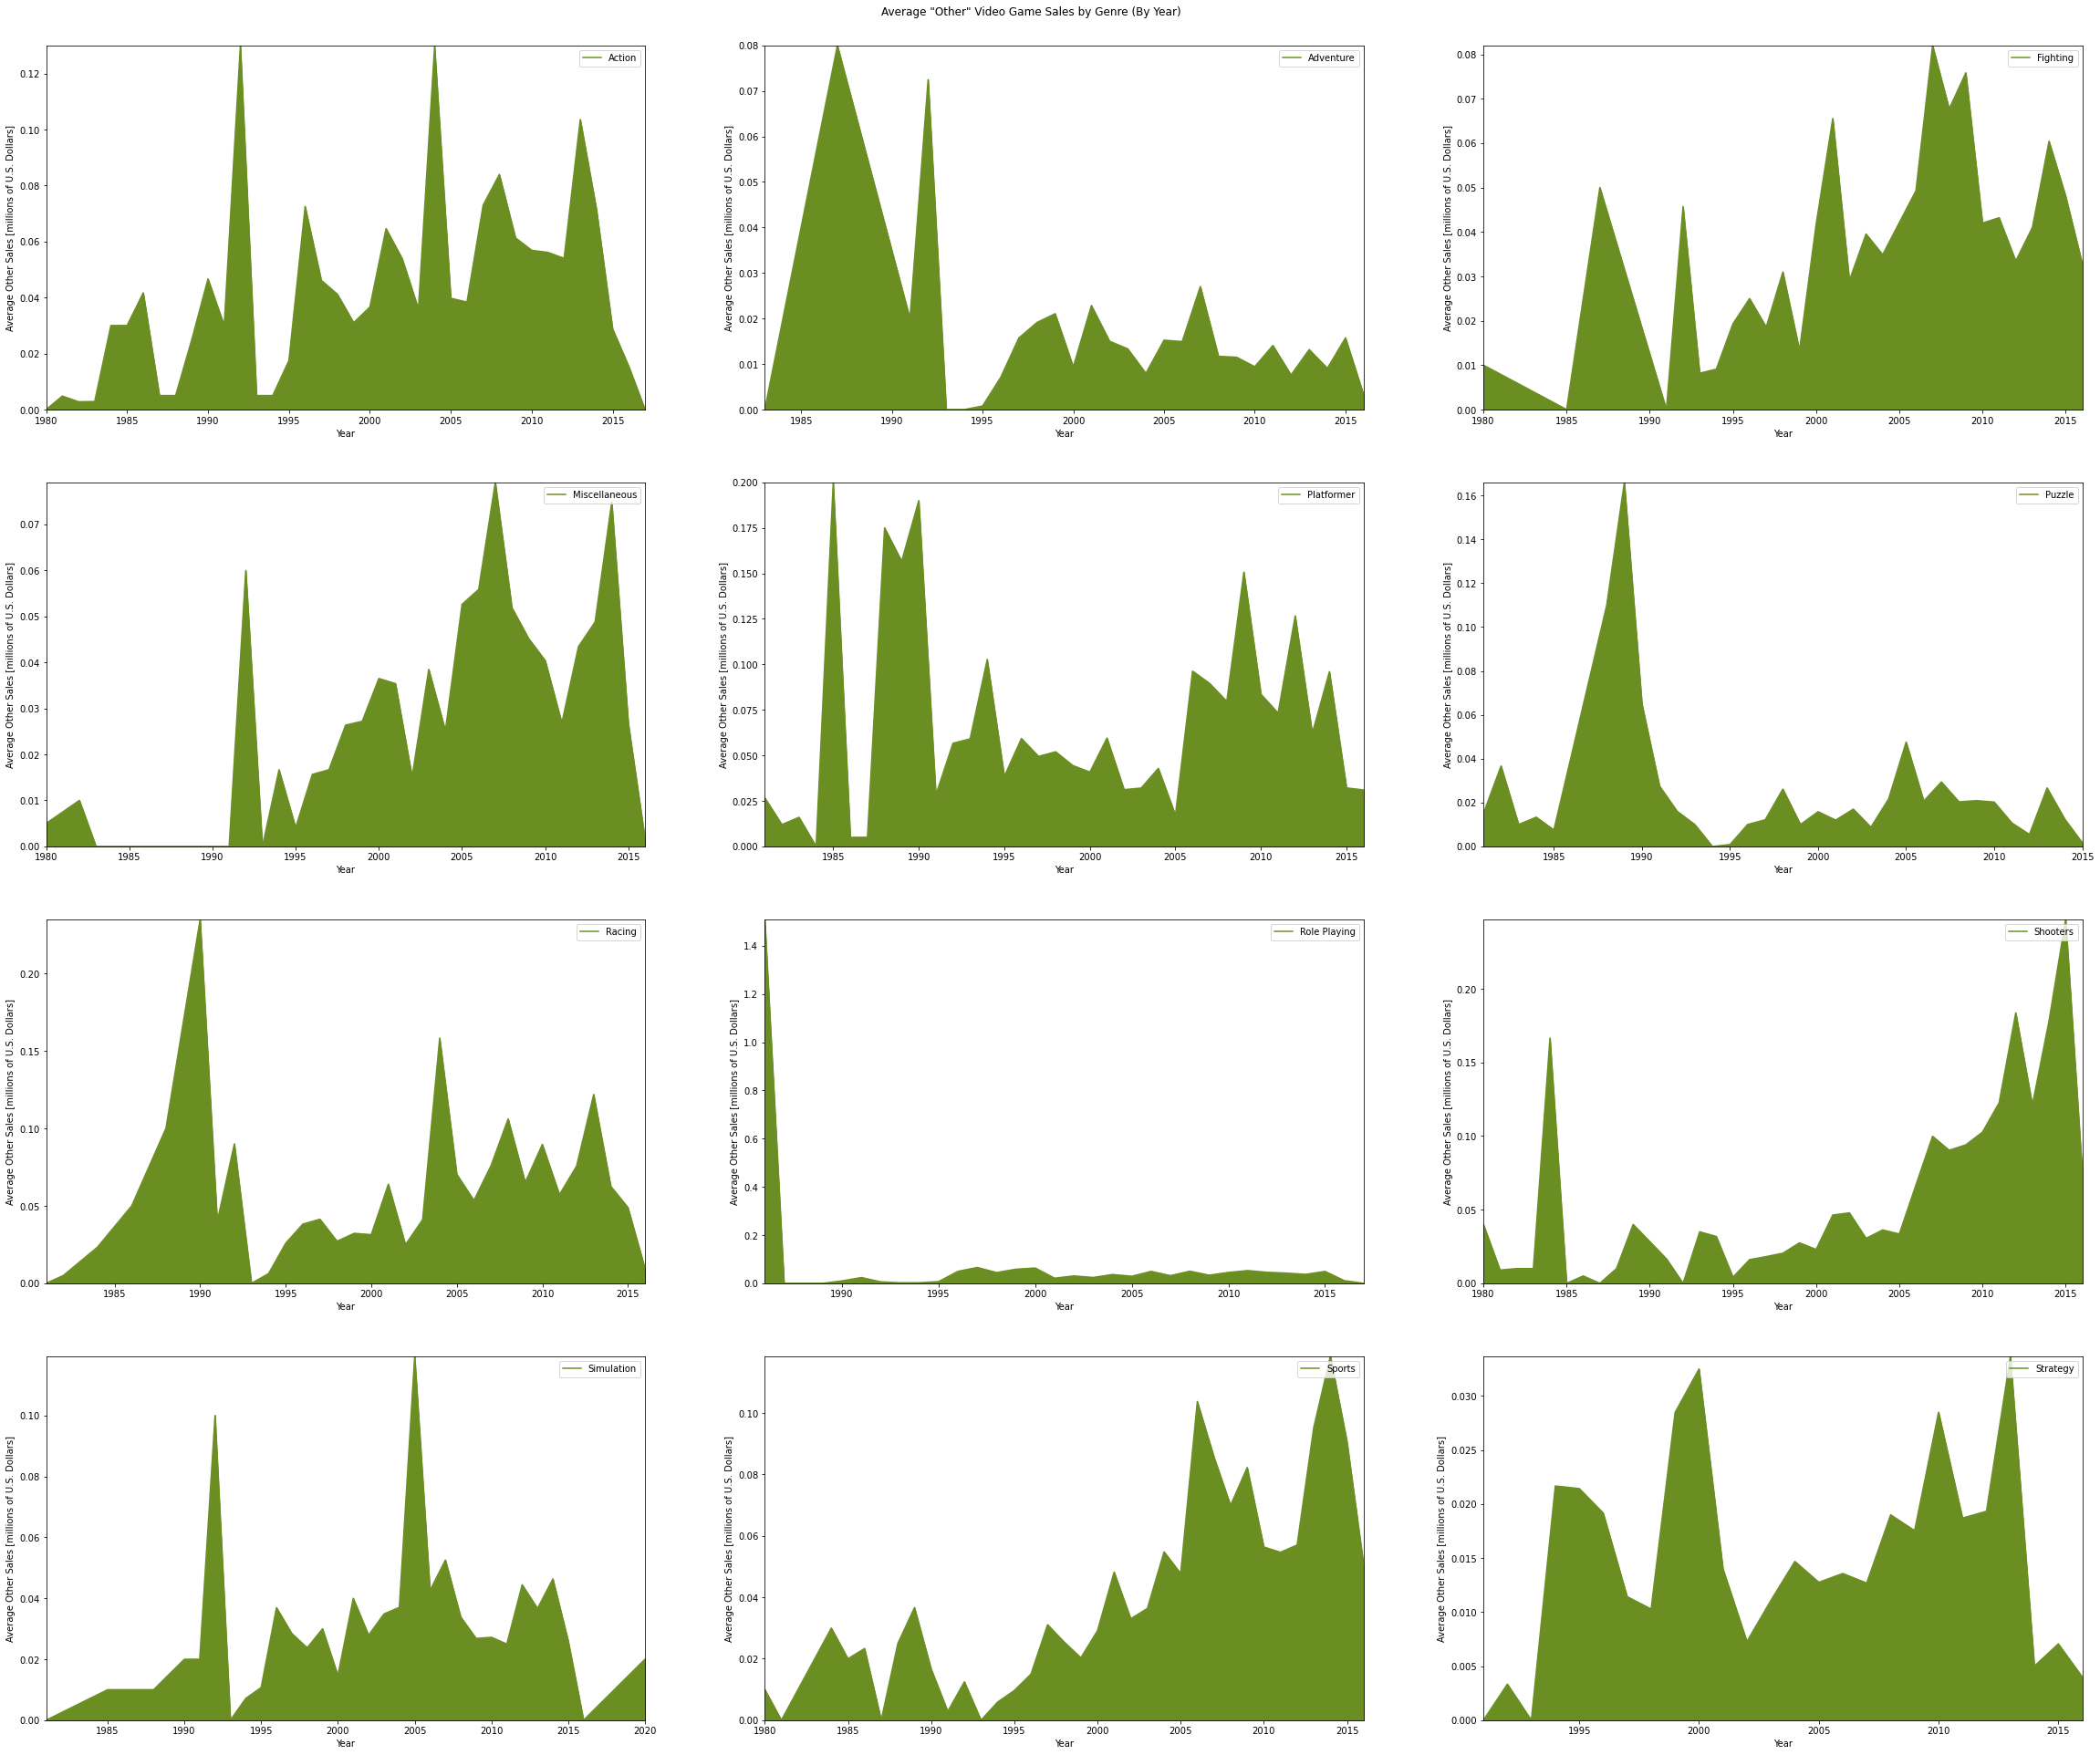

In [39]:
# Use the function plot_genre_sales_by_year_by_region to make a grid of plots of average "Other" sales per year 
# for each genre in the DataFrame.

plt.figure(figsize = (40,30))

# Plot average "Other" sales per year for action games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,1)
plot_genre_sales_by_year_by_region('Action', 'Other', 'Average')
plt.legend(['Action'], loc = 'upper right')

# Plot average "Other" sales per year for adventure games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,2)
plot_genre_sales_by_year_by_region('Adventure', 'Other', 'Average')
plt.legend(['Adventure'], loc = 'upper right')

# Plot average "Other" sales per year for fighting games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,3)
plot_genre_sales_by_year_by_region('Fighting', 'Other', 'Average')
plt.legend(['Fighting'], loc = 'upper right')

# Plot average "Other" sales per year for miscellaneous games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,4)
plot_genre_sales_by_year_by_region('Misc', 'Other', 'Average')
plt.legend(['Miscellaneous'], loc = 'upper right')

# Plot average "Other" sales per year for platformer games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,5)
plot_genre_sales_by_year_by_region('Platform', 'Other', 'Average')
plt.legend(['Platformer'], loc = 'upper right')

# Plot average "Other" sales per year for puzzle games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,6)
plot_genre_sales_by_year_by_region('Puzzle', 'Other', 'Average')
plt.legend(['Puzzle'], loc = 'upper right')

# Plot average "Other" sales per year for racing games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,7)
plot_genre_sales_by_year_by_region('Racing', 'Other', 'Average')
plt.legend(['Racing'], loc = 'upper right')

# Plot average "Other" sales per year for role-playing games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,8)
plot_genre_sales_by_year_by_region('Role-Playing', 'Other', 'Average')
plt.legend(['Role Playing'], loc = 'upper right')

# Plot average "Other" sales per year for firt-person shooter games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,9)
plot_genre_sales_by_year_by_region('Shooter', 'Other', 'Average')
plt.legend(['Shooters'], loc = 'upper right')

# Plot average "Other" sales per year for simulation games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,10)
plot_genre_sales_by_year_by_region('Simulation', 'Other', 'Average')
plt.legend(['Simulation'], loc = 'upper right')

# Plot average "Other" sales per year for sports games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,11)
plot_genre_sales_by_year_by_region('Sports', 'Other', 'Average')
plt.legend(['Sports'], loc = 'upper right')

# Plot average "Other" sales per year for strategy games,
# adding a legend to the plot to label the data appropriately:
plt.subplot(4,3,12)
plot_genre_sales_by_year_by_region('Strategy', 'Other', 'Average')
plt.legend(['Strategy'], loc = 'upper right')

# add an appropriate title, and make sure there's an appropriate amount of space between subplots:
plt.suptitle('Average "Other" Video Game Sales by Genre (By Year)', x = 0.5, y = 0.92)

plt.subplots_adjust(top = 0.9, bottom = 0.05)
# print plot to file:
plt.savefig('average_Other_sales_per_year_all_genres.png')

# Get Average Sales for Games of a Particular Genre on a Particular Platform for a Particular Region Over Some Desired Time Period

In [40]:
# Ultimately, I think the best way to predict how a particular game will sell is to look at the average sales of 
# games of the same genre on the platform the game will be released on, with the average being calculated
# over an appropriate time interval. The function below calculates that average given a starting year for the time
# interval, an ending year for the time interval, the platform a game is/will be released on, and the game's genre.
# You can specify a particular region as well, though the default region is "global."

def get_avg_sales_platform_genre(startyear, endyear, platform, genre, region = 'Global'):
# Note that the default region is "global," but if you want to specify a different region you can do so with
# by specifying the region of interest with the region parameter.
    
    # pluck off the data which lies within the desired time interval:
    relevant_data = vg_sales_data[(vg_sales_data.Year >= startyear) & (vg_sales_data.Year <= endyear)]
    
    if region == 'Global':
        # group the data by genre and platform, and determine the average global sales:
        region_avg_by_genre_by_platform = relevant_data.groupby(['Genre','Platform']).\
                                            Global_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later: 
        region_avg_by_genre_by_platform.rename(columns = {'Global_Sales': 'Avg. Sales'}, inplace = True)
    if region == 'North American':
        # group the data by genre and platform, and determine the average North American sales:
        region_avg_by_genre_by_platform = relevant_data.groupby(['Genre','Platform']).\
                                            NA_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        region_avg_by_genre_by_platform.rename(columns = {'NA_Sales': 'Avg. Sales'}, inplace = True)
    if region == 'European':
        # group the data by genre and platform, and determine the average European sales:
        region_avg_by_genre_by_platform = relevant_data.groupby(['Genre','Platform']).\
                                            EU_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        region_avg_by_genre_by_platform.rename(columns = {'EU_Sales': 'Avg. Sales'}, inplace = True)
    if region == 'Japanese':
        # group the data by genre and platform, and determine the average Japanese sales:
        region_total_by_genre_by_platform = relevant_data.groupby(['Genre','Platform']).\
                                            JP_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        region_avg_by_genre_by_platform.rename(columns = {'JP_Sales': 'Avg. Sales'}, inplace = True)
    if region == 'Other':
        # group the data by genre and platform, and determine the average "Other" sales:
        region_avg_by_genre_by_platform = relevant_data.groupby(['Genre','Platform']).\
                                            Other_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        region_avg_by_genre_by_platform.rename(columns = {'Other_Sales': 'Avg. Sales'}, inplace = True)
        
    # select only those data corresponding to the desired genre and gaming platform:    
    theaverage = region_avg_by_genre_by_platform[(region_avg_by_genre_by_platform.Genre == genre) & \
                                                 (region_avg_by_genre_by_platform.Platform == platform)]
    
    # return the resulting DataFrame:
    return(theaverage)

In [41]:
# Perform a test of the function get_avg_sales_platform_genre to make sure it gives the correct answer for a
# subset of the data for which the global average is known. From the exported pivot tables I construct below:
# In 2020 the only global average value was for a DS simulation game by Ubisoft; that average sale value was 
# 0.29 million U.S. Dollars.

avg_sales_number = get_avg_sales_platform_genre(2019,2021,'DS','Simulation')
print(avg_sales_number)
print('')

# As seen in the output cell below, the function yielded the correct answer. 
# Thus, it has at least passed one (albiet simple) test.

# Having briefly tested the function, investigate North American sales for various genres of PS4 games:
# First look at the average sales of first-person games released on the PS4 platform from 2013 through 2018:
avg_sales_number = get_avg_sales_platform_genre(2013,2018,'PS4','Shooter', 'North American')
print(avg_sales_number)
print('')

# Next look at the average sales of action shooter games released on the PS4 platform 
# from 2013 through 2018:
avg_sales_number = get_avg_sales_platform_genre(2013,2018,'PS4','Action', 'North American')
print(avg_sales_number)
print('')

# Next look at the average sales of sports games released on the PS4 platform 
# from 2013 through 2018:
avg_sales_number = get_avg_sales_platform_genre(2013,2018,'PS4','Sports', 'North American')
print(avg_sales_number)
print('')

# Next look at the average sales of fighting games released on the PS4 platform 
# from 2013 through 2018:
avg_sales_number = get_avg_sales_platform_genre(2013,2018,'PS4','Fighting', 'North American')
print(avg_sales_number)
print('')

# Next look at the average sales of role-playing games released on the PS4 platform 
# from 2013 through 2018:
avg_sales_number = get_avg_sales_platform_genre(2013,2018,'PS4','Role-Playing', 'North American')
print(avg_sales_number)
print('')

# Next look at the average sales of miscellaneous games released on the PS4 platform 
# from 2013 through 2018:
avg_sales_number = get_avg_sales_platform_genre(2013,2018,'PS4','Misc', 'North American')
print(avg_sales_number)
print('')

# And just for fun, look at the global average sales of puzzle games released on the NES platform over its
# nominal lifespan of 1980--1994:
avg_sales_number = get_avg_sales_platform_genre(1980,1994,'NES','Puzzle')
print(avg_sales_number)
print('')

        Genre Platform  Avg. Sales
0  Simulation       DS        0.29

      Genre Platform  Avg. Sales
76  Shooter      PS4    0.824118

    Genre Platform  Avg. Sales
4  Action      PS4    0.243443

     Genre Platform  Avg. Sales
95  Sports      PS4    0.423953

       Genre Platform  Avg. Sales
25  Fighting      PS4         0.2

           Genre Platform  Avg. Sales
67  Role-Playing      PS4    0.175745

   Genre Platform  Avg. Sales
35  Misc      PS4    0.188667

     Genre Platform  Avg. Sales
40  Puzzle      NES         1.5



# Top Five Best-Selling Games (Total Sales)

In [42]:
# Which five games in a particular year, in a specified region, had the highest total sales? 
# The below funcion was written to determine this.

def top_five_games(year,region):
    # since year is stored as a float in the vg_sales_data DataFrame, convert the year provided by the
    # user to a float if it wasn't already entered as a float:
    thisyear = float(year)
    # select games released during the specified year
    thisyearsgames = vg_sales_data[vg_sales_data.Year == thisyear]
    # given the desired region, sort the resulting total sales values in order from largest to smallest:
    thisyearsgames = thisyearsgames.sort_values(by = region, ascending = False)
    # return the resulting DataFrame:
    return thisyearsgames[0:5]

In [43]:
# Given a gaming platform of interest, which five of its games in a particular year, in a specified region, 
# had the highest total sales? The below funcion was written to determine this.

def top_five_games_platform(year,region,platform):
    # since year is stored as a float in the vg_sales_data DataFrame, convert the year provided by the
    # user to a float if it wasn't already entered as a float:
    thisyear = float(year)
    # select games released during the specified year for the specified platform:
    thisyearsgames = vg_sales_data[(vg_sales_data.Year == thisyear) & (vg_sales_data.Platform == platform)]
    # given the desired region, sort the resulting total sales values in order from largest to smallest:
    thisyearsgames = thisyearsgames.sort_values(by = region, ascending = False)
    # return the resulting DataFrame:
    return thisyearsgames[0:5]

In [44]:
# There was a big spike in puzzle game sales in North American in 1989. What was the name of the best-selling 
# puzzle game that year?
top_5_games_1989 = top_five_games(1989,'NA_Sales')
print(top_5_games_1989.Name)

5                            Tetris
21                 Super Mario Land
276    Teenage Mutant Ninja Turtles
170                       Dr. Mario
880                        Alleyway
Name: Name, dtype: object


In [ ]:
# Ah, of course: Tetris! I remember it being a very popular game during my elementary school years.

In [45]:
# 1980 is the first year for which there is sales data in the DataFrame. In terms of global sales, what
# were the five best-selling games that year?
top_5_games_1980 = top_five_games(1980,'Global_Sales')
print(top_5_games_1980.Name)

258           Asteroids
544     Missile Command
1766            Kaboom!
1969           Defender
2669             Boxing
Name: Name, dtype: object


In [ ]:
# If I recall correctly, most of these are Atari games, which makes sense as the Atari 2600 was the most popular
# at-home gaming platform at that time.

In [46]:
# Looking more recently, what were the top five best-selling games in 2016 in terms of total global sales? 
# (2016 is the most recent year for which full data seems to be available in the DataFrame.)
top_5_games_2016 = top_five_games(2016,'Global_Sales')
print(top_5_games_2016.Name)

221                       FIFA 17
271    Uncharted 4: A Thief's End
351     Tom Clancy's The Division
770               Far Cry: Primal
845     Tom Clancy's The Division
Name: Name, dtype: object


In [ ]:
# Given how popular football (called soccer in the U.S.) is around the world, the fact that FIFA 17 is 
# the best-selling game of 2016 comes as no surprise whatsoever.

In [47]:
# What were the top five best-selling games (in terms of total sales) in each region?
top_5_games_2016_NA = top_five_games(2016,'NA_Sales')
print(top_5_games_2016_NA.Name)
print('')
top_5_games_2016_EU = top_five_games(2016,'EU_Sales')
print(top_5_games_2016_EU.Name)
print('')
top_5_games_2016_JP = top_five_games(2016,'JP_Sales')
print(top_5_games_2016_JP.Name)
print('')
top_5_games_2016_Other = top_five_games(2016,'Other_Sales')
print(top_5_games_2016_Other.Name)

271     Uncharted 4: A Thief's End
351      Tom Clancy's The Division
845      Tom Clancy's The Division
1628                 Madden NFL 17
1701                      NBA 2K17
Name: Name, dtype: object

221                        FIFA 17
271     Uncharted 4: A Thief's End
351      Tom Clancy's The Division
1224                       FIFA 17
770                Far Cry: Primal
Name: Name, dtype: object

1568                    Yokai Watch 3
3221    Dragon Quest Monsters Joker 3
3648                 Yokai Sangokushi
2448            Kirby: Planet Robobot
5426                        Persona 5
Name: Name, dtype: object

221                        FIFA 17
271     Uncharted 4: A Thief's End
351      Tom Clancy's The Division
770                Far Cry: Primal
1026                     Overwatch
Name: Name, dtype: object


In [48]:
# Looking at the PS4 platform in particular, what were its top five best-selling games in the year 2016 in 
# terms of total global sales?
top_5_ps4_games_2016 = top_five_games_platform(2016,'Global_Sales','PS4')
print(top_5_ps4_games_2016.Name)

221                        FIFA 17
271     Uncharted 4: A Thief's End
351      Tom Clancy's The Division
770                Far Cry: Primal
1026                     Overwatch
Name: Name, dtype: object


In [ ]:
# Again, the fact that FIFA 17 was the top-selling PS4 game in 2016 is no surprise. 

In [49]:
# It might be useful to know, for game development purposes, what the best-selling genres in a particular 
# region were for a particular year. The below function determines the top five best-selling games (in terms
# of total sales) of a specified genre in a specified year and region. 

def top_five_genres_by_region(year,region):
    
    # since year is stored as a float in the vg_sales_data DataFrame, convert the year provided by the
    # user to a float if it wasn't already entered as a float:
    thisyear = float(year)
    
    if region == 'Global':
        # group the data by genre and year, and determine the total global sales:
        region_total_by_genre_by_year = vg_sales_data.groupby(['Genre','Year']).\
                                        Global_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        region_total_by_genre_by_year.rename(columns = {'Global_Sales': 'Sales'}, inplace = True)
    if region == 'North American':
        # group the data by genre and year, and determine the total North American sales:
        region_total_by_genre_by_year = vg_sales_data.groupby(['Genre','Year']).\
                                        NA_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        region_total_by_genre_by_year.rename(columns = {'NA_Sales': 'Sales'}, inplace = True)
    if region == 'European':
        # group the data by genre and year, and determine the total European sales:
        region_total_by_genre_by_year = vg_sales_data.groupby(['Genre','Year']).\
                                        EU_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        region_total_by_genre_by_year.rename(columns = {'EU_Sales': 'Sales'}, inplace = True)
    if region == 'Japanese':
        # group the data by genre and year, and determine the total Japanese sales:
        region_total_by_genre_by_year = vg_sales_data.groupby(['Genre','Year']).\
                                        JP_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        region_total_by_genre_by_year.rename(columns = {'JP_Sales': 'Sales'}, inplace = True)
    if region == 'Other':
        # group the data by genre and year, and determine the total "Other" sales:
        region_total_by_genre_by_year = vg_sales_data.groupby(['Genre','Year']).\
                                        Other_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        region_total_by_genre_by_year.rename(columns = {'Other_Sales': 'Sales'}, inplace = True)
        
    # select only the desired year from the DataFrame:
    thisyearsgames = region_total_by_genre_by_year[region_total_by_genre_by_year.Year == thisyear]
    
    # sort the resulting total sales values in order from largest to smallest:
    thisyearsgames = thisyearsgames.sort_values(by = 'Sales', ascending = False)
    
    # return the resulting DataFrame:
    return thisyearsgames[0:5]

In [50]:
# What were the top five best-selling genres (in terms of total global sales) in 1980?

top_5_genres_global_1980 = top_five_genres_by_region(1980,'Global')
print(top_5_genres_global_1980.Genre)

259     Shooter
95         Misc
66     Fighting
326      Sports
0        Action
Name: Genre, dtype: object


In [51]:
# What were the top five best-selling genres (in terms of total sales) in North America in 2016?

top_5_genres_north_america_2016 = top_five_genres_by_region(2016,'North American')
print(top_5_genres_north_america_2016.Genre)

294         Shooter
36           Action
362          Sports
94         Fighting
257    Role-Playing
Name: Genre, dtype: object


In [52]:
# What were the top five best-selling genres (in terms of total sales) in Europe in 2016?

top_5_genres_europe_2016 = top_five_genres_by_region(2016,'European')
print(top_5_genres_europe_2016.Genre)

294         Shooter
362          Sports
36           Action
257    Role-Playing
94         Fighting
Name: Genre, dtype: object


In [53]:
# What were the top five best-selling genres (in terms of total sales) in Japan in 2016?

top_5_genres_japan_2016 = top_five_genres_by_region(2016,'Japanese')
print(top_5_genres_japan_2016.Genre)

36           Action
257    Role-Playing
65        Adventure
125            Misc
362          Sports
Name: Genre, dtype: object


In [54]:
# What were the top five best-selling genres (in terms of total sales) in the "Other" region in 2016?

top_5_genres_other_2016 = top_five_genres_by_region(2016,'Other')
print(top_5_genres_other_2016.Genre)

294         Shooter
362          Sports
36           Action
94         Fighting
257    Role-Playing
Name: Genre, dtype: object


In [55]:
# When developing a game, it might be useful to know long- and/or short-term trends in the total sales of 
# the various genres of games. In particular, how many times does a particular game genre end up in the 
# list of top 5 best-selling games (in terms of total sales) a year over some particular timeframe? The
# below function attempts to answer this question.

def top_five_by_region_over_time(startyear, endyear, region):
    
    # define some empty lists to hold information about the top five genres in terms of total sales 
    # in a particular region, and the year(s) in which those genres landed in the top five:
    yearlist = []
    genrelist = []
    saleslist = []
    
    if region == 'Global':
        # loop over years in the specified time frame to find the five best-selling genres each year:
        for i in range(startyear,endyear+1):
            thesetopfive = top_five_genres_by_region(i,region)
            for j in range(0,5):
                # add each best-selling genre to the list of best-selling genres, as well as the 
                # year that genre made the best-selling list and what its total sales were:
                thishererow = thesetopfive.iloc[j]
                yearlist.append(thishererow[1])
                genrelist.append(thishererow[0])
                saleslist.append(thishererow[2])
        # make a dictionary containing the year, genre, and total sales of each best-selling genre 
        # found above:
        master_dictionary = {'Year':yearlist, 'Game Genre':genrelist, 'Total Global Sales':saleslist}    
        # transform the above dictionary into a Pandas DataFrame:
        top_five_by_year = pd.DataFrame(master_dictionary)
        # count how many times each genre ended up in the top five best-selling genres a year over
        # the specified timeframe:
        overall_top_five = top_five_by_year["Game Genre"].value_counts()

        
    elif region == 'North American':
        # loop over years in the specified time frame to find the five best-selling genres each year:
        for i in range(startyear,endyear+1):
            thesetopfive = top_five_genres_by_region(i,region)
            for j in range(0,5):
                # add each best-selling genre to the list of best-selling genres, as well as the 
                # year that genre made the best-selling list and what its total sales were:
                thishererow = thesetopfive.iloc[j]
                yearlist.append(thishererow[1])
                genrelist.append(thishererow[0])
                saleslist.append(thishererow[2])
        # make a dictionary containing the year, genre, and total sales of each best-selling genre 
        # found above:
        master_dictionary = {'Year':yearlist, 'Game Genre':genrelist, 'Total North American Sales':saleslist}    
        # transform the above dictionary into a Pandas DataFrame:
        top_five_by_year = pd.DataFrame(master_dictionary)
        # count how many times each genre ended up in the top five best-selling genres a year over
        # the specified timeframe:
        overall_top_five = top_five_by_year["Game Genre"].value_counts()
        
                
    elif region == 'European':
        # loop over years in the specified time frame to find the five best-selling genres each year:
        for i in range(startyear,endyear+1):
            thesetopfive = top_five_genres_by_region(i,region)
            for j in range(0,5):
                # add each best-selling genre to the list of best-selling genres, as well as the 
                # year that genre made the best-selling list and what its total sales were:
                thishererow = thesetopfive.iloc[j]
                yearlist.append(thishererow[1])
                genrelist.append(thishererow[0])
                saleslist.append(thishererow[2])
        # make a dictionary containing the year, genre, and total sales of each best-selling genre 
        # found above:
        master_dictionary = {'Year':yearlist, 'Game Genre':genrelist, 'Total European Sales':saleslist}    
        # transform the above dictionary into a Pandas DataFrame:
        top_five_by_year = pd.DataFrame(master_dictionary)
        # count how many times each genre ended up in the top five best-selling genres a year over
        # the specified timeframe:   
        overall_top_five = top_five_by_year["Game Genre"].value_counts()
        
               
    elif region == 'Japanese':
        # loop over years in the specified time frame to find the five best-selling genres each year:
        for i in range(startyear,endyear+1):
            thesetopfive = top_five_genres_by_region(i,region)
            for j in range(0,5):
                # add each best-selling genre to the list of best-selling genres, as well as the 
                # year that genre made the best-selling list and what its total sales were:
                thishererow = thesetopfive.iloc[j]
                yearlist.append(thishererow[1])
                genrelist.append(thishererow[0])
                saleslist.append(thishererow[2])
        # make a dictionary containing the year, genre, and total sales of each best-selling genre 
        # found above:
        master_dictionary = {'Year':yearlist, 'Game Genre':genrelist, 'Total Japanese Sales':saleslist}    
        # transform the above dictionary into a Pandas DataFrame:
        top_five_by_year = pd.DataFrame(master_dictionary)
        # count how many times each genre ended up in the top five best-selling genres a year over
        # the specified timeframe:
        overall_top_five = top_five_by_year["Game Genre"].value_counts()
                      
        
    elif region == 'Other':
        # loop over years in the specified time frame to find the five best-selling genres each year:
        for i in range(startyear,endyear+1):
            thesetopfive = top_five_genres_by_region(i,region)
            for j in range(0,5):
                # add each best-selling genre to the list of best-selling genres, as well as the 
                # year that genre made the best-selling list and what its total sales were:
                thishererow = thesetopfive.iloc[j]
                yearlist.append(thishererow[1])
                genrelist.append(thishererow[0])
                saleslist.append(thishererow[2])
        # make a dictionary containing the year, genre, and total sales of each best-selling genre 
        # found above:
        master_dictionary = {'Year':yearlist, 'Game Genre':genrelist, 'Total "Other" Sales':saleslist}    
        # transform the above dictionary into a Pandas DataFrame:
        top_five_by_year = pd.DataFrame(master_dictionary)
        # count how many times each genre ended up in the top five best-selling genres a year over
        # the specified timeframe:   
        overall_top_five = top_five_by_year["Game Genre"].value_counts()

        
    # return the resulting DataFrame:
    return overall_top_five

In [56]:
# The data in the DataFrame span the years 1980--2016. How many times did the various genres end up in the
# list of top five global best-selling genres over that timeframe?

global_top_five_by_year = top_five_by_region_over_time(1980, 2016, 'Global')
print(global_top_five_by_year)

Sports          33
Action          31
Role-Playing    27
Platform        23
Shooter         18
Racing          14
Misc            13
Fighting        11
Puzzle          10
Adventure        2
Simulation       2
Strategy         1
Name: Game Genre, dtype: int64


In [57]:
# Over the timeframe 1980--2016, how many times did the various genres end up in the
# list of top five North American best-selling genres?

na_top_five_by_year = top_five_by_region_over_time(1980, 2016, 'North American')
print(na_top_five_by_year)

Action          34
Sports          31
Shooter         28
Platform        25
Racing          17
Misc            15
Role-Playing    11
Puzzle          10
Fighting         9
Simulation       3
Adventure        2
Name: Game Genre, dtype: int64


In [58]:
# Over the timeframe 1980--2016, how many times did the various genres end up in the
# list of top five European best-selling genres?

eu_top_five_by_year = top_five_by_region_over_time(1980, 2016, 'European')
print(eu_top_five_by_year)

Action          35
Sports          29
Shooter         27
Platform        23
Racing          23
Misc            11
Fighting        10
Role-Playing    10
Puzzle           9
Adventure        4
Strategy         2
Simulation       2
Name: Game Genre, dtype: int64


In [59]:
# Over the timeframe 1980--2016, how many times did the various genres end up in the
# list of top five Japanese best-selling genres?

jp_top_five_by_year = top_five_by_region_over_time(1980, 2016, 'Japanese')
print(jp_top_five_by_year)

Role-Playing    31
Sports          29
Action          26
Platform        22
Misc            19
Fighting        13
Puzzle          12
Racing           9
Adventure        8
Simulation       7
Shooter          6
Strategy         3
Name: Game Genre, dtype: int64


In [60]:
# Over the timeframe 1980--2016, how many times did the various genres end up in the
# list of top five "Other" best-selling genres?

other_top_five_by_year = top_five_by_region_over_time(1980, 2016, 'Other')
print(other_top_five_by_year)

Action          35
Sports          32
Platform        24
Shooter         23
Racing          22
Role-Playing    14
Misc            10
Puzzle          10
Fighting         9
Adventure        2
Strategy         2
Simulation       2
Name: Game Genre, dtype: int64


In [61]:
# Over the timeframe 2012--2016, how many times did the various genres end up in the
# list of top five North American best-selling genres?

na_top_five_2012_to_2016 = top_five_by_region_over_time(2012, 2016, 'North American')
na_top_five_2012_to_2016 = na_top_five_2012_to_2016.sort_values()
print(na_top_five_by_year)

Action          34
Sports          31
Shooter         28
Platform        25
Racing          17
Misc            15
Role-Playing    11
Puzzle          10
Fighting         9
Simulation       3
Adventure        2
Name: Game Genre, dtype: int64


In [62]:
# Over the timeframe 2012--2016, how many times did the various genres end up in the
# list of top five European best-selling genres?

eu_top_five_2012_to_2016 = top_five_by_region_over_time(2012, 2016, 'European')
eu_top_five_2012_to_2016 = eu_top_five_2012_to_2016.sort_values()
print(eu_top_five_by_year)

Action          35
Sports          29
Shooter         27
Platform        23
Racing          23
Misc            11
Fighting        10
Role-Playing    10
Puzzle           9
Adventure        4
Strategy         2
Simulation       2
Name: Game Genre, dtype: int64


In [63]:
# Over the timeframe 2012--2016, how many times did the various genres end up in the
# list of top five Japanese best-selling genres?

jp_top_five_2012_to_2016 = top_five_by_region_over_time(2012, 2016, 'Japanese')
jp_top_five_2012_to_2016 = jp_top_five_2012_to_2016.sort_values()
print(jp_top_five_by_year)

Role-Playing    31
Sports          29
Action          26
Platform        22
Misc            19
Fighting        13
Puzzle          12
Racing           9
Adventure        8
Simulation       7
Shooter          6
Strategy         3
Name: Game Genre, dtype: int64


In [64]:
# Over the timeframe 2012--2016, how many times did the various genres end up in the
# list of top five "Other" best-selling genres?

other_top_five_2012_to_2016 = top_five_by_region_over_time(2012, 2016, 'Other')
other_top_five_2012_to_2016 = other_top_five_2012_to_2016.sort_values()
print(other_top_five_by_year)

Action          35
Sports          32
Platform        24
Shooter         23
Racing          22
Role-Playing    14
Misc            10
Puzzle          10
Fighting         9
Adventure        2
Strategy         2
Simulation       2
Name: Game Genre, dtype: int64


# Plots of Total and Average Sales by Genre and Region, for a Specified Year

In [65]:
# The below function plots a bar graph of total and average sales of all game genres for a particular year,
# in a specified region. Total sales are plotted on the left-hand side of the plot, whereas average sales
# are plotted on the right-hand side of the plot.

def plot_genre_sales_for_year(year, region):
    # store the user-specified year as a string for later inclusion in the plot:
    thishereyear = str(int(year))
    # since year is stored as a float in the vg_sales_data DataFrame, convert the year provided by the
    # user to a float if it wasn't already entered as a float:
    year = float(year)
    
    # pluck off sales data for the user-specified year:
    thisheredata = vg_sales_data[vg_sales_data.Year == year]
    
    if region == 'Global':
        # group data by genre and calculate total global sales by genre:
        total_sales_for_year = thisheredata.groupby('Genre').Global_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_for_year.rename(columns = {'Global_Sales': 'Sales'}, inplace = True)
        # group data by genre and calculate average global sales by genre:
        avg_sales_for_year = thisheredata.groupby('Genre').Global_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_for_year.rename(columns = {'Global_Sales': 'Sales'}, inplace = True)
    elif region == 'North American':
        # group data by genre and calculate total North American sales by genre:
        total_sales_for_year = thisheredata.groupby('Genre').NA_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_for_year.rename(columns = {'NA_Sales': 'Sales'}, inplace = True)
         # group data by genre and calculate average North American sales by genre:
        avg_sales_for_year = thisheredata.groupby('Genre').NA_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_for_year.rename(columns = {'NA_Sales': 'Sales'}, inplace = True)
    elif region == 'European':
        # group data by genre and calculate total European sales by genre:
        total_sales_for_year = thisheredata.groupby('Genre').EU_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_for_year.rename(columns = {'EU_Sales': 'Sales'}, inplace = True)
         # group data by genre and calculate average European sales by genre:
        avg_sales_for_year = thisheredata.groupby('Genre').EU_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_for_year.rename(columns = {'EU_Sales': 'Sales'}, inplace = True)
    elif region == 'Japanese':
        # group data by genre and calculate total Japanese sales by genre:
        total_sales_for_year = thisheredata.groupby('Genre').JP_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_for_year.rename(columns = {'JP_Sales': 'Sales'}, inplace = True)
         # group data by genre and calculate average Japanese sales by genre:
        avg_sales_for_year = thisheredata.groupby('Genre').JP_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_for_year.rename(columns = {'JP_Sales': 'Sales'}, inplace = True)
    elif region == 'Other':
        # group data by genre and calculate total "Other" sales by genre:
        total_sales_for_year = thisheredata.groupby('Genre').Other_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_for_year.rename(columns = {'Other_Sales': 'Sales'}, inplace = True)
         # group data by genre and calculate average "Other" sales by genre:
        avg_sales_for_year = thisheredata.groupby('Genre').Other_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_for_year.rename(columns = {'Other_Sales': 'Sales'}, inplace = True)
    
    plt.figure(figsize = (28,10))
    # make a bar plot of total sales per genre for the specified year, with axis labels and a title:
    plt.subplot(1,2,1)
    plt.bar(total_sales_for_year.Genre, total_sales_for_year.Sales, color = 'darkcyan')
    plt.xlabel('Genre')
    plt.ylabel('Total ' + region + ' Sales [millions of U.S. Dollars]')
    plt.title('Total Video Game Sales')
    # make a bar plot of average sales per genre for the specified year, with axis labels and a title:
    plt.subplot(1,2,2)
    plt.bar(avg_sales_for_year.Genre, avg_sales_for_year.Sales, color = 'olivedrab')
    plt.xlabel('Genre')
    plt.ylabel('Average ' + region + ' Sales [millions of U.S. Dollars]')
    plt.title('Average Video Game Sales')
    # give an informative title for the plot as a whole:
    plt.suptitle(region + ' Total and Average Video Game Sales for ' + thishereyear + ' By Genre', x = 0.5, y = 0.95)

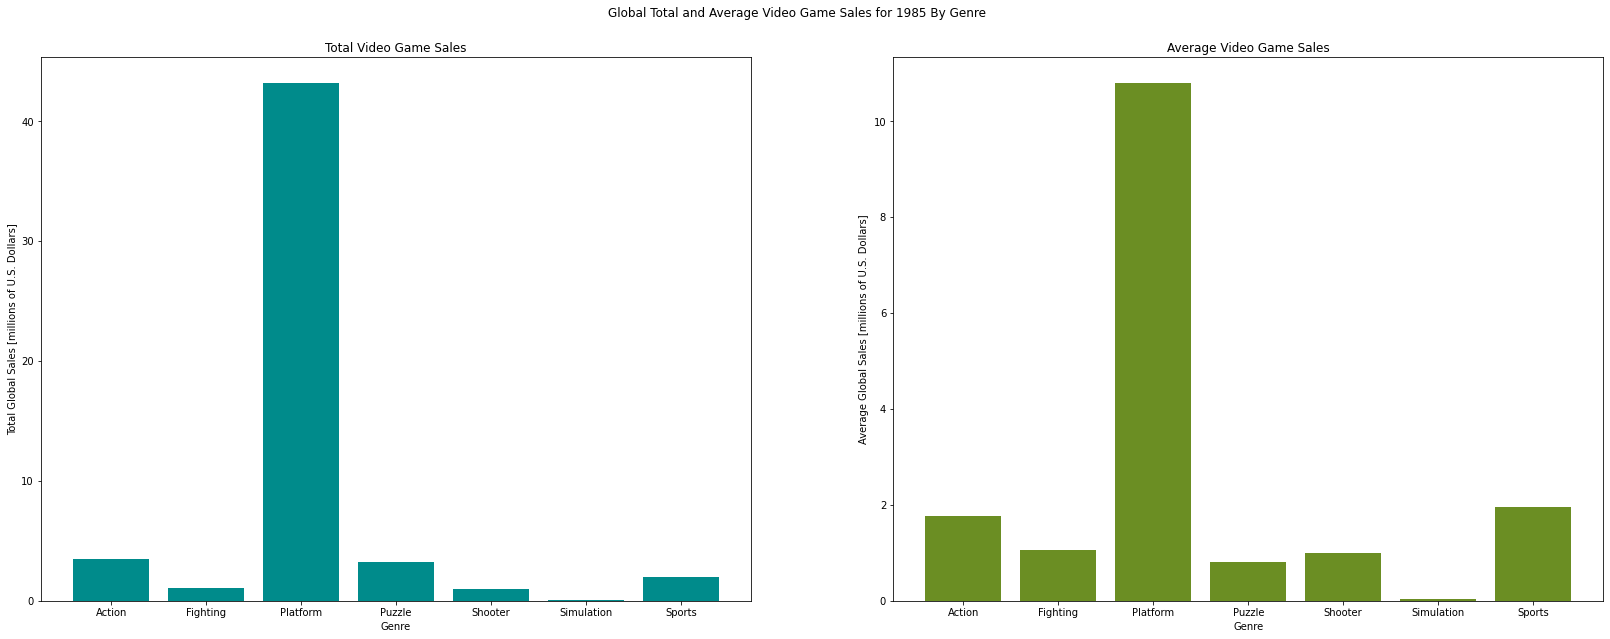

In [66]:
# Plot global sales for 1985 (the year the NES debuted in North America) for each genre sold:
plot_genre_sales_for_year(1985.0, 'Global')

In [ ]:
# Super Mario Bros is being classified as a platformer by the database, and since a copy was included with each
# NES platform sold it makes sense that sales of platformer games should have skyrocketed that year. 

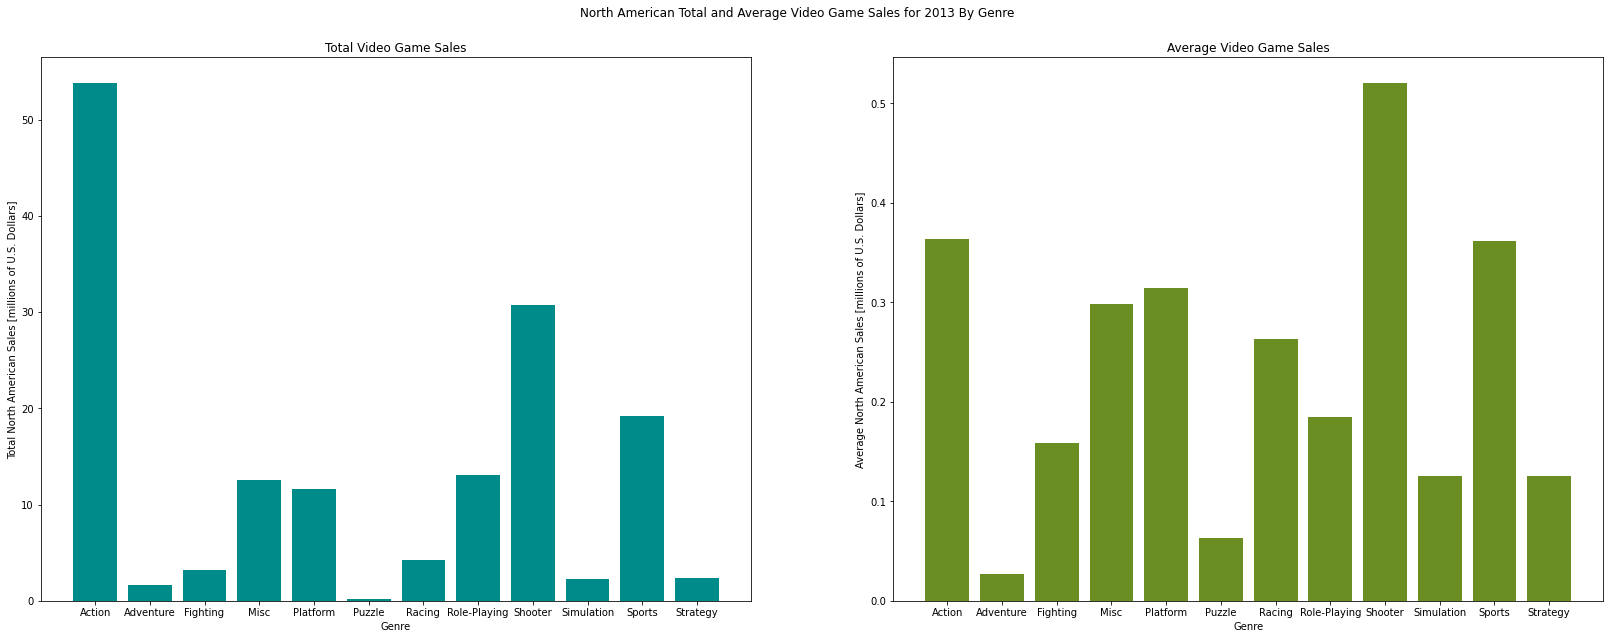

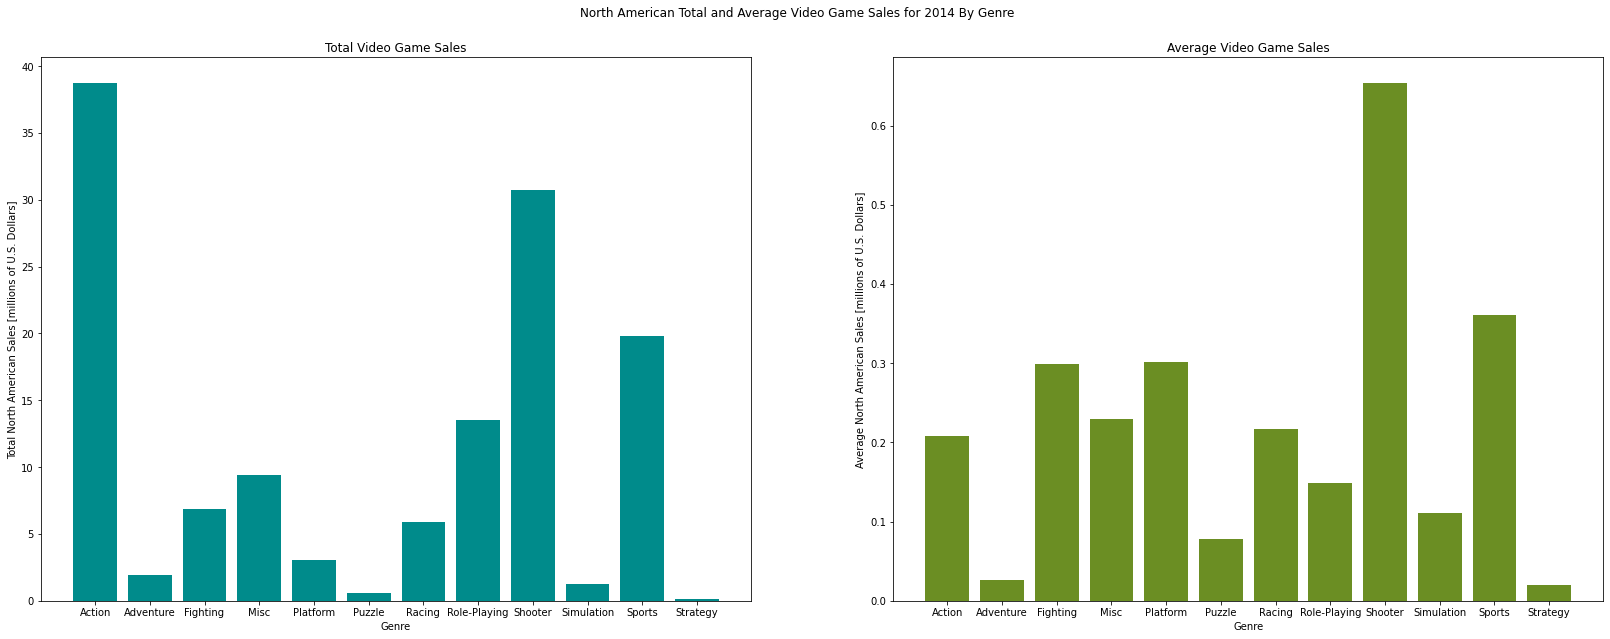

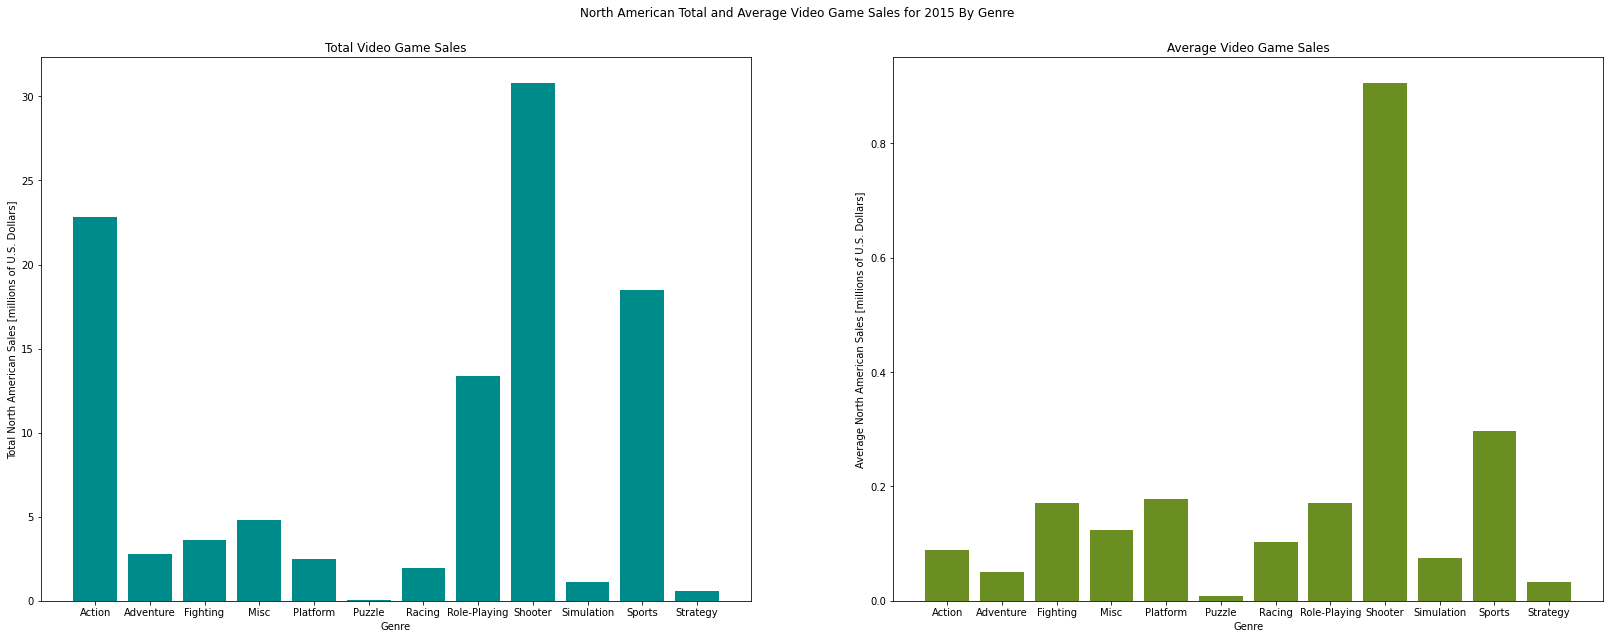

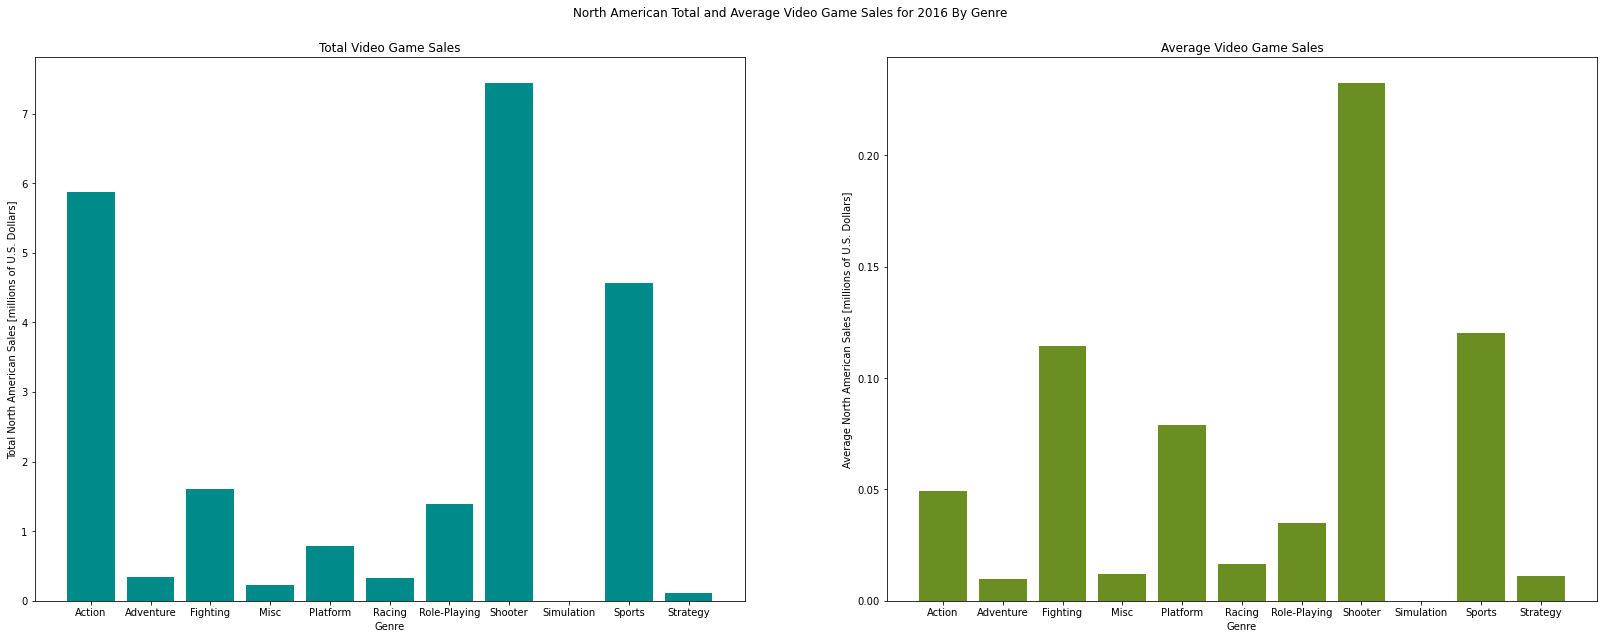

In [67]:
# Plot North American sales for 2013 for each genre sold:
plot_genre_sales_for_year(2013.0, 'North American')
# print plot to file:
plt.savefig('total_average_NA_sales_2013_by_genre.png')
# Plot North American sales for 2014 for each genre sold:
plot_genre_sales_for_year(2014.0, 'North American')
# print plot to file:
plt.savefig('total_average_NA_sales_2014_by_genre.png')
# Plot North American sales for 2015 for each genre sold:
plot_genre_sales_for_year(2015.0, 'North American')
# print plot to file:
plt.savefig('total_average_NA_sales_2015_by_genre.png')
# Plot North American sales for 2016 for each genre sold:
plot_genre_sales_for_year(2016.0, 'North American')
# print plot to file:
plt.savefig('total_average_NA_sales_2016_by_genre.png')

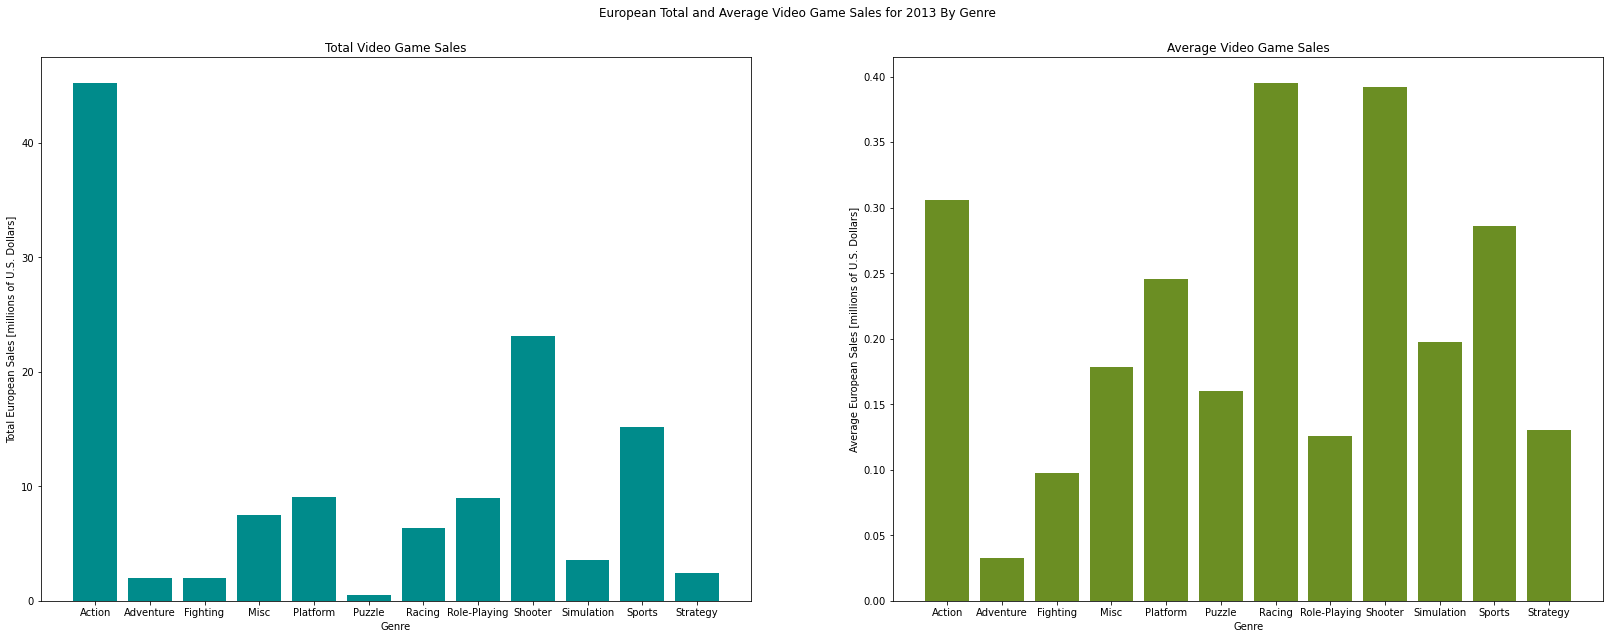

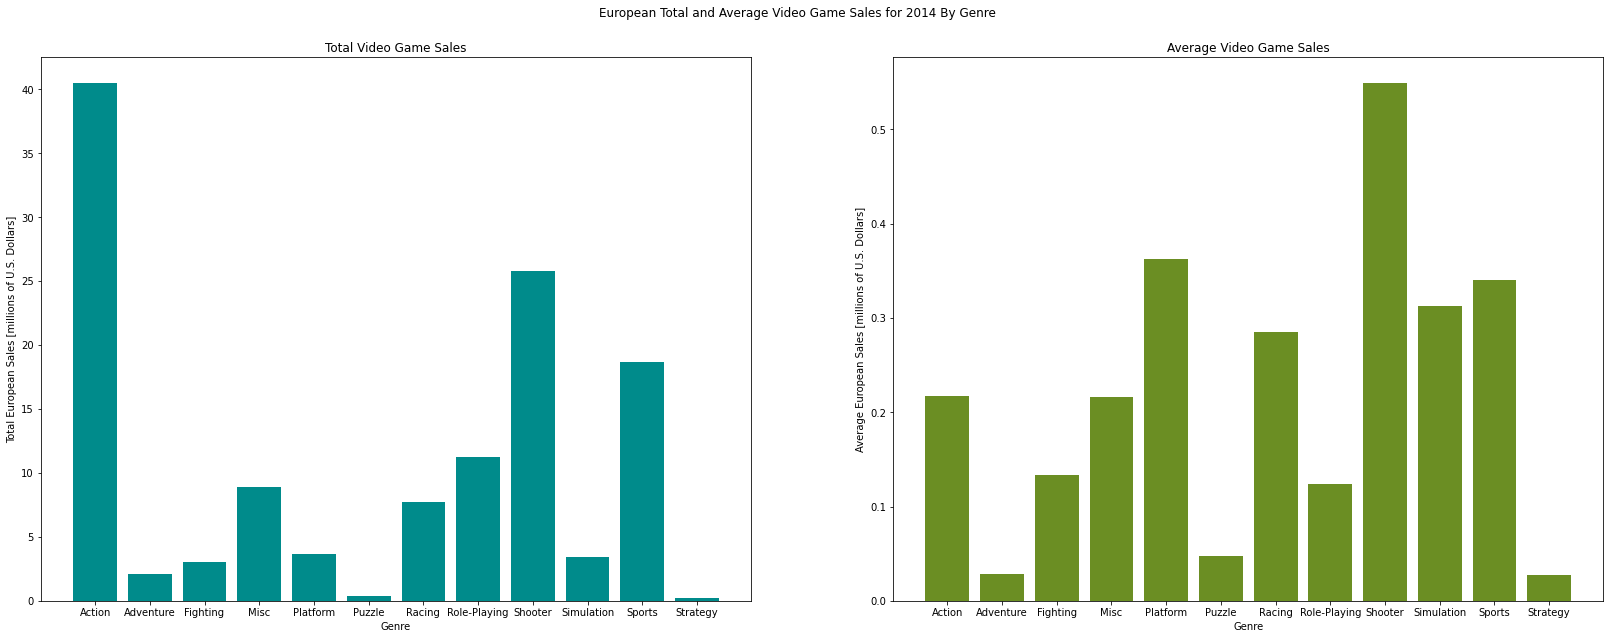

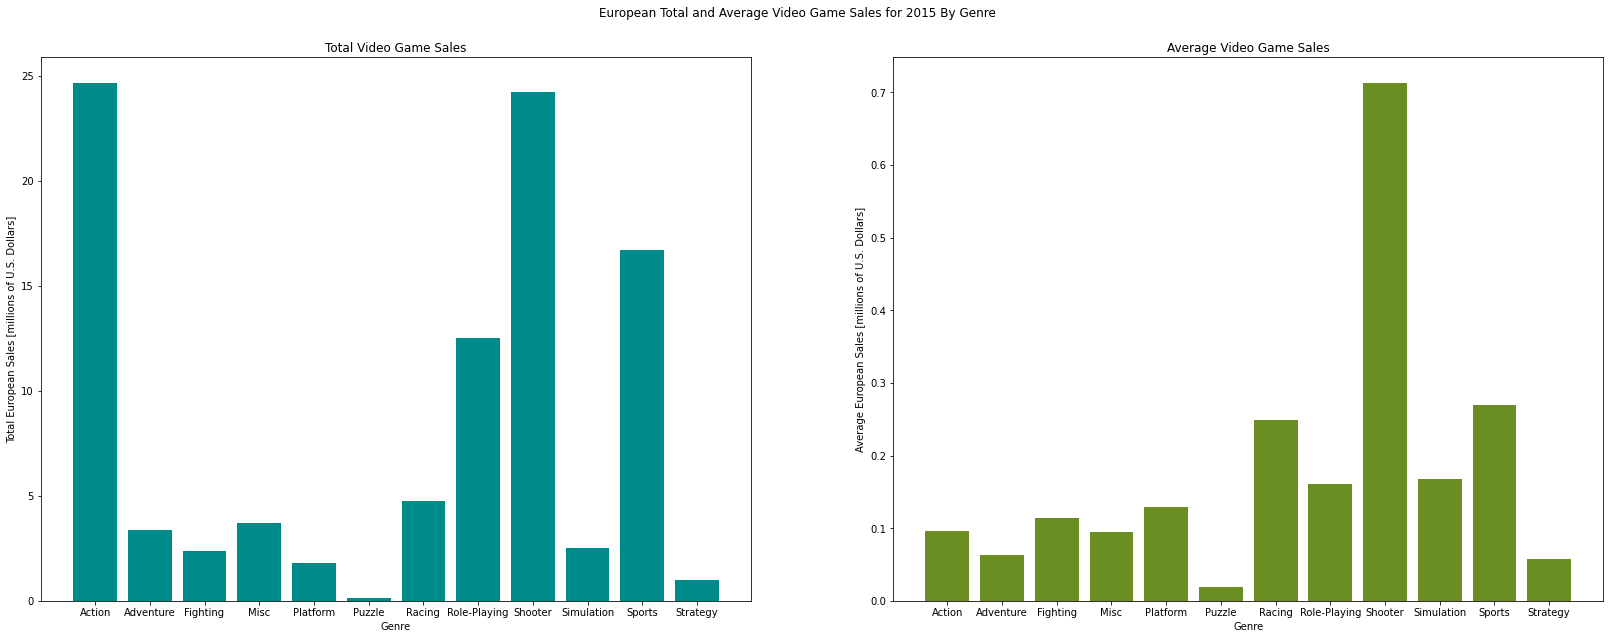

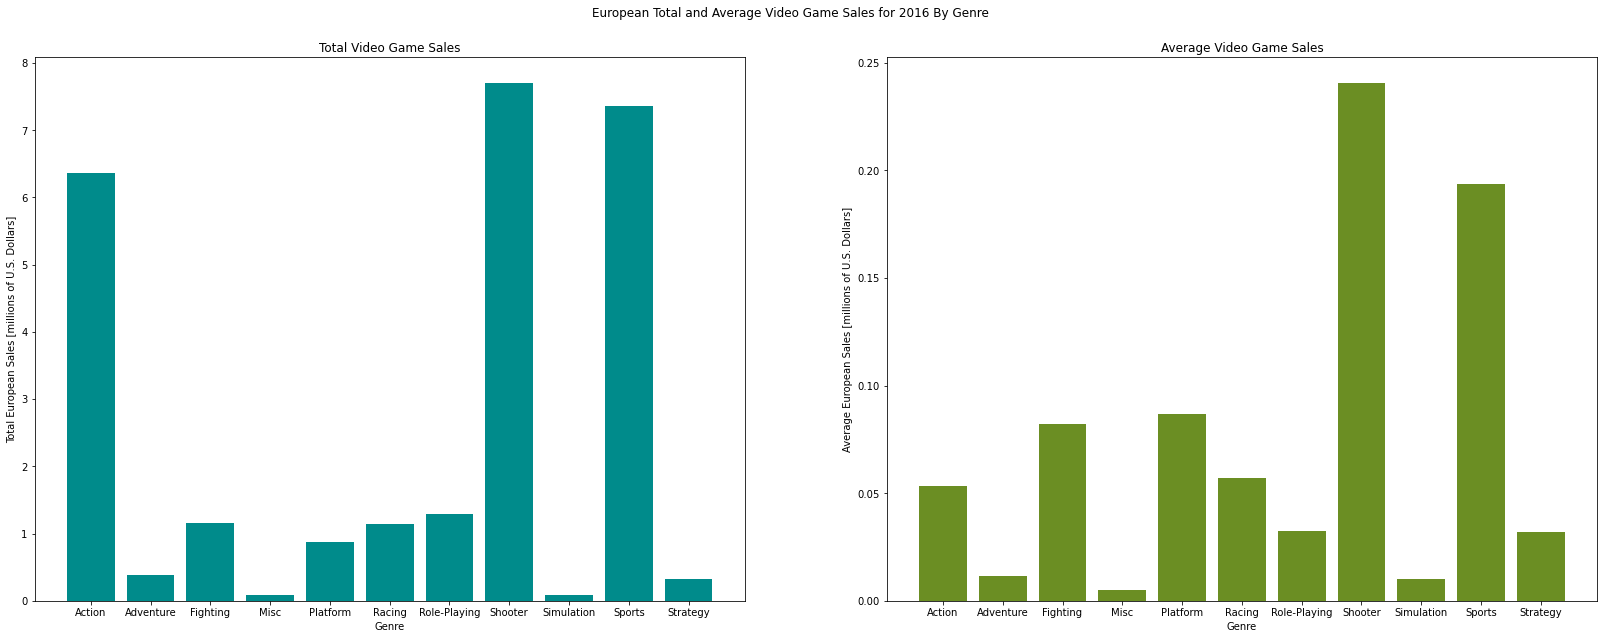

In [68]:
# Plot European sales for 2013 for each genre sold:
plot_genre_sales_for_year(2013.0, 'European')
# print plot to file:
plt.savefig('total_average_EU_sales_2013_by_genre.png')
# Plot European sales for 2014 for each genre sold:
plot_genre_sales_for_year(2014.0, 'European')
# print plot to file:
plt.savefig('total_average_EU_sales_2014_by_genre.png')
# Plot European sales for 2015 for each genre sold:
plot_genre_sales_for_year(2015.0, 'European')
# print plot to file:
plt.savefig('total_average_EU_sales_2015_by_genre.png')
# Plot European sales for 2016 for each genre sold:
plot_genre_sales_for_year(2016.0, 'European')
# print plot to file:
plt.savefig('total_average_EU_sales_2016_by_genre.png')

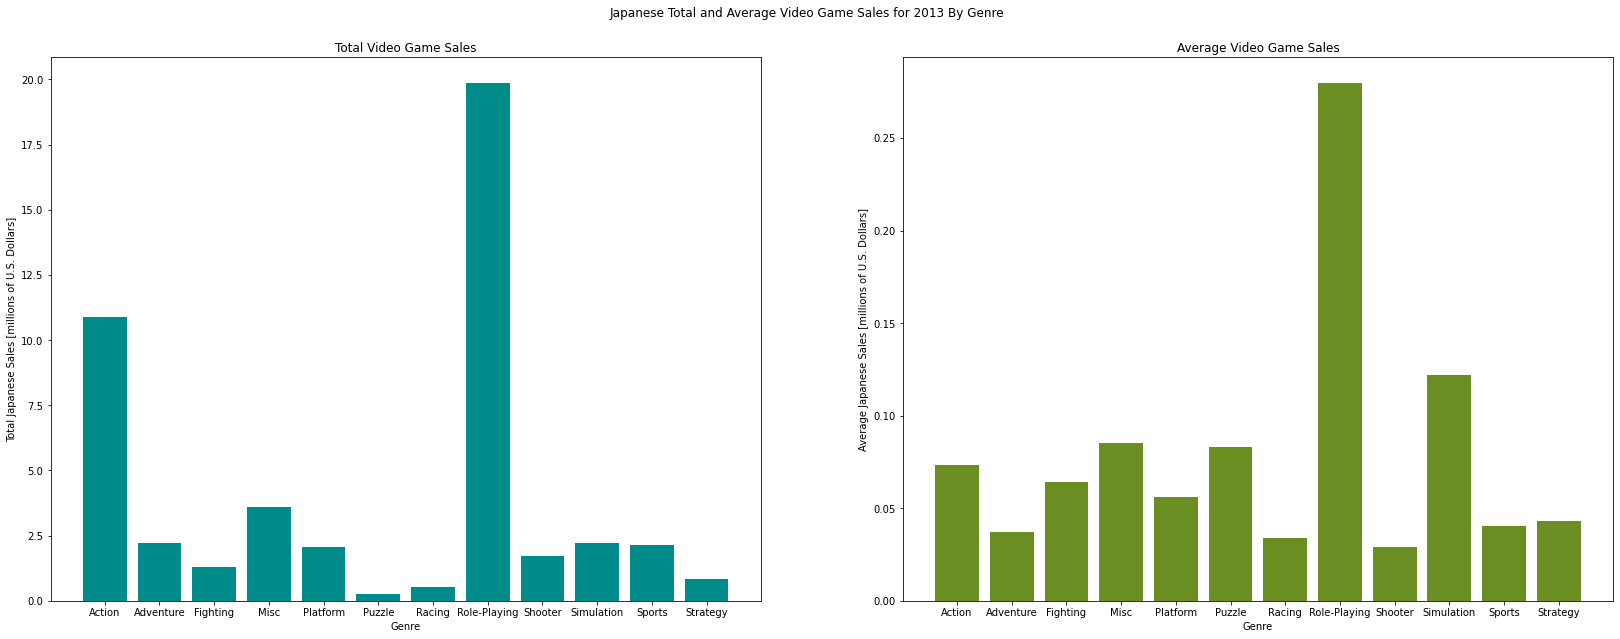

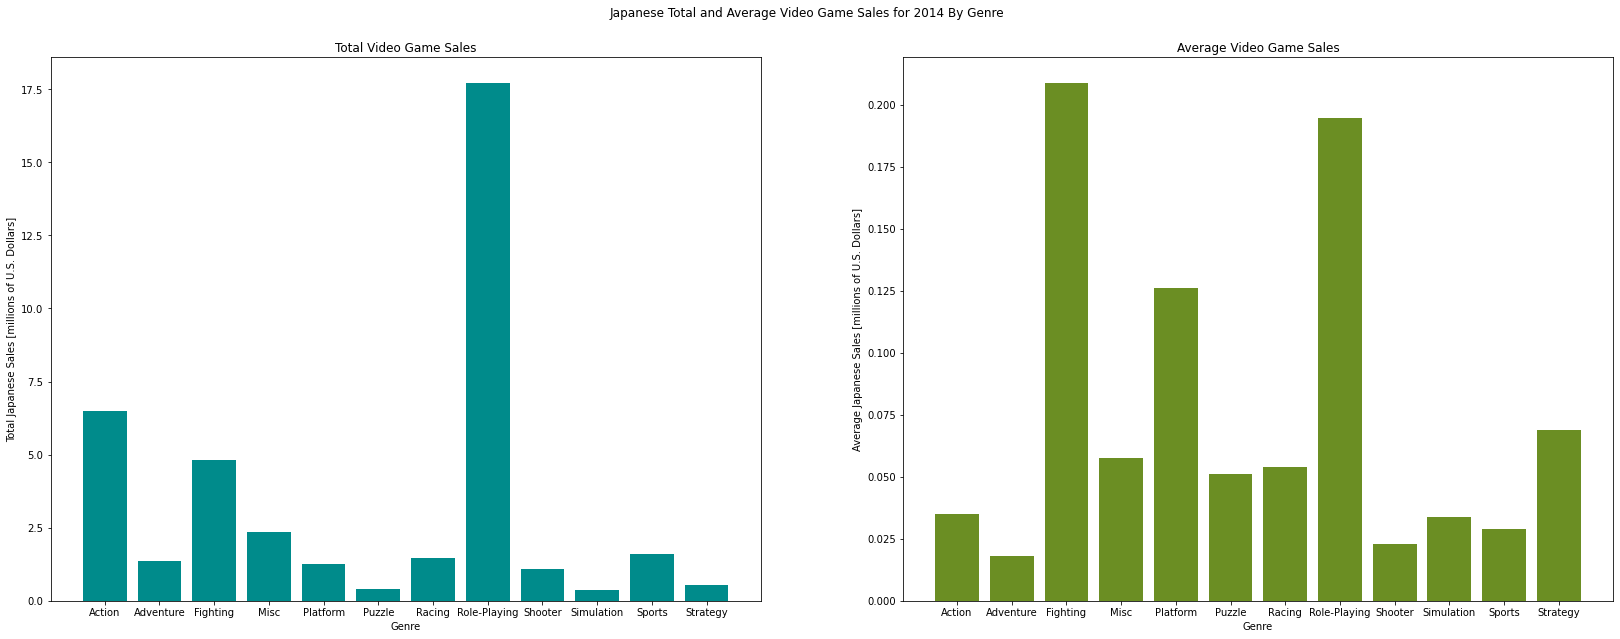

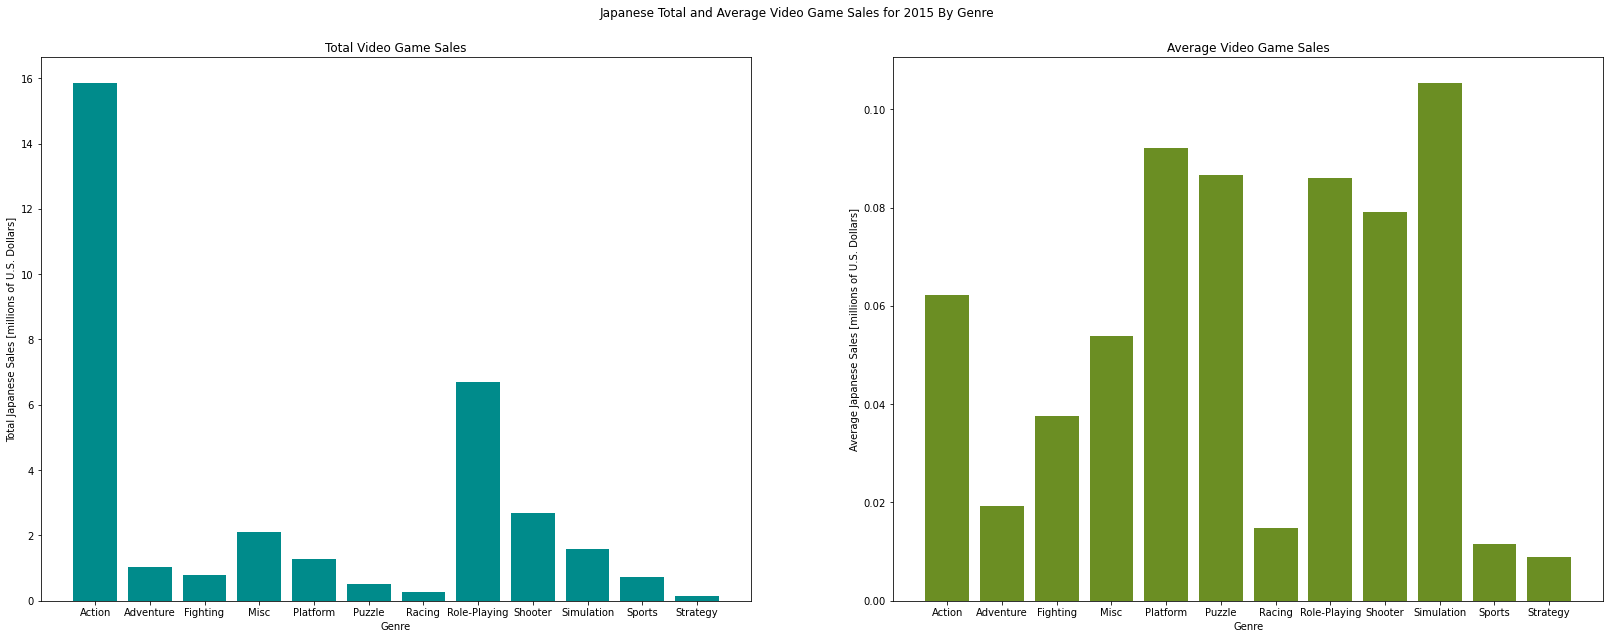

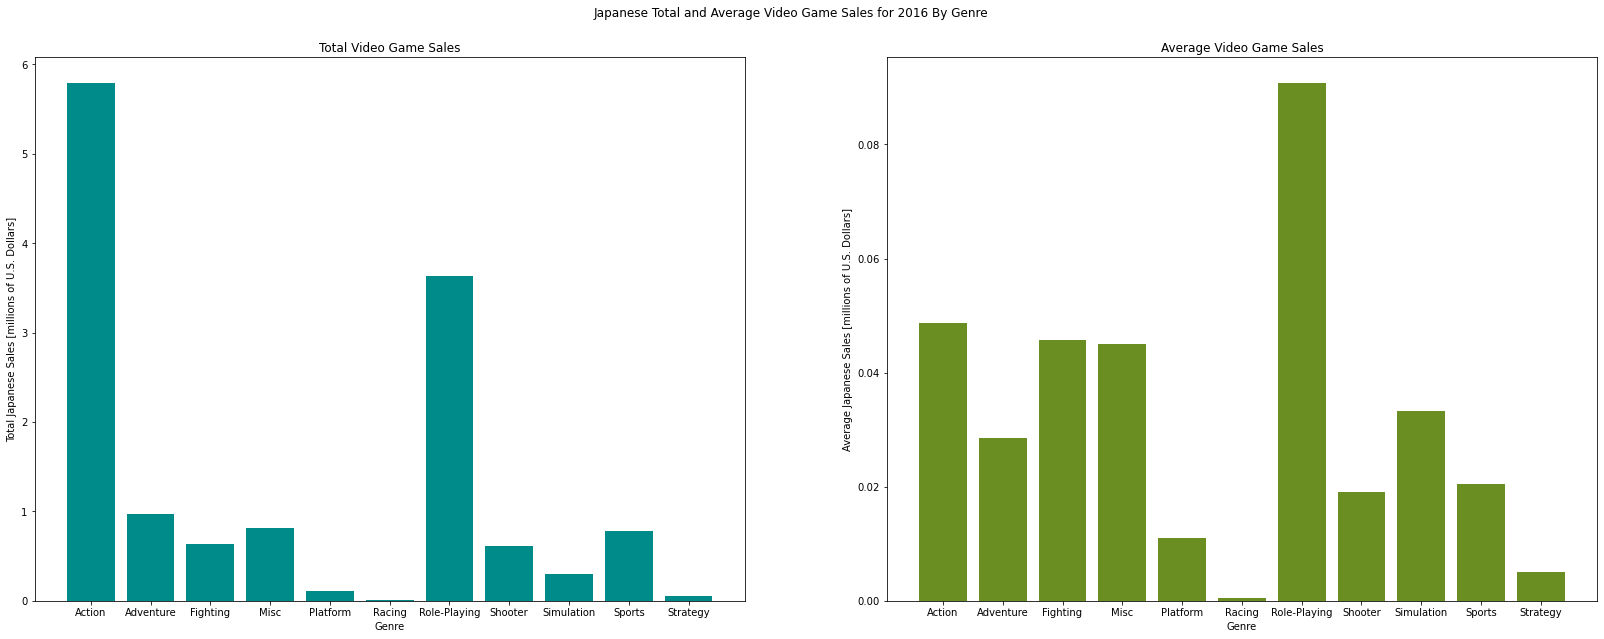

In [69]:
# Plot Japanese sales for 2013 for each genre sold:
plot_genre_sales_for_year(2013.0, 'Japanese')
# print plot to file:
plt.savefig('total_average_JP_sales_2013_by_genre.png')
# Plot Japanese sales for 2014 for each genre sold:
plot_genre_sales_for_year(2014.0, 'Japanese')
# print plot to file:
plt.savefig('total_average_JP_sales_2014_by_genre.png')
# Plot Japanese sales for 2015 for each genre sold:
plot_genre_sales_for_year(2015.0, 'Japanese')
# print plot to file:
plt.savefig('total_average_JP_sales_2015_by_genre.png')
# Plot Japanese sales for 2016 for each genre sold:
plot_genre_sales_for_year(2016.0, 'Japanese')
# print plot to file:
plt.savefig('total_average_JP_sales_2016_by_genre.png')

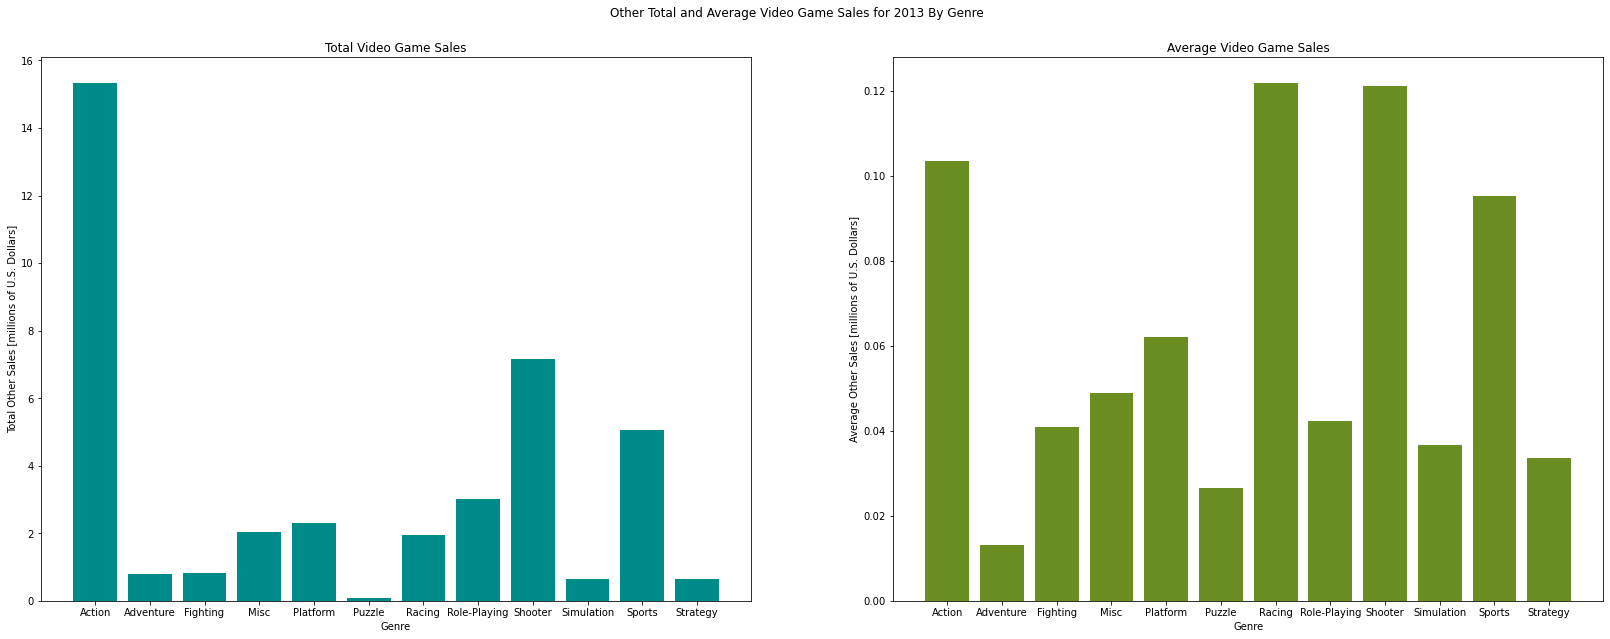

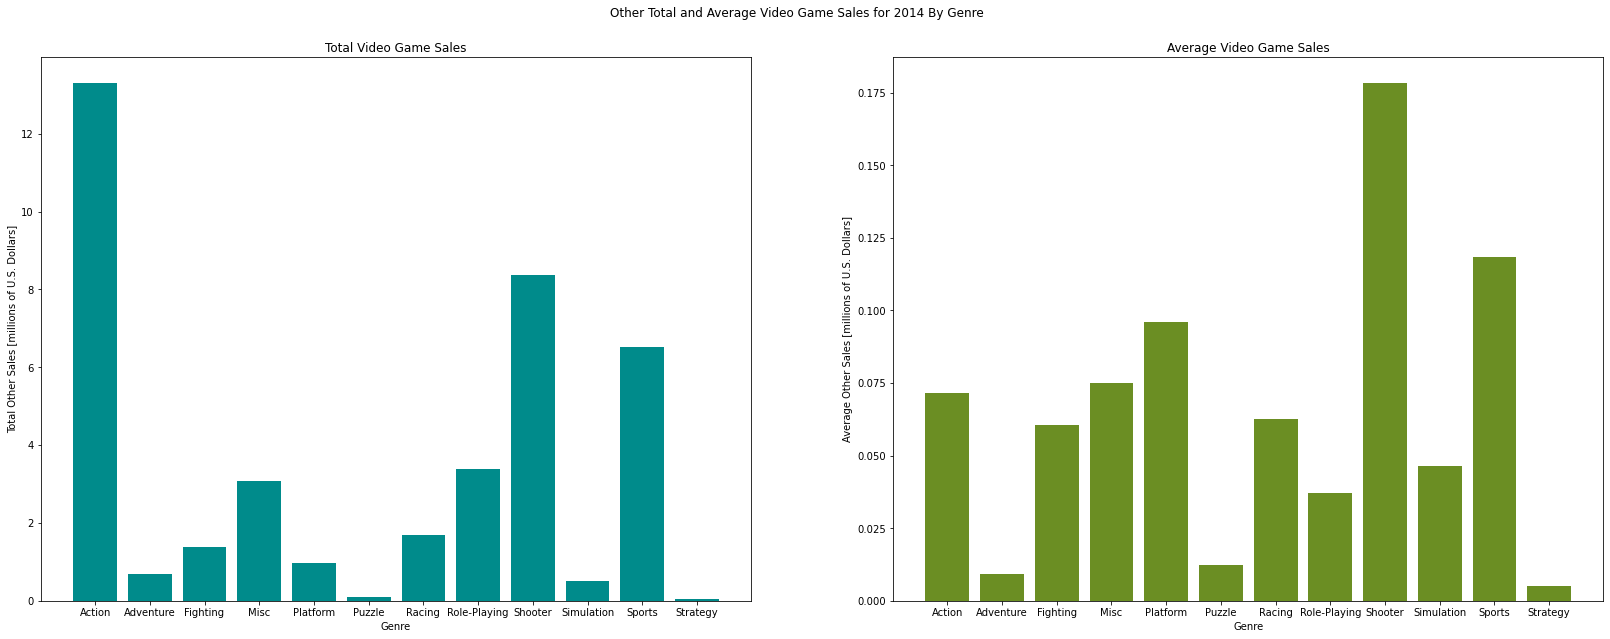

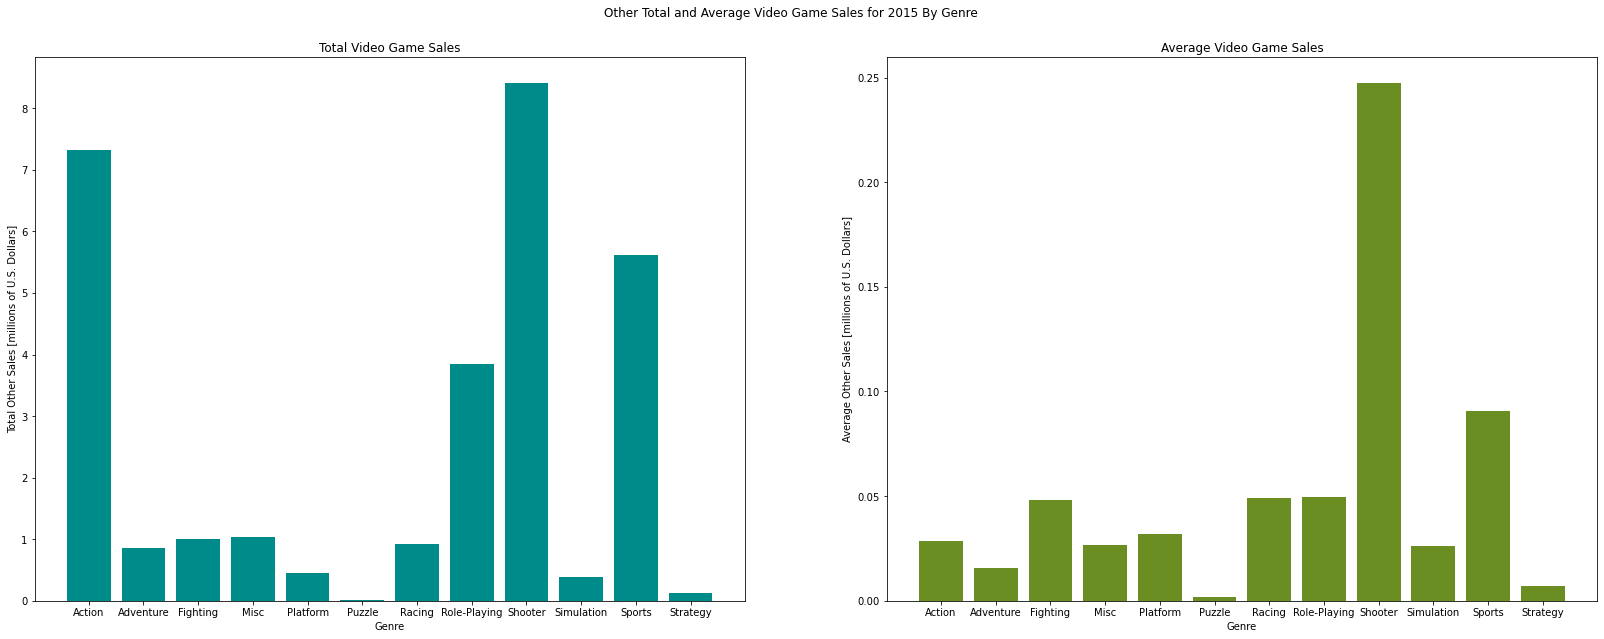

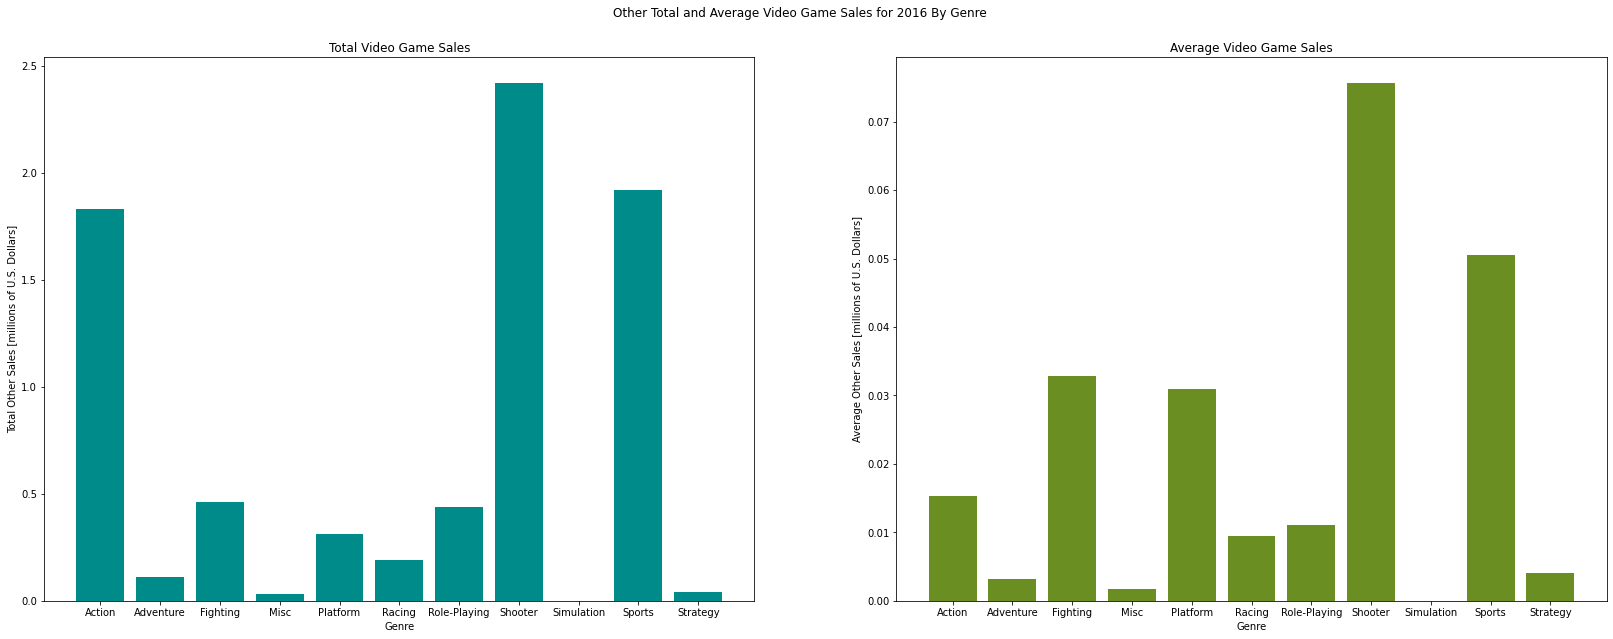

In [70]:
# Plot "Other" sales for 2013 for each genre sold:
plot_genre_sales_for_year(2013.0, 'Other')
# print plot to file:
plt.savefig('total_average_Other_sales_2013_by_genre.png')
# Plot "Other" sales for 2014 for each genre sold:
plot_genre_sales_for_year(2014.0, 'Other')
# print plot to file:
plt.savefig('total_average_Other_sales_2014_by_genre.png')
# Plot "Other" sales for 2015 for each genre sold:
plot_genre_sales_for_year(2015.0, 'Other')
# print plot to file:
plt.savefig('total_average_Other_sales_2015_by_genre.png')
# Plot "Other" sales for 2016 for each genre sold:
plot_genre_sales_for_year(2016.0, 'Other')
# print plot to file:
plt.savefig('total_average_Other_sales_2016_by_genre.png')

# Plots of Total and Average Sales by Genre and Region, for a Specified Year and Platform

In [71]:
# The below function plots a bar graph of total and average sales of all game genres for a particular year,
# in a specified region and for a specified gaming platform. Total sales are plotted on the left-hand side 
# of the plot, whereas average sales are plotted on the right-hand side of the plot.

def plot_genre_sales_for_year_for_system(year, region, system):
    # store the user-specified year as a string for later inclusion in the plot:
    thishereyear = str(int(year))
    # since year is stored as a float in the vg_sales_data DataFrame, convert the year provided by the
    # user to a float if it wasn't already entered as a float:
    year = float(year)
    
    # pluck off sales data for the user-specified year and gaming platform:
    thisheredata = vg_sales_data[(vg_sales_data.Year == year) & (vg_sales_data.Platform == system)]
    
    if region == 'Global':
        # group data by genre and calculate total global sales by genre:
        total_sales_for_year = thisheredata.groupby('Genre').Global_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_for_year.rename(columns = {'Global_Sales': 'Sales'}, inplace = True)
        # group data by genre and calculate average global sales by genre:
        avg_sales_for_year = thisheredata.groupby('Genre').Global_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_for_year.rename(columns = {'Global_Sales': 'Sales'}, inplace = True)
    elif region == 'North American':
        # group data by genre and calculate total North American sales by genre:
        total_sales_for_year = thisheredata.groupby('Genre').NA_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_for_year.rename(columns = {'NA_Sales': 'Sales'}, inplace = True)
         # group data by genre and calculate average North American sales by genre:
        avg_sales_for_year = thisheredata.groupby('Genre').NA_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_for_year.rename(columns = {'NA_Sales': 'Sales'}, inplace = True)
    elif region == 'European':
        # group data by genre and calculate total European sales by genre:
        total_sales_for_year = thisheredata.groupby('Genre').EU_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_for_year.rename(columns = {'EU_Sales': 'Sales'}, inplace = True)
         # group data by genre and calculate average European sales by genre:
        avg_sales_for_year = thisheredata.groupby('Genre').EU_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_for_year.rename(columns = {'EU_Sales': 'Sales'}, inplace = True)
    elif region == 'Japanese':
        # group data by genre and calculate total Japanese sales by genre:
        total_sales_for_year = thisheredata.groupby('Genre').JP_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_for_year.rename(columns = {'JP_Sales': 'Sales'}, inplace = True)
         # group data by genre and calculate average Japanese sales by genre:
        avg_sales_for_year = thisheredata.groupby('Genre').JP_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_for_year.rename(columns = {'JP_Sales': 'Sales'}, inplace = True)
    elif region == 'Other':
        # group data by genre and calculate total "Other" sales by genre:
        total_sales_for_year = thisheredata.groupby('Genre').Other_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_for_year.rename(columns = {'Other_Sales': 'Sales'}, inplace = True)
         # group data by genre and calculate average "Other" sales by genre:
        avg_sales_for_year = thisheredata.groupby('Genre').Other_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_for_year.rename(columns = {'Other_Sales': 'Sales'}, inplace = True)
        
        
    plt.figure(figsize = (28,10))
    # make a bar plot of total sales per genre for the specified year and platform, with axis labels and a title:
    plt.subplot(1,2,1)
    plt.bar(total_sales_for_year.Genre, total_sales_for_year.Sales, color = 'darkcyan')
    plt.xlabel('Genre')
    plt.ylabel('Total ' + region + ' Sales [millions of U.S. Dollars]')
    plt.title('Total Video Game Sales')
    # make a bar plot of average sales per genre for the specified year and platform, with axis labels and a title:
    plt.subplot(1,2,2)
    plt.bar(avg_sales_for_year.Genre, avg_sales_for_year.Sales, color = 'olivedrab')
    plt.xlabel('Genre')
    plt.ylabel('Average ' + region + ' Sales [millions of U.S. Dollars]')
    plt.title('Average Video Game Sales')
    # give an informative title for the plot as a whole:
    plt.suptitle(region + ' Total and Average ' + system + ' Game Sales for ' + thishereyear + \
                 ' By Genre', x = 0.5, y = 0.95)

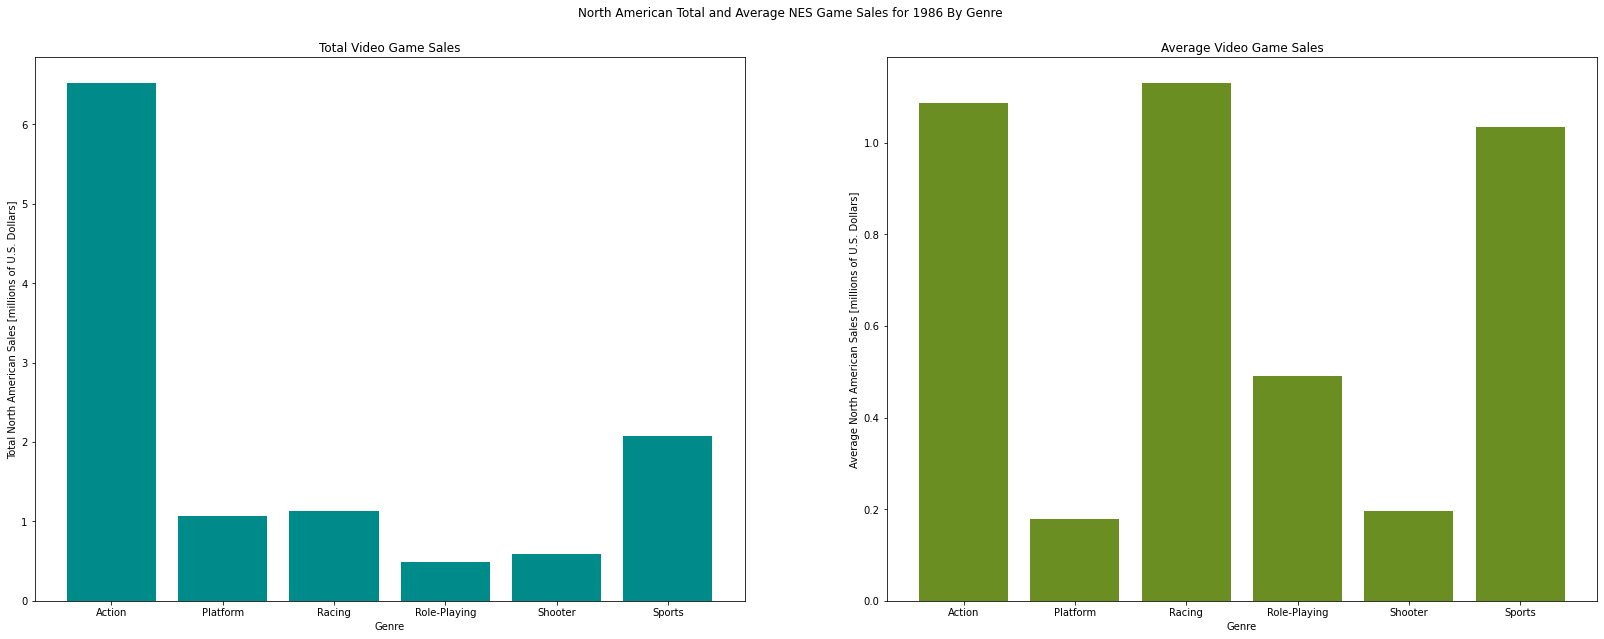

In [72]:
# Plot North American sales for the NES in 1986 for each genre sold:
plot_genre_sales_for_year_for_system(1986.0, 'North American', 'NES')

In [ ]:
# The spike in action game sales is probably for the Legend of Zelda, which is still a popular game in some
# gaming circles 30+ years later.

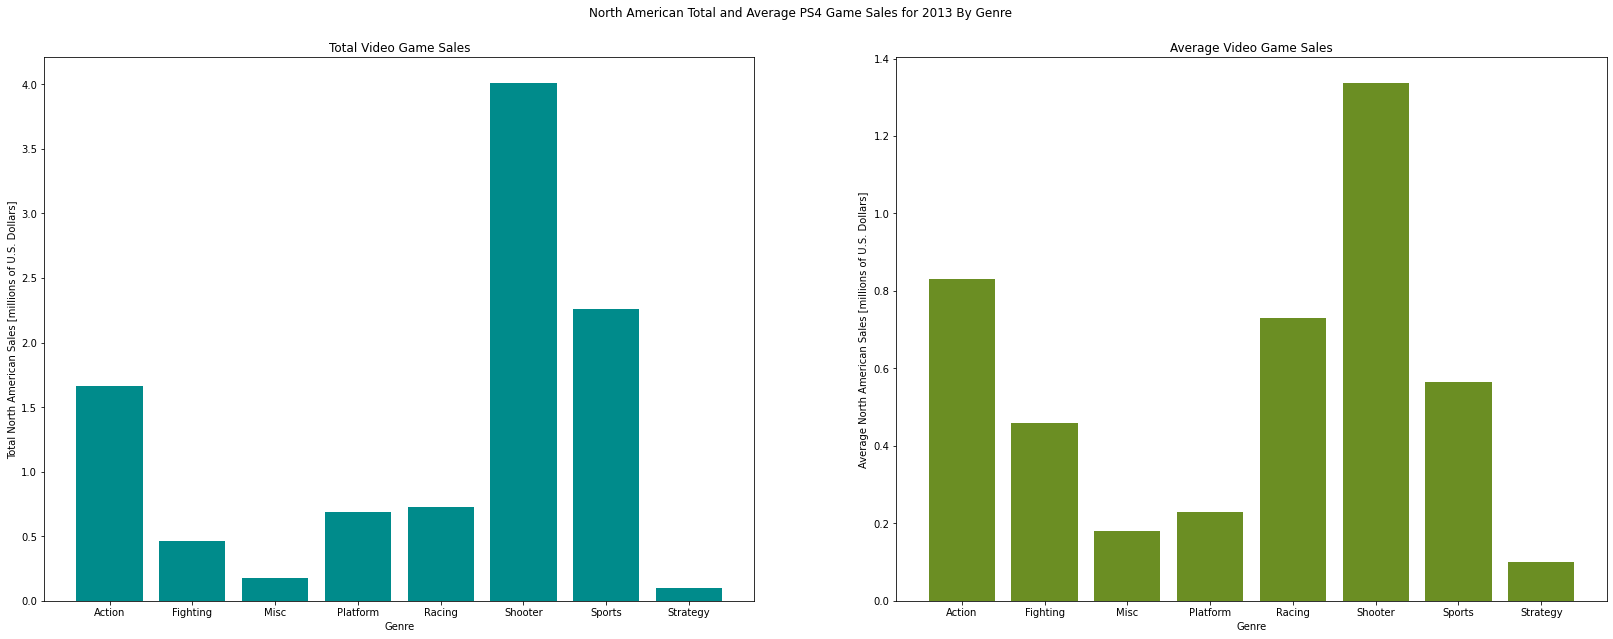

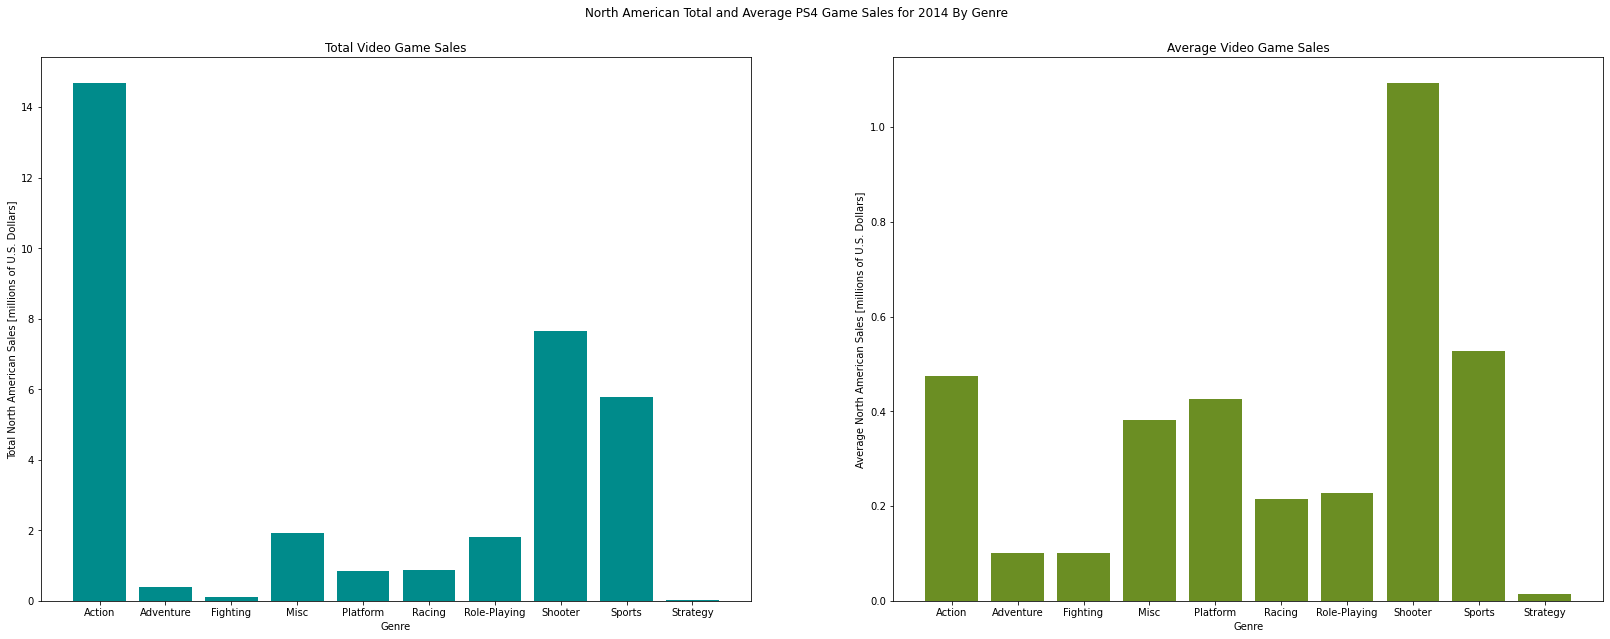

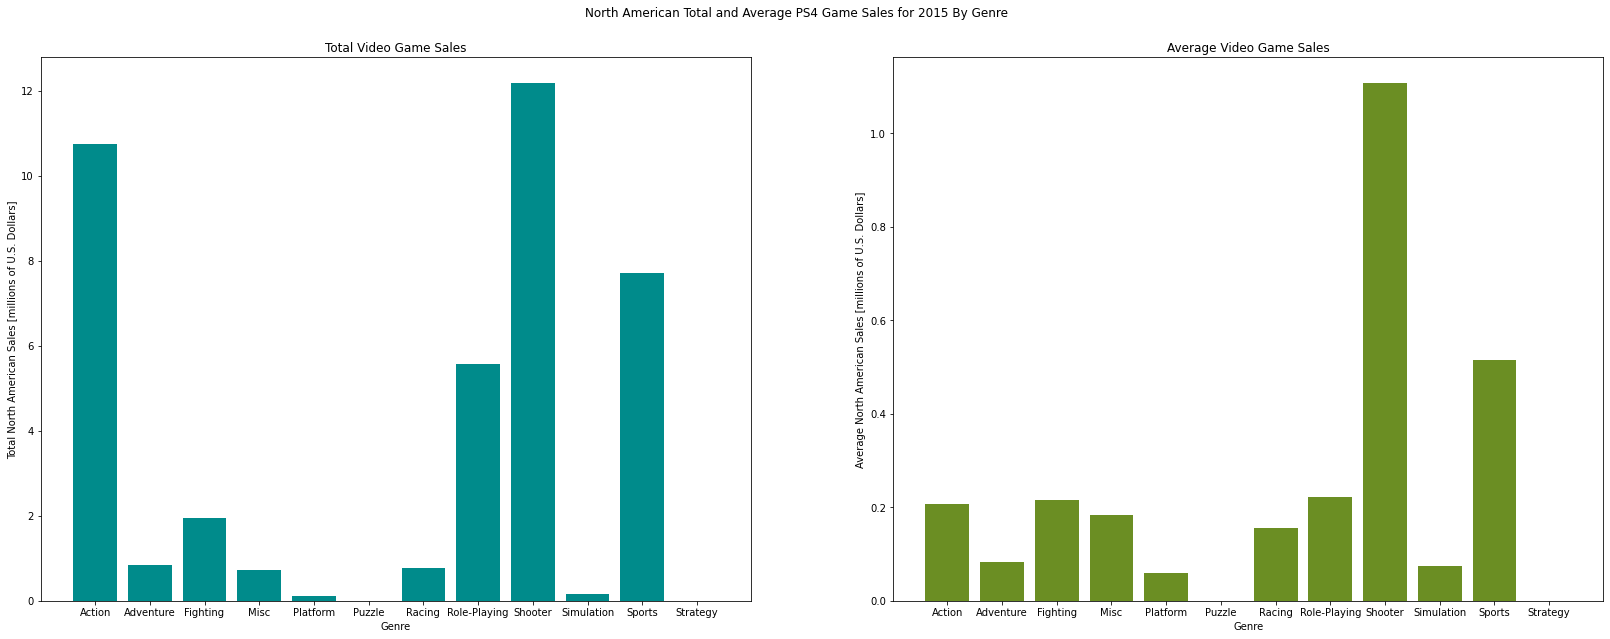

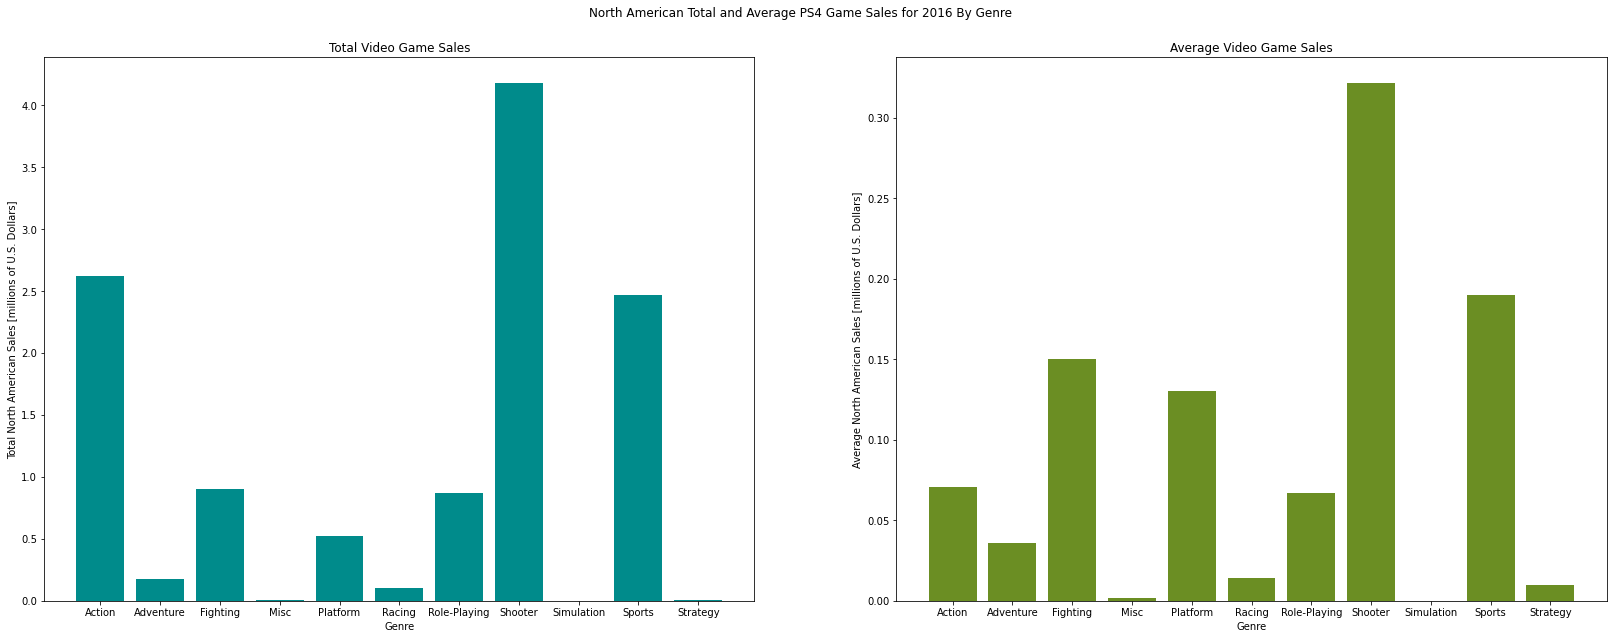

In [73]:
# Plot North American sales for the PS4 for each genre sold in 2013:
plot_genre_sales_for_year_for_system(2013.0, 'North American', 'PS4')
# print plot to file:
plt.savefig('total_average_NA_PS4_sales_by_genre_2013.png')
# Plot North American sales for the PS4 for each genre sold in 2014:
plot_genre_sales_for_year_for_system(2014.0, 'North American', 'PS4')
# print plot to file:
plt.savefig('total_average_NA_PS4_sales_by_genre_2014.png')
# Plot North American sales for the PS4 for each genre sold in 2015:
plot_genre_sales_for_year_for_system(2015.0, 'North American', 'PS4')
# print plot to file:
plt.savefig('total_average_NA_PS4_sales_by_genre_2015.png')
# Plot North American sales for the PS4 for each genre sold in 2016:
plot_genre_sales_for_year_for_system(2016.0, 'North American', 'PS4')
# print plot to file:
plt.savefig('total_average_NA_PS4_sales_by_genre_2016.png')

# Plots of Total and Average Sales by Year and Region, for a Specified Genre

In [74]:
# Given a specific genre and gaming platform, what are the total and average yearly sales for a particular region? 
# The below function aims to answer this question. The result of the function is a plot containing two bar graphs,
# the left-hand one displaying total sales per year and the right-hand one displaying average sales per year.

def plot_yearly_sales_for_system_for_genre(system, genre, region):
    # pluck off sales data for the user-specified genre and gaming platform:
    thisheredata = vg_sales_data[(vg_sales_data.Genre == genre) & (vg_sales_data.Platform == system)]
    
    if region == 'Global':
        # group data by year and calculate total global sales by year:
        total_sales_by_year = thisheredata.groupby('Year').Global_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_by_year.rename(columns = {'Global_Sales': 'Sales'}, inplace = True)
        # group data by year and calculate average global sales by year:
        avg_sales_by_year = thisheredata.groupby('Year').Global_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_by_year.rename(columns = {'Global_Sales': 'Sales'}, inplace = True)
    elif region == 'North American':
        # group data by year and calculate total North American sales by year:
        total_sales_by_year = thisheredata.groupby('Year').NA_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_by_year.rename(columns = {'NA_Sales': 'Sales'}, inplace = True)
        # group data by year and calculate average North American sales by year:
        avg_sales_by_year = thisheredata.groupby('Year').NA_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_by_year.rename(columns = {'NA_Sales': 'Sales'}, inplace = True)
    elif region == 'European':
        # group data by year and calculate total European sales by year:
        total_sales_by_year = thisheredata.groupby('Year').EU_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_by_year.rename(columns = {'EU_Sales': 'Sales'}, inplace = True)
        # group data by year and calculate average European sales by year:
        avg_sales_by_year = thisheredata.groupby('Year').EU_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_by_year.rename(columns = {'EU_Sales': 'Sales'}, inplace = True)
    elif region == 'Japanese':
        # group data by year and calculate total Japanese sales by year:
        total_sales_by_year = thisheredata.groupby('Year').JP_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_by_year.rename(columns = {'JP_Sales': 'Sales'}, inplace = True)
        # group data by year and calculate average Japanese sales by year:
        avg_sales_by_year = thisheredata.groupby('Year').JP_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_by_year.rename(columns = {'JP_Sales': 'Sales'}, inplace = True)
    elif region == 'Other':
        # group data by year and calculate total "Other" sales by year:
        total_sales_by_year = thisheredata.groupby('Year').Other_Sales.apply(lambda x: np.sum(x)).reset_index()
        # rename columns for ease of reference later:
        total_sales_by_year.rename(columns = {'Other_Sales': 'Sales'}, inplace = True)
        # group data by year and calculate average "Other" sales by year:
        avg_sales_by_year = thisheredata.groupby('Year').Other_Sales.apply(lambda x: np.mean(x)).reset_index()
        # rename columns for ease of reference later:
        avg_sales_by_year.rename(columns = {'Other_Sales': 'Sales'}, inplace = True)
    
    plt.figure(figsize = (28,10))
    # make a bar plot of total sales per genre for the specified year and platform, with axis labels and a title:
    plt.subplot(1,2,1)
    plt.bar(total_sales_by_year.Year, total_sales_by_year.Sales, color = 'darkcyan')
    plt.xlabel('Year')
    plt.ylabel('Total ' + region + ' Sales [millions of U.S. Dollars]')
    plt.title('Total Video Game Sales')
    # make a bar plot of average sales per genre for the specified year and platform, with axis labels and a title:
    plt.subplot(1,2,2)
    plt.bar(avg_sales_by_year.Year, avg_sales_by_year.Sales, color = 'olivedrab')
    plt.xlabel('Year')
    plt.ylabel('Average ' + region + ' Sales [millions of U.S. Dollars]')
    plt.title('Average Video Game Sales')
    # give an informative title for the plot as a whole:
    plt.suptitle(region + ' Total and Average ' + system + " " + genre + '-type Game Sales (By Year)', \
                 x = 0.5, y = 0.95)

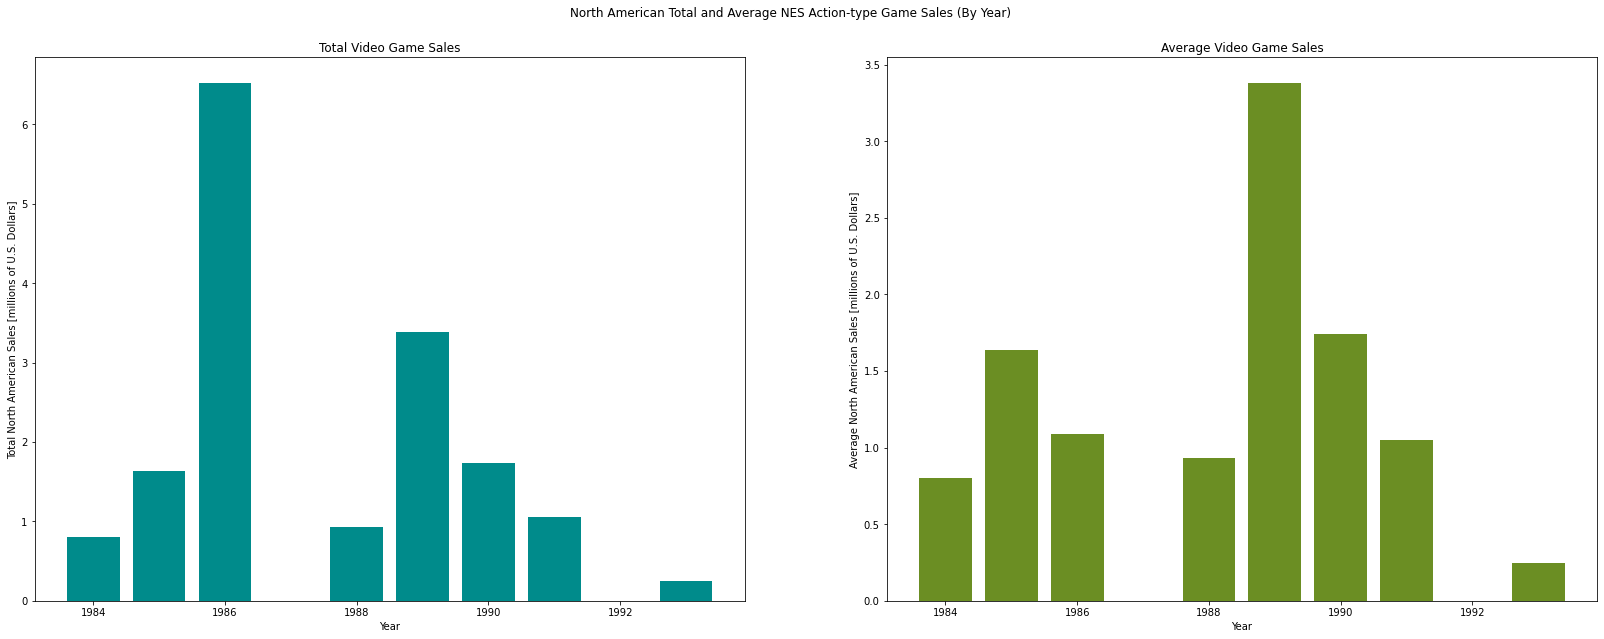

In [75]:
# Action games sold quite well (in terms of total North American sales) for the NES platform in 1986, thanks in 
# large part to the debut of The Legend of Zelda.
# How did action games sell for the NES over its effective "lifetime?"
plot_yearly_sales_for_system_for_genre('NES','Action','North American')

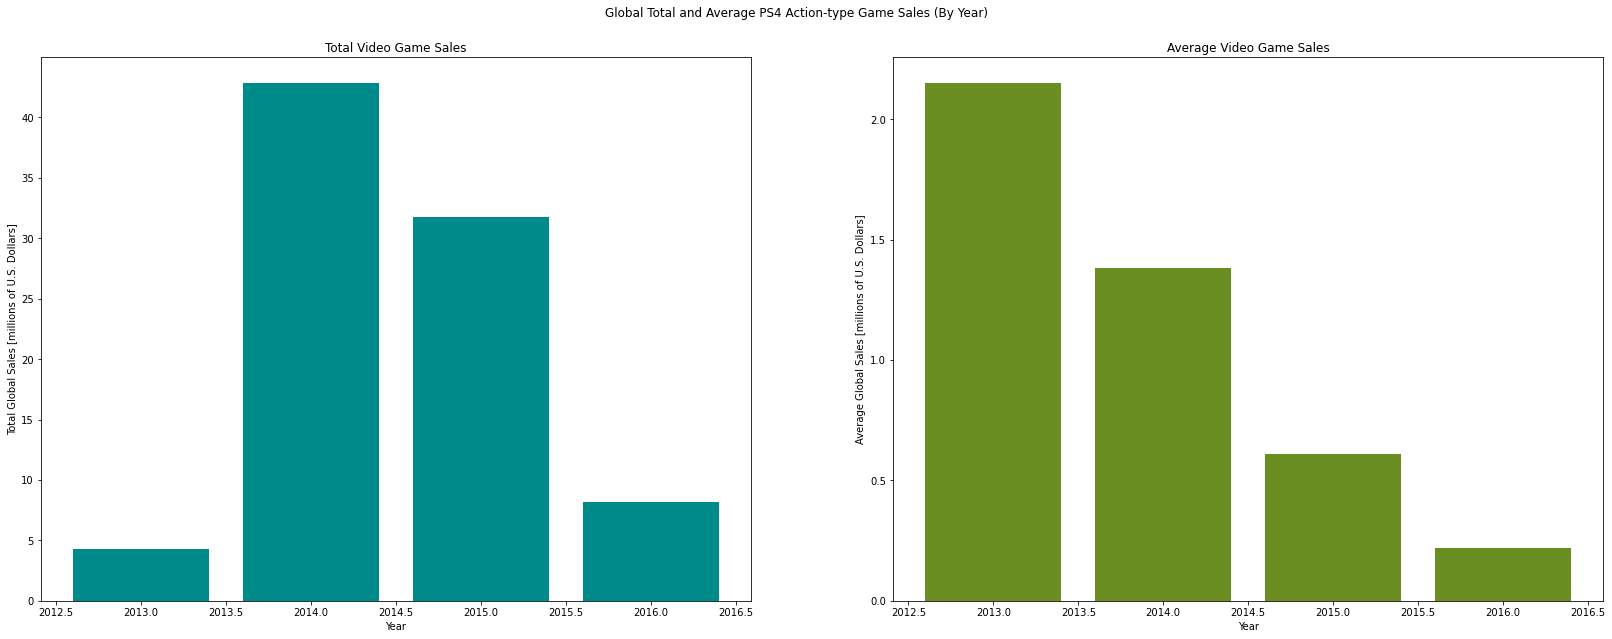

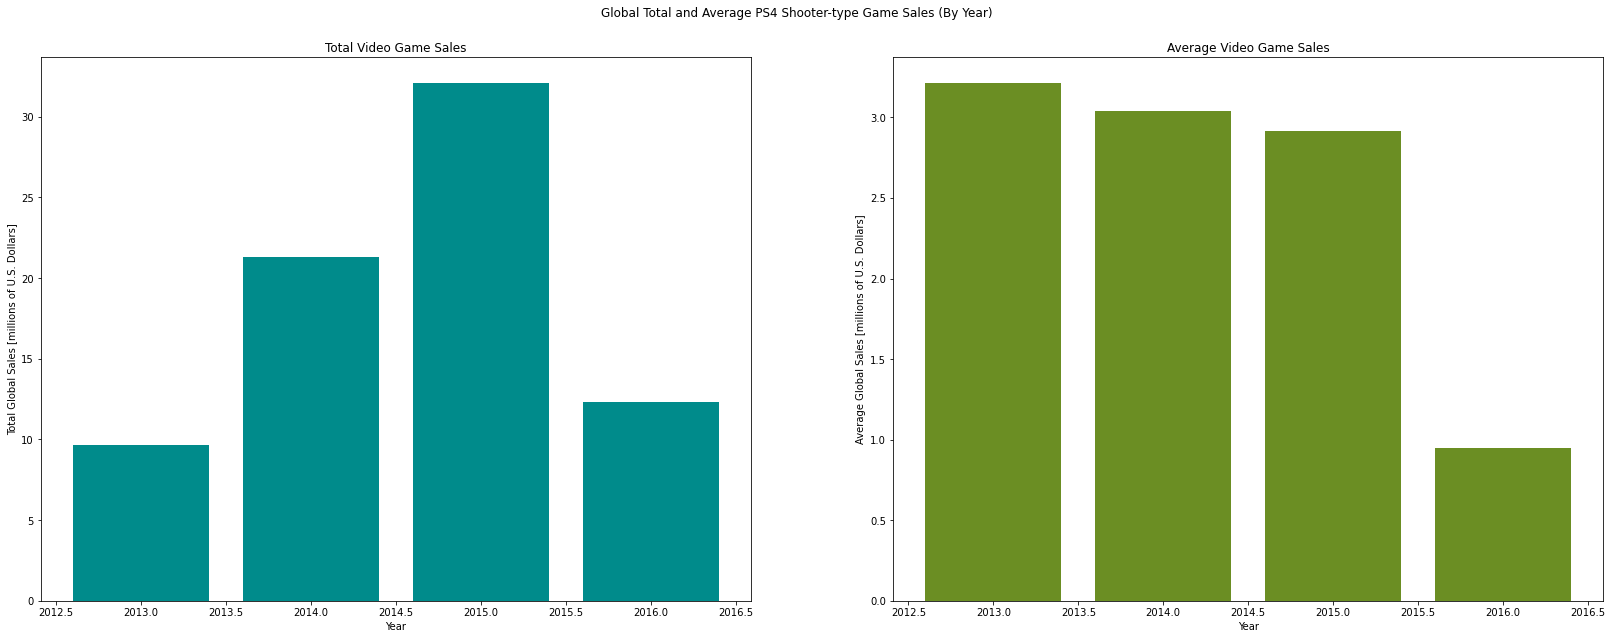

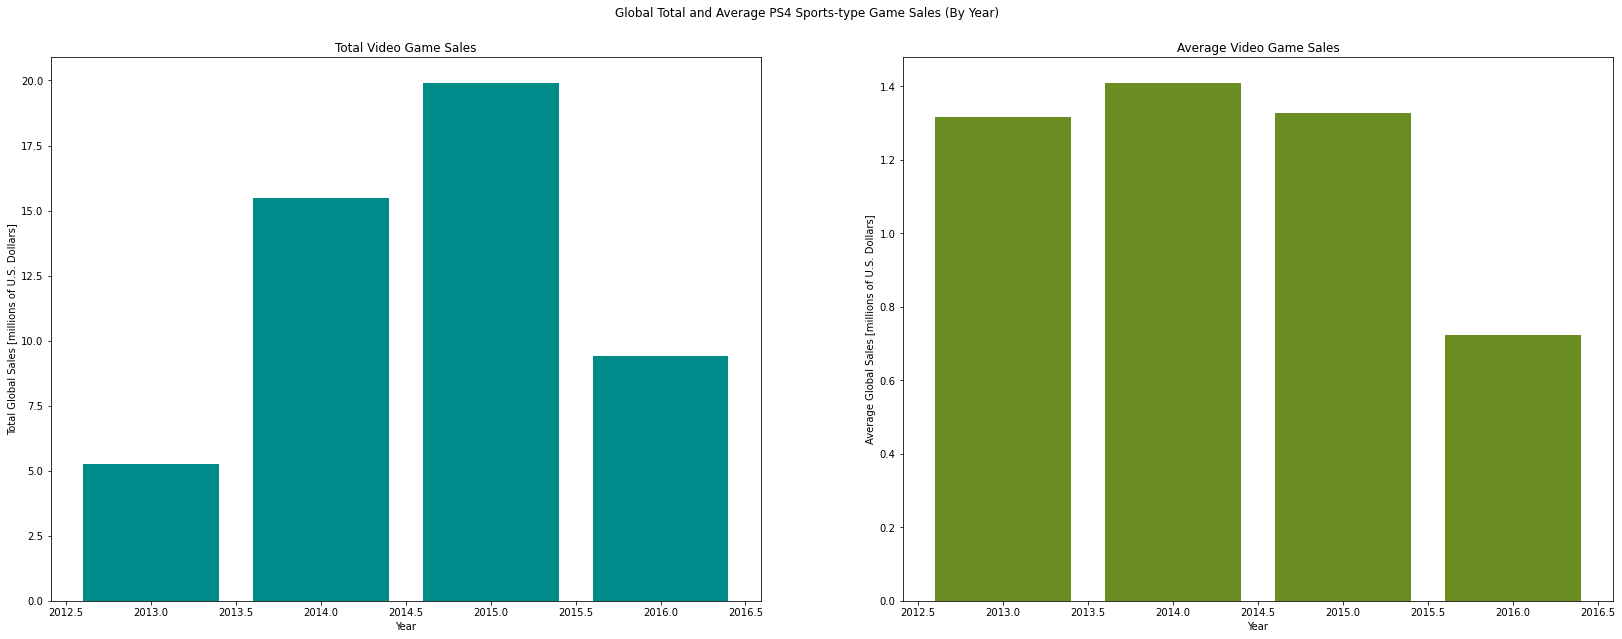

In [76]:
# Looking at a more recent gaming platform, how have action, first-person shooter, and sports games sold
# on the PS4 gaming platform for the years with full available data?
plot_yearly_sales_for_system_for_genre('PS4','Action','Global')
plot_yearly_sales_for_system_for_genre('PS4','Shooter','Global')
plot_yearly_sales_for_system_for_genre('PS4','Sports','Global')

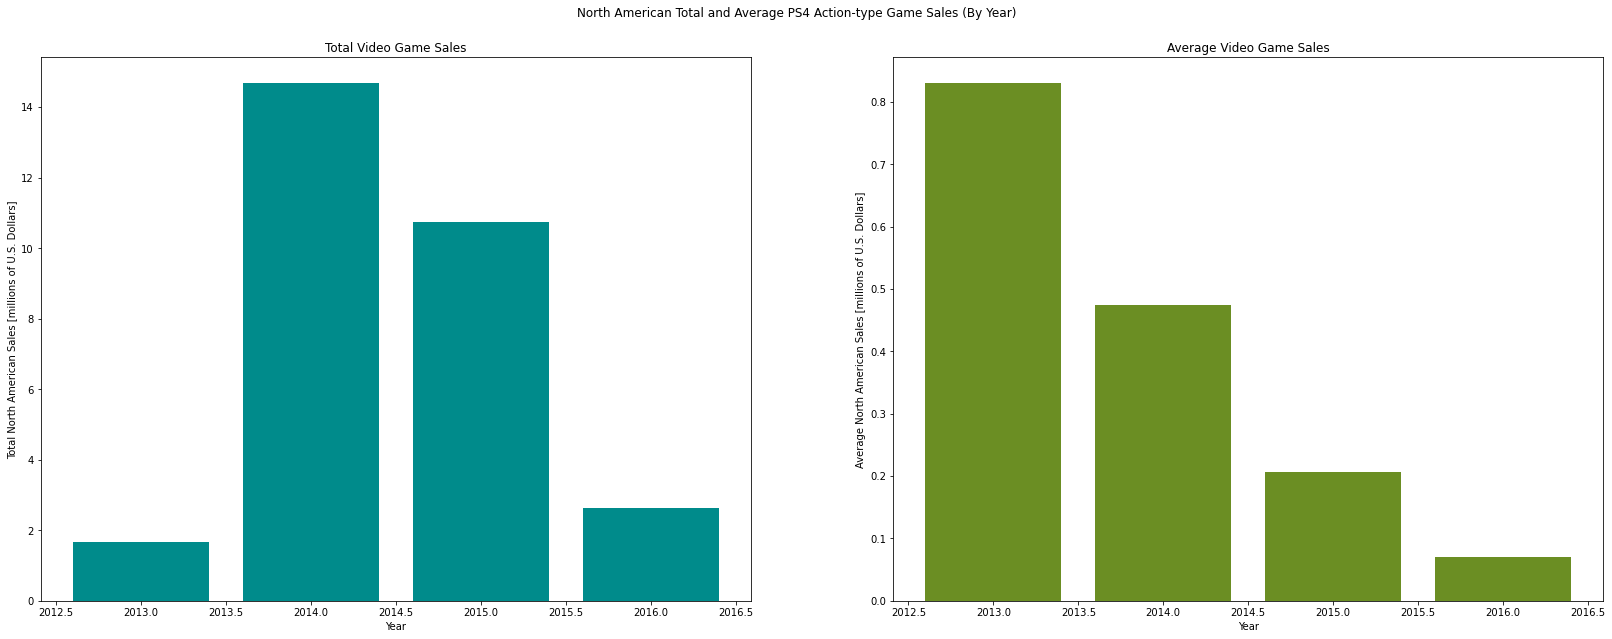

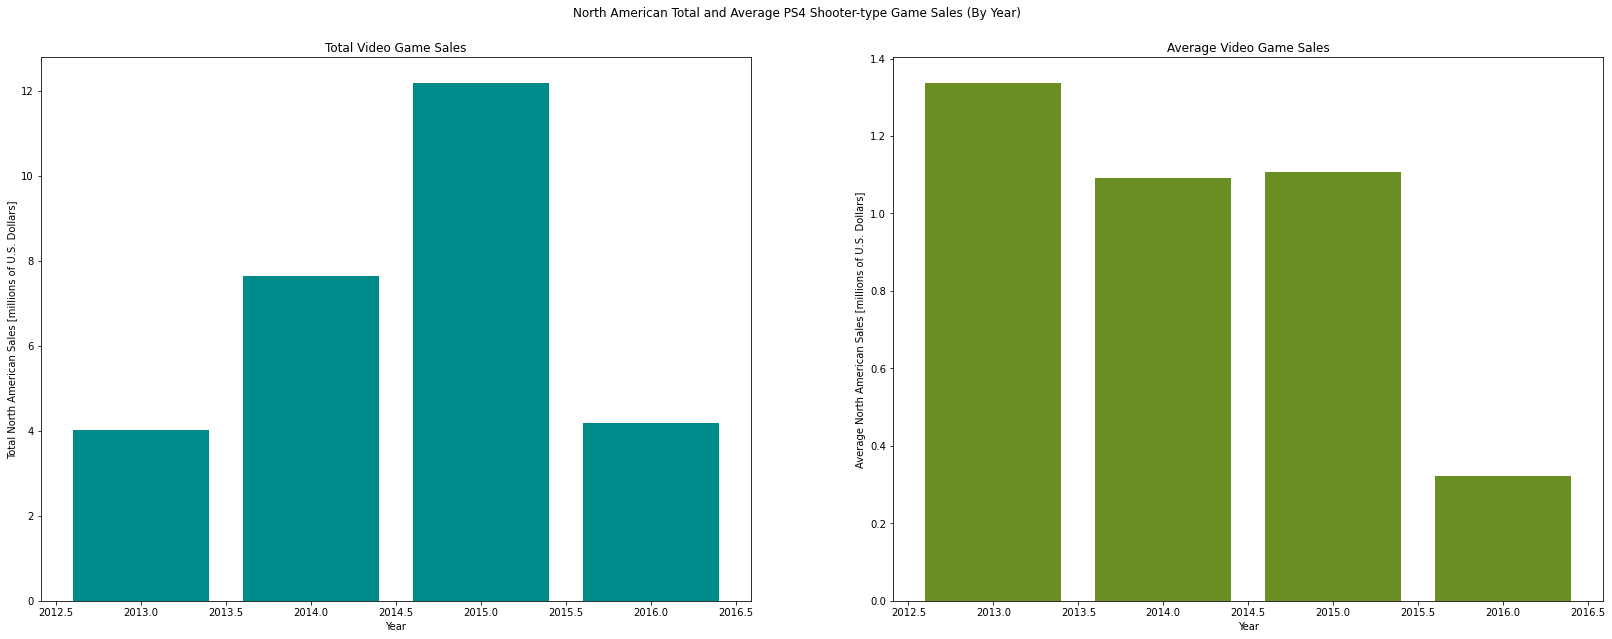

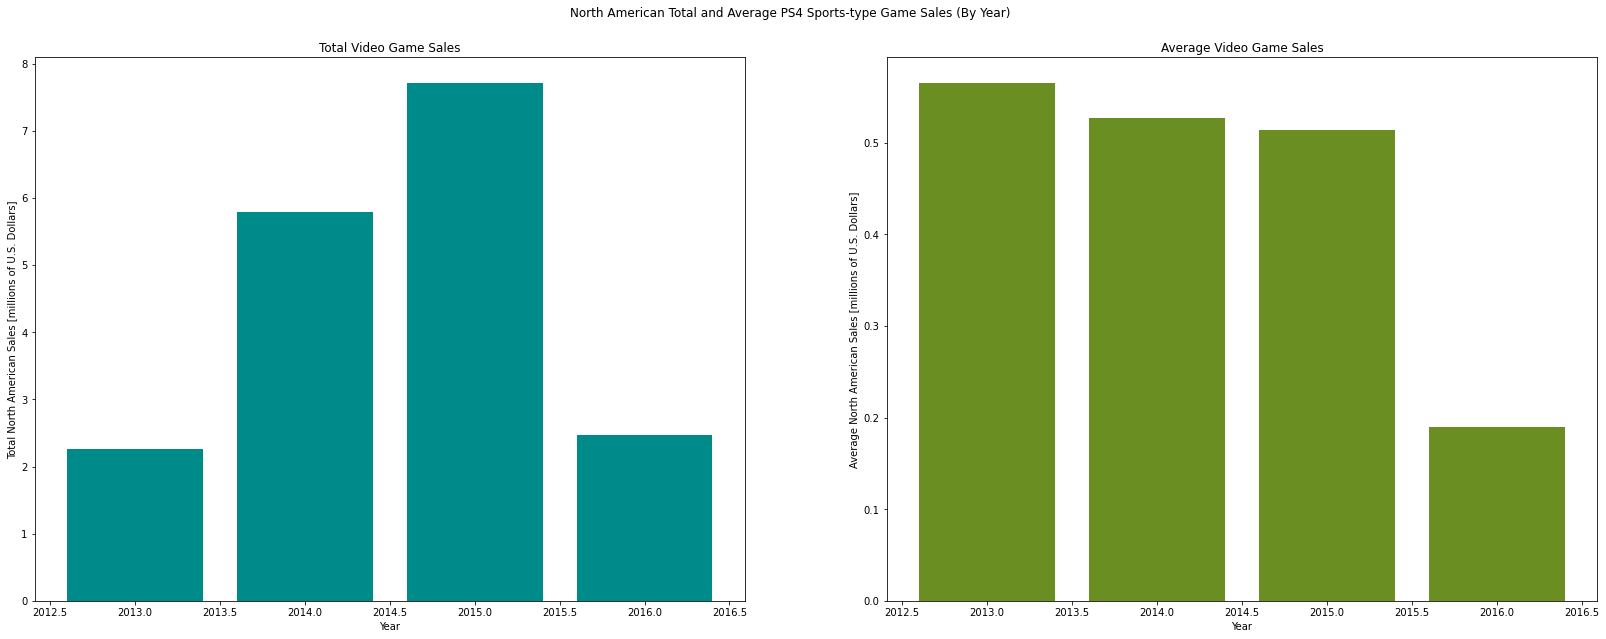

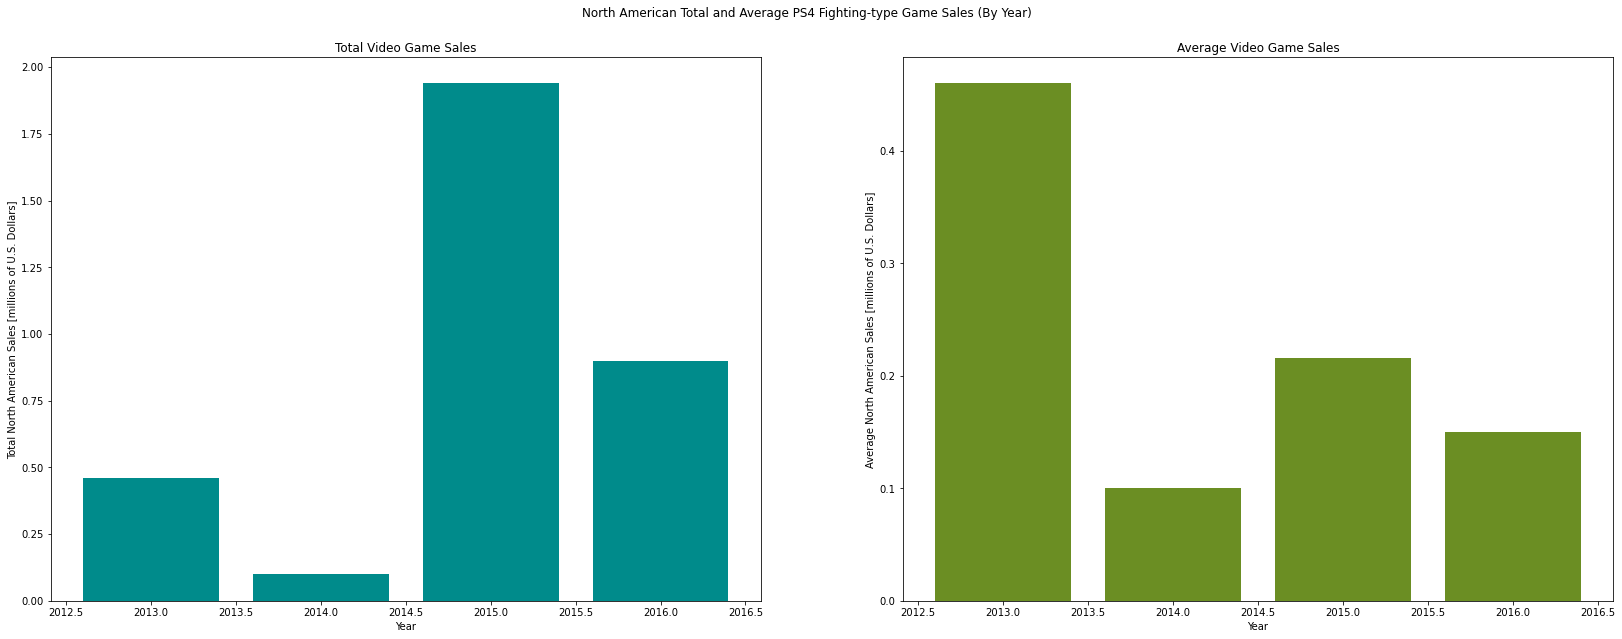

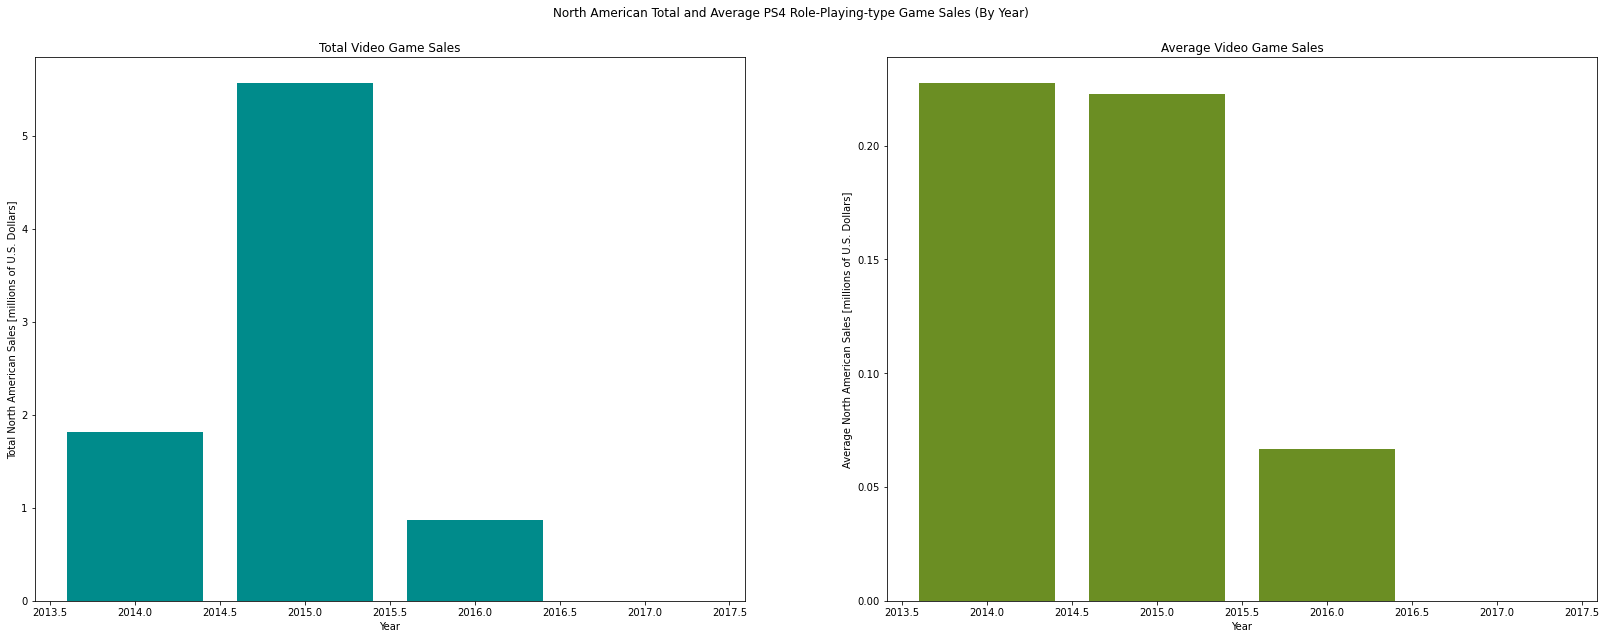

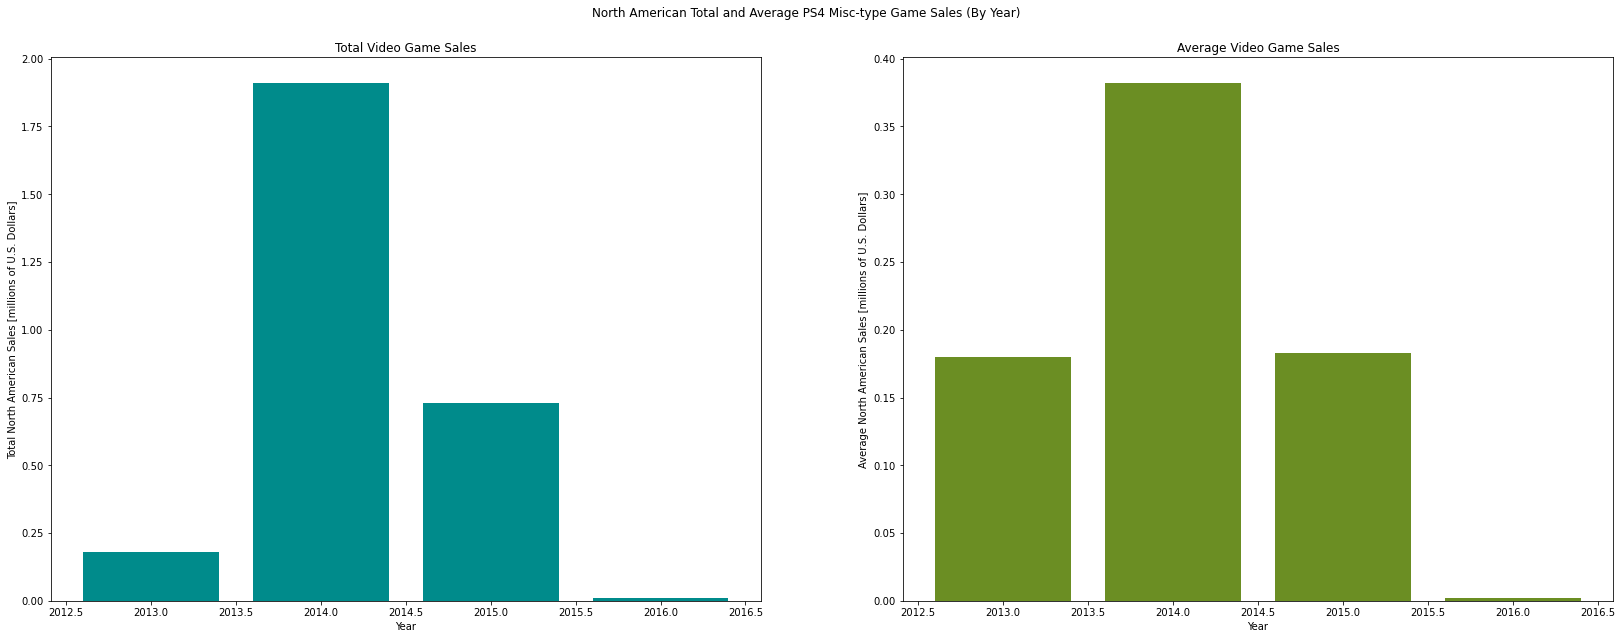

In [77]:
# Repeat the above, but focus on North America (and save resulting plots to file):
plot_yearly_sales_for_system_for_genre('PS4','Action','North American')
plt.savefig('total_average_PS4_action_sales_by_year.png')
plot_yearly_sales_for_system_for_genre('PS4','Shooter','North American')
plt.savefig('total_average_PS4_shooter_sales_by_year.png')
plot_yearly_sales_for_system_for_genre('PS4','Sports','North American')
plt.savefig('total_average_PS4_sports_sales_by_year.png')
plot_yearly_sales_for_system_for_genre('PS4','Fighting','North American')
plt.savefig('total_average_PS4_fighting_sales_by_year.png')
plot_yearly_sales_for_system_for_genre('PS4','Role-Playing','North American')
plt.savefig('total_average_PS4_rpg_sales_by_year.png')
plot_yearly_sales_for_system_for_genre('PS4','Misc','North American')
plt.savefig('total_average_PS4_misc_sales_by_year.png')

# Pivot Table of Total and Average Sales by Genre

In [78]:
# When presenting findings, or for reporting to institutional stakeholders, it may be convenient to have
# a table of total sales figures and/or average sales figures aggregated by genre and by year. Given that 
# the data in this dataset spans almost 40 years, it is impossible to view a table of such figures in its 
# entirety in a Jupyter Notebook output cell. To allow for full viewing of aggregate data, and to allow 
# for stakeholders to use the aggregate data on other software platforms, a pivot table of either total 
# sales or average sales aggregated by genre and year is created an printed to .csv file. The region for
# which total or average sales are to be calculated can be specified.
#
# Specify either "total" or "avg" as the second argument to the function if the total or 
# average sales figures are desired, respectively.
#
# The below function aggregates total or average sales for a specified region by genre and year, 
# then creates and writes a pivot table of the results to .csv file. The name of the .csv file 
# to be written to is the third argument to the function.

def write_sales_pivot_table_to_file(region, calc, filename):
    
    if region == 'Global':
        if calc == "total":
            # group data by genre and year and calculate total sales:
            total_by_genre_by_year = vg_sales_data.groupby(['Genre','Year']).\
                                     Global_Sales.apply(lambda x: np.sum(x)).reset_index()
            # rename columns for ease of reference later: 
            total_by_genre_by_year.rename(columns = {'Genre': 'Game Genre', \
                                                     'Global_Sales': 'Sales'}, inplace = True)
        elif calc == "avg":
            # group data by genre and year and calculate average sales:
            total_by_genre_by_year = vg_sales_data.groupby(['Genre','Year']).\
                                     Global_Sales.apply(lambda x: np.mean(x)).reset_index()
            # rename columns for ease of reference later:
            total_by_genre_by_year.rename(columns = {'Genre': 'Game Genre', \
                                                     'Global_Sales': 'Sales'}, inplace = True)
    elif region == 'North America':
        if calc == "total":
            # group data by genre and year and calculate total sales:
            total_by_genre_by_year = vg_sales_data.groupby(['Genre','Year']).\
                                     NA_Sales.apply(lambda x: np.sum(x)).reset_index()
            # rename columns for ease of reference later:
            total_by_genre_by_year.rename(columns = {'Genre': 'Game Genre', \
                                                     'NA_Sales': 'Sales'}, inplace = True)
        elif calc == "avg":
            # group data by genre and year and calculate average sales:
            total_by_genre_by_year = vg_sales_data.groupby(['Genre','Year']).\
                                     NA_Sales.apply(lambda x: np.mean(x)).reset_index()
            # rename columns for ease of reference later:
            total_by_genre_by_year.rename(columns = {'Genre': 'Game Genre', \
                                                     'NA_Sales': 'Sales'}, inplace = True)
    elif region == 'Europe':
        if calc == "total":
            # group data by genre and year and calculate total sales:
            total_by_genre_by_year = vg_sales_data.groupby(['Genre','Year']).\
                                     EU_Sales.apply(lambda x: np.sum(x)).reset_index()
            # rename columns for ease of reference later:
            total_by_genre_by_year.rename(columns = {'Genre': 'Game Genre', \
                                                     'EU_Sales': 'Sales'}, inplace = True)
        elif calc == "avg":
            # group data by genre and year and calculate average sales:
            total_by_genre_by_year = vg_sales_data.groupby(['Genre','Year']).\
                                     EU_Sales.apply(lambda x: np.mean(x)).reset_index()
            # rename columns for ease of reference later:
            total_by_genre_by_year.rename(columns = {'Genre': 'Game Genre', \
                                                     'EU_Sales': 'Sales'}, inplace = True)
    elif region == 'Japan':
        if calc == "total":
            # group data by genre and year and calculate total sales:
            total_by_genre_by_year = vg_sales_data.groupby(['Genre','Year']).\
                                     JP_Sales.apply(lambda x: np.sum(x)).reset_index()
            # rename columns for ease of reference later:
            total_by_genre_by_year.rename(columns = {'Genre': 'Game Genre', \
                                                     'JP_Sales': 'Sales'}, inplace = True)
        elif calc == "avg":
            # group data by genre and year and calculate average sales:
            total_by_genre_by_year = vg_sales_data.groupby(['Genre','Year']).\
                                     JP_Sales.apply(lambda x: np.mean(x)).reset_index()
            # rename columns for ease of reference later:
            total_by_genre_by_year.rename(columns = {'Genre': 'Game Genre', \
                                                     'JP_Sales': 'Sales'}, inplace = True)
    elif region == 'Other':
        if calc == "total":
            # group data by genre and year and calculate total sales:
            total_by_genre_by_year = vg_sales_data.groupby(['Genre','Year']).\
                                     Other_Sales.apply(lambda x: np.sum(x)).reset_index()
            # rename columns for ease of reference later:
            total_by_genre_by_year.rename(columns = {'Genre': 'Game Genre', \
                                                     'Other_Sales': 'Sales'}, inplace = True)
        elif calc == "avg":
            # group data by genre and year and calculate average sales:
            total_by_genre_by_year = vg_sales_data.groupby(['Genre','Year']).\
                                     Other_Sales.apply(lambda x: np.mean(x)).reset_index()
            # rename columns for ease of reference later:
            total_by_genre_by_year.rename(columns = {'Genre': 'Game Genre', \
                                                     'Other_Sales': 'Sales'}, inplace = True)
            

    # create a pivot table with year of release as columns, genre as rows, and total sales as cell values:
    tbgby_pivot = total_by_genre_by_year.pivot\
                  (columns = 'Year', index = 'Game Genre', values = 'Sales' ).reset_index()

    # Fill in blank spaces in the pivot table with "--"
    # the first year in the dataset is 1980, so set that as the starting year:
    startyear = 1980.0
    # loop over all years in the dataset and replace empty cells with "--," noting that the last
    # year in the dataset is 2020:
    while startyear < 2021.0:
        # there were no data in the dataset for the years 2018 and 2019, so skip over them:
        if startyear == 2018 or startyear == 2019.0:
            startyear += 1.0
            continue
        # otherwise, find empy/NaN values and replace them with "--":
        tbgby_pivot[startyear] = tbgby_pivot[startyear].fillna('--')
        startyear += 1.0    

    # in order to print to .csv file, the column names must be converted from float values to strings:
    tbgby_pivot.rename(columns = {1980.0:'1980',1981.0:'1981',1982.0:'1982',1983.0:'1983',1984.0:'1984', \
                                  1985.0:'1985',1986.0:'1986',1987.0:'1987',1988.0:'1988',1989.0:'1989', \
                                  1990.0:'1990',1991.0:'1991',1992.0:'1992',1993.0:'1993',1994.0:'1994', \
                                  1995.0:'1995',1996.0:'1996',1997.0:'1997',1998.0:'1998',1999.0:'1999', \
                                  2000.0:'2000',2001.0:'2001',2002.0:'2002',2003.0:'2003',2004.0:'2004', \
                                  2005.0:'2005',2006.0:'2006',2007.0:'2007',2008.0:'2008',2009.0:'2009', \
                                  2010.0:'2010',2011.0:'2012',2012.0:'2012',2013.0:'2014',2014.0:'2014', \
                                  2015.0:'2015',2016.0:'2016',2017.0:'2017',2020.0:'2020'}, inplace = True)

    # print the pivot table to look at a few rows and make sure nothing has gone wrong so far.
    # used primarily for debugging, but I have left the commented out command just in case.
    #print(tbgby_pivot)

    # the pivot table data will be gathered into a list of dictionaries for printing to .csv. 
    # first, make each column of the pivot table a key of the dictionaries:
    keylist = ['Game Genre', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', \
               '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', \
               '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', \
               '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020'] 

    # the action genre is the first row of the pivot table.
    # make a dictionary which contains sales figures of action games over the years 1980--2020:
    # pluck off the first row of the pivot table:
    tbgby_action = tbgby_pivot.iloc[0]
    # create an empty dictionary:
    tbgby_action_dict = {}
    # loop over columns in the pivot table and, for each key in the keylist defined above, fill
    # add the appropriate cell value:
    for i in range(0,40):
        tbgby_action_dict[keylist[i]] = tbgby_action[i]

    # the adventure genre is the second row of the pivot table.
    # make a dictionary which contains sales figures of adventure games over the years 1980--2020:
    # pluck off the second row of the pivot table:
    tbgby_adventure = tbgby_pivot.iloc[1]
    # create an empty dictionary:
    tbgby_adventure_dict = {}
    # loop over columns in the pivot table and, for each key in the keylist defined above, fill
    # add the appropriate cell value:
    for i in range(0,40):
        tbgby_adventure_dict[keylist[i]] = tbgby_adventure[i]

    # the fighting genre is the third row of the pivot table.
    # make a dictionary which contains sales figures of fighting games over the years 1980--2020:
    # pluck off the third row of the pivot table:
    tbgby_fighting = tbgby_pivot.iloc[2]
    # create an empty dictionary:
    tbgby_fighting_dict = {}
    # loop over columns in the pivot table and, for each key in the keylist defined above, fill
    # add the appropriate cell value:
    for i in range(0,40):
        tbgby_fighting_dict[keylist[i]] = tbgby_fighting[i]

    # the miscellaneous genre is the fourth row of the pivot table.
    # make a dictionary which contains sales figures of miscellaneous games over the years 1980--2020:
    # pluck off the fourth row of the pivot table:
    tbgby_misc = tbgby_pivot.iloc[3]
    # create an empty dictionary:
    tbgby_misc_dict = {}
    # loop over columns in the pivot table and, for each key in the keylist defined above, fill
    # add the appropriate cell value:
    for i in range(0,40):
        tbgby_misc_dict[keylist[i]] = tbgby_misc[i]

    # the platformer genre is the fifth row of the pivot table.
    # make a dictionary which contains sales figures of platformer games over the years 1980--2020:
    # pluck off the fifth row of the pivot table:
    tbgby_platform = tbgby_pivot.iloc[4]
    # create an empty dictionary:
    tbgby_platform_dict = {}
    # loop over columns in the pivot table and, for each key in the keylist defined above, fill
    # add the appropriate cell value:
    for i in range(0,40):
        tbgby_platform_dict[keylist[i]] = tbgby_platform[i]

    # the puzzle genre is the sixth row of the pivot table.
    # make a dictionary which contains sales figures of puzzle games over the years 1980--2020:
    # pluck off the sixth row of the pivot table:
    tbgby_puzzle = tbgby_pivot.iloc[5]
    # create an empty dictionary:
    tbgby_puzzle_dict = {}
    # loop over columns in the pivot table and, for each key in the keylist defined above, fill
    # add the appropriate cell value:
    for i in range(0,40):
        tbgby_puzzle_dict[keylist[i]] = tbgby_puzzle[i]

    # the racing genre is the seventh row of the pivot table.
    # make a dictionary which contains sales figures of racing games over the years 1980--2020:
    # pluck off the seventh row of the pivot table:
    tbgby_racing = tbgby_pivot.iloc[6]
    # create an empty dictionary:
    tbgby_racing_dict = {}
    # loop over columns in the pivot table and, for each key in the keylist defined above, fill
    # add the appropriate cell value:
    for i in range(0,40):
        tbgby_racing_dict[keylist[i]] = tbgby_racing[i]

    # the role-laying game genre is the eighth row of the pivot table.
    # make a dictionary which contains sales figures of role-playing games over the years 1980--2020:
    # pluck off the eighth row of the pivot table:
    tbgby_rpg = tbgby_pivot.iloc[7]
    # create an empty dictionary:
    tbgby_rpg_dict = {}
    # loop over columns in the pivot table and, for each key in the keylist defined above, fill
    # add the appropriate cell value:
    for i in range(0,40):
        tbgby_rpg_dict[keylist[i]] = tbgby_rpg[i]

    # the first-person shooter genre is the ninth row of the pivot table.
    # make a dictionary which contains sales figures of first-person shooter games over the years 1980--2020:
    # pluck off the ninth row of the pivot table:
    tbgby_shooter = tbgby_pivot.iloc[8]
    # create an empty dictionary:
    tbgby_shooter_dict = {}
    # loop over columns in the pivot table and, for each key in the keylist defined above, fill
    # add the appropriate cell value:
    for i in range(0,40):
        tbgby_shooter_dict[keylist[i]] = tbgby_shooter[i]

    # the simulation genre is the tenth row of the pivot table.
    # make a dictionary which contains sales figures of simulation games over the years 1980--2020:
    # pluck off the tenth row of the pivot table:
    tbgby_sim = tbgby_pivot.iloc[9]
    # create an empty dictionary:
    tbgby_sim_dict = {}
    # loop over columns in the pivot table and, for each key in the keylist defined above, fill
    # add the appropriate cell value:
    for i in range(0,40):
        tbgby_sim_dict[keylist[i]] = tbgby_sim[i]

    # the sports genre is the eleventh row of the pivot table.
    # make a dictionary which contains sales figures of sports games over the years 1980--2020:
    # pluck off the eleventh row of the pivot table:
    tbgby_sports = tbgby_pivot.iloc[10]
    # create an empty dictionary:
    tbgby_sports_dict = {}
    # loop over columns in the pivot table and, for each key in the keylist defined above, fill
    # add the appropriate cell value:
    for i in range(0,40):
        tbgby_sports_dict[keylist[i]] = tbgby_sports[i]

    # the strategy genre is the twelfth row of the pivot table.
    # make a dictionary which contains sales figures of strategy games over the years 1980--2020:
    # pluck off the twelfth row of the pivot table:
    tbgby_strategy = tbgby_pivot.iloc[11]
    # create an empty dictionary:
    tbgby_strategy_dict = {}
    # loop over columns in the pivot table and, for each key in the keylist defined above, fill
    # add the appropriate cell value:
    for i in range(0,40):
        tbgby_strategy_dict[keylist[i]] = tbgby_strategy[i]

    # gather all of the dictionaries created above into one big list:
    big_list = [tbgby_action_dict, tbgby_adventure_dict, tbgby_fighting_dict, tbgby_misc_dict, \
                tbgby_platform_dict, tbgby_puzzle_dict, tbgby_racing_dict, tbgby_rpg_dict, tbgby_shooter_dict, \
                tbgby_sim_dict, tbgby_sports_dict, tbgby_strategy_dict]
    
    # write the pivot table to .csv:
    # open the file for writing:
    with open(filename, 'w') as output_csv:
        # the fields of the .csv file correspond to the elements of the keylist list:
        fields = keylist 
        # instantiate a DictWriter object with the correct filename and fields list:
        output_writer = csv.DictWriter(output_csv, fieldnames=fields)
        # write the .csv header:
        output_writer.writeheader() 
        # loop through the dictionaries (i.e. rows of the .csv file) and write them to the .csv file:
        for item in big_list: 
            output_writer.writerow(item)

In [79]:
# make a file for the total global sales pivot table:
write_sales_pivot_table_to_file('Global', 'total', 'global_total_sales_by_genre_by_year.csv')
# make a file for the total North American sales pivot table:
write_sales_pivot_table_to_file('North America', 'total', 'north_american_sales_total_by_genre_by_year.csv')
# make a file for the total European sales pivot table:
write_sales_pivot_table_to_file('Europe', 'total', 'european_total_sales_by_genre_by_year.csv')
# make a file for the total Japanese sales pivot table:
write_sales_pivot_table_to_file('Japan', 'total', 'japanese_total_sales_by_genre_by_year.csv')
# make a file for the total "Other" sales pivot table:
write_sales_pivot_table_to_file('Other', 'total', 'other_total_sales_by_genre_by_year.csv')

In [80]:
# make a file for the average global sales pivot table:
write_sales_pivot_table_to_file('Global', 'avg', 'global_average_sales_by_genre_by_year.csv')
# make a file for the average North American sales pivot table:
write_sales_pivot_table_to_file('North America', 'avg', 'north_american_average_sales_by_genre_by_year.csv')
# make a file for the average European sales pivot table:
write_sales_pivot_table_to_file('Europe', 'avg', 'european_average_sales_by_genre_by_year.csv')
# make a file for the average Japanese sales pivot table:
write_sales_pivot_table_to_file('Japan', 'avg', 'japanese_average_sales_by_genre_by_year.csv')
# make a file for the average "Other" sales pivot table:
write_sales_pivot_table_to_file('Other', 'avg', 'other_average_sales_by_genre_by_year.csv')